# Preprocess2/input1

## 환자 caseid 계산

In [18]:
import pandas as pd
import pickle, os

# 
df_preprocess = pickle.load(open('cache/preprocess2/input1/df_preprocess_pacu','rb'))


# 회복실 입퇴실시간이 긴 경우, SUPREME의 오류로 NRS 측정시간이 다른 환자 케이스를 덮어버린 경우 (중복 케이스)
df_duplicate_list = pd.read_csv('duplicates_list.csv')

print('매칭 중복 제거 전 df행 크기:', len(df_preprocess))
print('매칭 중복 제거 전 caseid수:', len(np.unique(df_preprocess['caseids'].tolist())))

duplicate_list = np.array(df_duplicate_list['path'].str.split('.').tolist())[:,0]

for duplicate_file in duplicate_list:
    duplicate_file = duplicate_file + '.csv'
    index_list = df_preprocess[duplicate_file == df_preprocess['caseids']].index
    df_preprocess.drop(index_list, inplace=True)
    
df_preprocess.reset_index(drop=True, inplace=True)
    
print('\n매칭 중복 제거 후 df행 크기:', len(df_preprocess))
print('매칭 중복 제거 후 caseid수:', len(np.unique(df_preprocess['caseids'].tolist())))    

매칭 중복 제거 전 df행 크기: 8294
매칭 중복 제거 전 caseid수: 5229

매칭 중복 제거 후 df행 크기: 8160
매칭 중복 제거 후 caseid수: 5192


## input 1-1

### 전처리 결과 input이 없는 caseid 제거

In [19]:
file_name_test, file_name_train = [], []
case_name_test = []

false_row_list_pacu_1_1 = []

# pacu의 vital_path
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'NRS_vital_pickle_unzip/NRS_vital_pickle'
# df의 모든 행을 돌며 train set, test set 구성
for row in range(len(df_preprocess)):
    print('loading data {}/{} ...'.format(row+1, len(df_preprocess)), end='')

    # vital data loading
    df_vital = pickle.load(open(vital_path+'/'+df_preprocess.loc[row,'file_path'], 'rb')).reset_index()
    
    switch = 0
    # 한 NRS에 대해 51개의 input 확인
    for i in range(23):
        # input이 전처리 통과한 경우
        if df_preprocess.loc[row, str(i+1)][0]:
            switch = 1

                
    if switch == 0:
        false_row_list_pacu_1_1.append(df_preprocess.loc[row,'file_path'])

    print('completed')

loading data 1/8160 ...completed
loading data 2/8160 ...completed
loading data 3/8160 ...completed
loading data 4/8160 ...completed
loading data 5/8160 ...completed
loading data 6/8160 ...completed
loading data 7/8160 ...completed
loading data 8/8160 ...completed
loading data 9/8160 ...completed
loading data 10/8160 ...completed
loading data 11/8160 ...completed
loading data 12/8160 ...completed
loading data 13/8160 ...completed
loading data 14/8160 ...completed
loading data 15/8160 ...completed
loading data 16/8160 ...completed
loading data 17/8160 ...completed
loading data 18/8160 ...completed
loading data 19/8160 ...completed
loading data 20/8160 ...completed
loading data 21/8160 ...completed
loading data 22/8160 ...completed
loading data 23/8160 ...completed
loading data 24/8160 ...completed
loading data 25/8160 ...completed
loading data 26/8160 ...completed
loading data 27/8160 ...completed
loading data 28/8160 ...completed
loading data 29/8160 ...completed
loading data 30/8160 ..

loading data 284/8160 ...completed
loading data 285/8160 ...completed
loading data 286/8160 ...completed
loading data 287/8160 ...completed
loading data 288/8160 ...completed
loading data 289/8160 ...completed
loading data 290/8160 ...completed
loading data 291/8160 ...completed
loading data 292/8160 ...completed
loading data 293/8160 ...completed
loading data 294/8160 ...completed
loading data 295/8160 ...completed
loading data 296/8160 ...completed
loading data 297/8160 ...completed
loading data 298/8160 ...completed
loading data 299/8160 ...completed
loading data 300/8160 ...completed
loading data 301/8160 ...completed
loading data 302/8160 ...completed
loading data 303/8160 ...completed
loading data 304/8160 ...completed
loading data 305/8160 ...completed
loading data 306/8160 ...completed
loading data 307/8160 ...completed
loading data 308/8160 ...completed
loading data 309/8160 ...completed
loading data 310/8160 ...completed
loading data 311/8160 ...completed
loading data 312/816

loading data 580/8160 ...completed
loading data 581/8160 ...completed
loading data 582/8160 ...completed
loading data 583/8160 ...completed
loading data 584/8160 ...completed
loading data 585/8160 ...completed
loading data 586/8160 ...completed
loading data 587/8160 ...completed
loading data 588/8160 ...completed
loading data 589/8160 ...completed
loading data 590/8160 ...completed
loading data 591/8160 ...completed
loading data 592/8160 ...completed
loading data 593/8160 ...completed
loading data 594/8160 ...completed
loading data 595/8160 ...completed
loading data 596/8160 ...completed
loading data 597/8160 ...completed
loading data 598/8160 ...completed
loading data 599/8160 ...completed
loading data 600/8160 ...completed
loading data 601/8160 ...completed
loading data 602/8160 ...completed
loading data 603/8160 ...completed
loading data 604/8160 ...completed
loading data 605/8160 ...completed
loading data 606/8160 ...completed
loading data 607/8160 ...completed
loading data 608/816

loading data 876/8160 ...completed
loading data 877/8160 ...completed
loading data 878/8160 ...completed
loading data 879/8160 ...completed
loading data 880/8160 ...completed
loading data 881/8160 ...completed
loading data 882/8160 ...completed
loading data 883/8160 ...completed
loading data 884/8160 ...completed
loading data 885/8160 ...completed
loading data 886/8160 ...completed
loading data 887/8160 ...completed
loading data 888/8160 ...completed
loading data 889/8160 ...completed
loading data 890/8160 ...completed
loading data 891/8160 ...completed
loading data 892/8160 ...completed
loading data 893/8160 ...completed
loading data 894/8160 ...completed
loading data 895/8160 ...completed
loading data 896/8160 ...completed
loading data 897/8160 ...completed
loading data 898/8160 ...completed
loading data 899/8160 ...completed
loading data 900/8160 ...completed
loading data 901/8160 ...completed
loading data 902/8160 ...completed
loading data 903/8160 ...completed
loading data 904/816

loading data 1173/8160 ...completed
loading data 1174/8160 ...completed
loading data 1175/8160 ...completed
loading data 1176/8160 ...completed
loading data 1177/8160 ...completed
loading data 1178/8160 ...completed
loading data 1179/8160 ...completed
loading data 1180/8160 ...completed
loading data 1181/8160 ...completed
loading data 1182/8160 ...completed
loading data 1183/8160 ...completed
loading data 1184/8160 ...completed
loading data 1185/8160 ...completed
loading data 1186/8160 ...completed
loading data 1187/8160 ...completed
loading data 1188/8160 ...completed
loading data 1189/8160 ...completed
loading data 1190/8160 ...completed
loading data 1191/8160 ...completed
loading data 1192/8160 ...completed
loading data 1193/8160 ...completed
loading data 1194/8160 ...completed
loading data 1195/8160 ...completed
loading data 1196/8160 ...completed
loading data 1197/8160 ...completed
loading data 1198/8160 ...completed
loading data 1199/8160 ...completed
loading data 1200/8160 ...co

loading data 1459/8160 ...completed
loading data 1460/8160 ...completed
loading data 1461/8160 ...completed
loading data 1462/8160 ...completed
loading data 1463/8160 ...completed
loading data 1464/8160 ...completed
loading data 1465/8160 ...completed
loading data 1466/8160 ...completed
loading data 1467/8160 ...completed
loading data 1468/8160 ...completed
loading data 1469/8160 ...completed
loading data 1470/8160 ...completed
loading data 1471/8160 ...completed
loading data 1472/8160 ...completed
loading data 1473/8160 ...completed
loading data 1474/8160 ...completed
loading data 1475/8160 ...completed
loading data 1476/8160 ...completed
loading data 1477/8160 ...completed
loading data 1478/8160 ...completed
loading data 1479/8160 ...completed
loading data 1480/8160 ...completed
loading data 1481/8160 ...completed
loading data 1482/8160 ...completed
loading data 1483/8160 ...completed
loading data 1484/8160 ...completed
loading data 1485/8160 ...completed
loading data 1486/8160 ...co

loading data 1755/8160 ...completed
loading data 1756/8160 ...completed
loading data 1757/8160 ...completed
loading data 1758/8160 ...completed
loading data 1759/8160 ...completed
loading data 1760/8160 ...completed
loading data 1761/8160 ...completed
loading data 1762/8160 ...completed
loading data 1763/8160 ...completed
loading data 1764/8160 ...completed
loading data 1765/8160 ...completed
loading data 1766/8160 ...completed
loading data 1767/8160 ...completed
loading data 1768/8160 ...completed
loading data 1769/8160 ...completed
loading data 1770/8160 ...completed
loading data 1771/8160 ...completed
loading data 1772/8160 ...completed
loading data 1773/8160 ...completed
loading data 1774/8160 ...completed
loading data 1775/8160 ...completed
loading data 1776/8160 ...completed
loading data 1777/8160 ...completed
loading data 1778/8160 ...completed
loading data 1779/8160 ...completed
loading data 1780/8160 ...completed
loading data 1781/8160 ...completed
loading data 1782/8160 ...co

loading data 2053/8160 ...completed
loading data 2054/8160 ...completed
loading data 2055/8160 ...completed
loading data 2056/8160 ...completed
loading data 2057/8160 ...completed
loading data 2058/8160 ...completed
loading data 2059/8160 ...completed
loading data 2060/8160 ...completed
loading data 2061/8160 ...completed
loading data 2062/8160 ...completed
loading data 2063/8160 ...completed
loading data 2064/8160 ...completed
loading data 2065/8160 ...completed
loading data 2066/8160 ...completed
loading data 2067/8160 ...completed
loading data 2068/8160 ...completed
loading data 2069/8160 ...completed
loading data 2070/8160 ...completed
loading data 2071/8160 ...completed
loading data 2072/8160 ...completed
loading data 2073/8160 ...completed
loading data 2074/8160 ...completed
loading data 2075/8160 ...completed
loading data 2076/8160 ...completed
loading data 2077/8160 ...completed
loading data 2078/8160 ...completed
loading data 2079/8160 ...completed
loading data 2080/8160 ...co

loading data 2351/8160 ...completed
loading data 2352/8160 ...completed
loading data 2353/8160 ...completed
loading data 2354/8160 ...completed
loading data 2355/8160 ...completed
loading data 2356/8160 ...completed
loading data 2357/8160 ...completed
loading data 2358/8160 ...completed
loading data 2359/8160 ...completed
loading data 2360/8160 ...completed
loading data 2361/8160 ...completed
loading data 2362/8160 ...completed
loading data 2363/8160 ...completed
loading data 2364/8160 ...completed
loading data 2365/8160 ...completed
loading data 2366/8160 ...completed
loading data 2367/8160 ...completed
loading data 2368/8160 ...completed
loading data 2369/8160 ...completed
loading data 2370/8160 ...completed
loading data 2371/8160 ...completed
loading data 2372/8160 ...completed
loading data 2373/8160 ...completed
loading data 2374/8160 ...completed
loading data 2375/8160 ...completed
loading data 2376/8160 ...completed
loading data 2377/8160 ...completed
loading data 2378/8160 ...co

loading data 2650/8160 ...completed
loading data 2651/8160 ...completed
loading data 2652/8160 ...completed
loading data 2653/8160 ...completed
loading data 2654/8160 ...completed
loading data 2655/8160 ...completed
loading data 2656/8160 ...completed
loading data 2657/8160 ...completed
loading data 2658/8160 ...completed
loading data 2659/8160 ...completed
loading data 2660/8160 ...completed
loading data 2661/8160 ...completed
loading data 2662/8160 ...completed
loading data 2663/8160 ...completed
loading data 2664/8160 ...completed
loading data 2665/8160 ...completed
loading data 2666/8160 ...completed
loading data 2667/8160 ...completed
loading data 2668/8160 ...completed
loading data 2669/8160 ...completed
loading data 2670/8160 ...completed
loading data 2671/8160 ...completed
loading data 2672/8160 ...completed
loading data 2673/8160 ...completed
loading data 2674/8160 ...completed
loading data 2675/8160 ...completed
loading data 2676/8160 ...completed
loading data 2677/8160 ...co

loading data 2947/8160 ...completed
loading data 2948/8160 ...completed
loading data 2949/8160 ...completed
loading data 2950/8160 ...completed
loading data 2951/8160 ...completed
loading data 2952/8160 ...completed
loading data 2953/8160 ...completed
loading data 2954/8160 ...completed
loading data 2955/8160 ...completed
loading data 2956/8160 ...completed
loading data 2957/8160 ...completed
loading data 2958/8160 ...completed
loading data 2959/8160 ...completed
loading data 2960/8160 ...completed
loading data 2961/8160 ...completed
loading data 2962/8160 ...completed
loading data 2963/8160 ...completed
loading data 2964/8160 ...completed
loading data 2965/8160 ...completed
loading data 2966/8160 ...completed
loading data 2967/8160 ...completed
loading data 2968/8160 ...completed
loading data 2969/8160 ...completed
loading data 2970/8160 ...completed
loading data 2971/8160 ...completed
loading data 2972/8160 ...completed
loading data 2973/8160 ...completed
loading data 2974/8160 ...co

loading data 3246/8160 ...completed
loading data 3247/8160 ...completed
loading data 3248/8160 ...completed
loading data 3249/8160 ...completed
loading data 3250/8160 ...completed
loading data 3251/8160 ...completed
loading data 3252/8160 ...completed
loading data 3253/8160 ...completed
loading data 3254/8160 ...completed
loading data 3255/8160 ...completed
loading data 3256/8160 ...completed
loading data 3257/8160 ...completed
loading data 3258/8160 ...completed
loading data 3259/8160 ...completed
loading data 3260/8160 ...completed
loading data 3261/8160 ...completed
loading data 3262/8160 ...completed
loading data 3263/8160 ...completed
loading data 3264/8160 ...completed
loading data 3265/8160 ...completed
loading data 3266/8160 ...completed
loading data 3267/8160 ...completed
loading data 3268/8160 ...completed
loading data 3269/8160 ...completed
loading data 3270/8160 ...completed
loading data 3271/8160 ...completed
loading data 3272/8160 ...completed
loading data 3273/8160 ...co

loading data 3536/8160 ...completed
loading data 3537/8160 ...completed
loading data 3538/8160 ...completed
loading data 3539/8160 ...completed
loading data 3540/8160 ...completed
loading data 3541/8160 ...completed
loading data 3542/8160 ...completed
loading data 3543/8160 ...completed
loading data 3544/8160 ...completed
loading data 3545/8160 ...completed
loading data 3546/8160 ...completed
loading data 3547/8160 ...completed
loading data 3548/8160 ...completed
loading data 3549/8160 ...completed
loading data 3550/8160 ...completed
loading data 3551/8160 ...completed
loading data 3552/8160 ...completed
loading data 3553/8160 ...completed
loading data 3554/8160 ...completed
loading data 3555/8160 ...completed
loading data 3556/8160 ...completed
loading data 3557/8160 ...completed
loading data 3558/8160 ...completed
loading data 3559/8160 ...completed
loading data 3560/8160 ...completed
loading data 3561/8160 ...completed
loading data 3562/8160 ...completed
loading data 3563/8160 ...co

loading data 3830/8160 ...completed
loading data 3831/8160 ...completed
loading data 3832/8160 ...completed
loading data 3833/8160 ...completed
loading data 3834/8160 ...completed
loading data 3835/8160 ...completed
loading data 3836/8160 ...completed
loading data 3837/8160 ...completed
loading data 3838/8160 ...completed
loading data 3839/8160 ...completed
loading data 3840/8160 ...completed
loading data 3841/8160 ...completed
loading data 3842/8160 ...completed
loading data 3843/8160 ...completed
loading data 3844/8160 ...completed
loading data 3845/8160 ...completed
loading data 3846/8160 ...completed
loading data 3847/8160 ...completed
loading data 3848/8160 ...completed
loading data 3849/8160 ...completed
loading data 3850/8160 ...completed
loading data 3851/8160 ...completed
loading data 3852/8160 ...completed
loading data 3853/8160 ...completed
loading data 3854/8160 ...completed
loading data 3855/8160 ...completed
loading data 3856/8160 ...completed
loading data 3857/8160 ...co

loading data 4060/8160 ...completed
loading data 4061/8160 ...completed
loading data 4062/8160 ...completed
loading data 4063/8160 ...completed
loading data 4064/8160 ...completed
loading data 4065/8160 ...completed
loading data 4066/8160 ...completed
loading data 4067/8160 ...completed
loading data 4068/8160 ...completed
loading data 4069/8160 ...completed
loading data 4070/8160 ...completed
loading data 4071/8160 ...completed
loading data 4072/8160 ...completed
loading data 4073/8160 ...completed
loading data 4074/8160 ...completed
loading data 4075/8160 ...completed
loading data 4076/8160 ...completed
loading data 4077/8160 ...completed
loading data 4078/8160 ...completed
loading data 4079/8160 ...completed
loading data 4080/8160 ...completed
loading data 4081/8160 ...completed
loading data 4082/8160 ...completed
loading data 4083/8160 ...completed
loading data 4084/8160 ...completed
loading data 4085/8160 ...completed
loading data 4086/8160 ...completed
loading data 4087/8160 ...co

loading data 4291/8160 ...completed
loading data 4292/8160 ...completed
loading data 4293/8160 ...completed
loading data 4294/8160 ...completed
loading data 4295/8160 ...completed
loading data 4296/8160 ...completed
loading data 4297/8160 ...completed
loading data 4298/8160 ...completed
loading data 4299/8160 ...completed
loading data 4300/8160 ...completed
loading data 4301/8160 ...completed
loading data 4302/8160 ...completed
loading data 4303/8160 ...completed
loading data 4304/8160 ...completed
loading data 4305/8160 ...completed
loading data 4306/8160 ...completed
loading data 4307/8160 ...completed
loading data 4308/8160 ...completed
loading data 4309/8160 ...completed
loading data 4310/8160 ...completed
loading data 4311/8160 ...completed
loading data 4312/8160 ...completed
loading data 4313/8160 ...completed
loading data 4314/8160 ...completed
loading data 4315/8160 ...completed
loading data 4316/8160 ...completed
loading data 4317/8160 ...completed
loading data 4318/8160 ...co

loading data 4522/8160 ...completed
loading data 4523/8160 ...completed
loading data 4524/8160 ...completed
loading data 4525/8160 ...completed
loading data 4526/8160 ...completed
loading data 4527/8160 ...completed
loading data 4528/8160 ...completed
loading data 4529/8160 ...completed
loading data 4530/8160 ...completed
loading data 4531/8160 ...completed
loading data 4532/8160 ...completed
loading data 4533/8160 ...completed
loading data 4534/8160 ...completed
loading data 4535/8160 ...completed
loading data 4536/8160 ...completed
loading data 4537/8160 ...completed
loading data 4538/8160 ...completed
loading data 4539/8160 ...completed
loading data 4540/8160 ...completed
loading data 4541/8160 ...completed
loading data 4542/8160 ...completed
loading data 4543/8160 ...completed
loading data 4544/8160 ...completed
loading data 4545/8160 ...completed
loading data 4546/8160 ...completed
loading data 4547/8160 ...completed
loading data 4548/8160 ...completed
loading data 4549/8160 ...co

loading data 4752/8160 ...completed
loading data 4753/8160 ...completed
loading data 4754/8160 ...completed
loading data 4755/8160 ...completed
loading data 4756/8160 ...completed
loading data 4757/8160 ...completed
loading data 4758/8160 ...completed
loading data 4759/8160 ...completed
loading data 4760/8160 ...completed
loading data 4761/8160 ...completed
loading data 4762/8160 ...completed
loading data 4763/8160 ...completed
loading data 4764/8160 ...completed
loading data 4765/8160 ...completed
loading data 4766/8160 ...completed
loading data 4767/8160 ...completed
loading data 4768/8160 ...completed
loading data 4769/8160 ...completed
loading data 4770/8160 ...completed
loading data 4771/8160 ...completed
loading data 4772/8160 ...completed
loading data 4773/8160 ...completed
loading data 4774/8160 ...completed
loading data 4775/8160 ...completed
loading data 4776/8160 ...completed
loading data 4777/8160 ...completed
loading data 4778/8160 ...completed
loading data 4779/8160 ...co

loading data 4983/8160 ...completed
loading data 4984/8160 ...completed
loading data 4985/8160 ...completed
loading data 4986/8160 ...completed
loading data 4987/8160 ...completed
loading data 4988/8160 ...completed
loading data 4989/8160 ...completed
loading data 4990/8160 ...completed
loading data 4991/8160 ...completed
loading data 4992/8160 ...completed
loading data 4993/8160 ...completed
loading data 4994/8160 ...completed
loading data 4995/8160 ...completed
loading data 4996/8160 ...completed
loading data 4997/8160 ...completed
loading data 4998/8160 ...completed
loading data 4999/8160 ...completed
loading data 5000/8160 ...completed
loading data 5001/8160 ...completed
loading data 5002/8160 ...completed
loading data 5003/8160 ...completed
loading data 5004/8160 ...completed
loading data 5005/8160 ...completed
loading data 5006/8160 ...completed
loading data 5007/8160 ...completed
loading data 5008/8160 ...completed
loading data 5009/8160 ...completed
loading data 5010/8160 ...co

loading data 5213/8160 ...completed
loading data 5214/8160 ...completed
loading data 5215/8160 ...completed
loading data 5216/8160 ...completed
loading data 5217/8160 ...completed
loading data 5218/8160 ...completed
loading data 5219/8160 ...completed
loading data 5220/8160 ...completed
loading data 5221/8160 ...completed
loading data 5222/8160 ...completed
loading data 5223/8160 ...completed
loading data 5224/8160 ...completed
loading data 5225/8160 ...completed
loading data 5226/8160 ...completed
loading data 5227/8160 ...completed
loading data 5228/8160 ...completed
loading data 5229/8160 ...completed
loading data 5230/8160 ...completed
loading data 5231/8160 ...completed
loading data 5232/8160 ...completed
loading data 5233/8160 ...completed
loading data 5234/8160 ...completed
loading data 5235/8160 ...completed
loading data 5236/8160 ...completed
loading data 5237/8160 ...completed
loading data 5238/8160 ...completed
loading data 5239/8160 ...completed
loading data 5240/8160 ...co

loading data 5444/8160 ...completed
loading data 5445/8160 ...completed
loading data 5446/8160 ...completed
loading data 5447/8160 ...completed
loading data 5448/8160 ...completed
loading data 5449/8160 ...completed
loading data 5450/8160 ...completed
loading data 5451/8160 ...completed
loading data 5452/8160 ...completed
loading data 5453/8160 ...completed
loading data 5454/8160 ...completed
loading data 5455/8160 ...completed
loading data 5456/8160 ...completed
loading data 5457/8160 ...completed
loading data 5458/8160 ...completed
loading data 5459/8160 ...completed
loading data 5460/8160 ...completed
loading data 5461/8160 ...completed
loading data 5462/8160 ...completed
loading data 5463/8160 ...completed
loading data 5464/8160 ...completed
loading data 5465/8160 ...completed
loading data 5466/8160 ...completed
loading data 5467/8160 ...completed
loading data 5468/8160 ...completed
loading data 5469/8160 ...completed
loading data 5470/8160 ...completed
loading data 5471/8160 ...co

loading data 5674/8160 ...completed
loading data 5675/8160 ...completed
loading data 5676/8160 ...completed
loading data 5677/8160 ...completed
loading data 5678/8160 ...completed
loading data 5679/8160 ...completed
loading data 5680/8160 ...completed
loading data 5681/8160 ...completed
loading data 5682/8160 ...completed
loading data 5683/8160 ...completed
loading data 5684/8160 ...completed
loading data 5685/8160 ...completed
loading data 5686/8160 ...completed
loading data 5687/8160 ...completed
loading data 5688/8160 ...completed
loading data 5689/8160 ...completed
loading data 5690/8160 ...completed
loading data 5691/8160 ...completed
loading data 5692/8160 ...completed
loading data 5693/8160 ...completed
loading data 5694/8160 ...completed
loading data 5695/8160 ...completed
loading data 5696/8160 ...completed
loading data 5697/8160 ...completed
loading data 5698/8160 ...completed
loading data 5699/8160 ...completed
loading data 5700/8160 ...completed
loading data 5701/8160 ...co

loading data 5903/8160 ...completed
loading data 5904/8160 ...completed
loading data 5905/8160 ...completed
loading data 5906/8160 ...completed
loading data 5907/8160 ...completed
loading data 5908/8160 ...completed
loading data 5909/8160 ...completed
loading data 5910/8160 ...completed
loading data 5911/8160 ...completed
loading data 5912/8160 ...completed
loading data 5913/8160 ...completed
loading data 5914/8160 ...completed
loading data 5915/8160 ...completed
loading data 5916/8160 ...completed
loading data 5917/8160 ...completed
loading data 5918/8160 ...completed
loading data 5919/8160 ...completed
loading data 5920/8160 ...completed
loading data 5921/8160 ...completed
loading data 5922/8160 ...completed
loading data 5923/8160 ...completed
loading data 5924/8160 ...completed
loading data 5925/8160 ...completed
loading data 5926/8160 ...completed
loading data 5927/8160 ...completed
loading data 5928/8160 ...completed
loading data 5929/8160 ...completed
loading data 5930/8160 ...co

loading data 6132/8160 ...completed
loading data 6133/8160 ...completed
loading data 6134/8160 ...completed
loading data 6135/8160 ...completed
loading data 6136/8160 ...completed
loading data 6137/8160 ...completed
loading data 6138/8160 ...completed
loading data 6139/8160 ...completed
loading data 6140/8160 ...completed
loading data 6141/8160 ...completed
loading data 6142/8160 ...completed
loading data 6143/8160 ...completed
loading data 6144/8160 ...completed
loading data 6145/8160 ...completed
loading data 6146/8160 ...completed
loading data 6147/8160 ...completed
loading data 6148/8160 ...completed
loading data 6149/8160 ...completed
loading data 6150/8160 ...completed
loading data 6151/8160 ...completed
loading data 6152/8160 ...completed
loading data 6153/8160 ...completed
loading data 6154/8160 ...completed
loading data 6155/8160 ...completed
loading data 6156/8160 ...completed
loading data 6157/8160 ...completed
loading data 6158/8160 ...completed
loading data 6159/8160 ...co

loading data 6361/8160 ...completed
loading data 6362/8160 ...completed
loading data 6363/8160 ...completed
loading data 6364/8160 ...completed
loading data 6365/8160 ...completed
loading data 6366/8160 ...completed
loading data 6367/8160 ...completed
loading data 6368/8160 ...completed
loading data 6369/8160 ...completed
loading data 6370/8160 ...completed
loading data 6371/8160 ...completed
loading data 6372/8160 ...completed
loading data 6373/8160 ...completed
loading data 6374/8160 ...completed
loading data 6375/8160 ...completed
loading data 6376/8160 ...completed
loading data 6377/8160 ...completed
loading data 6378/8160 ...completed
loading data 6379/8160 ...completed
loading data 6380/8160 ...completed
loading data 6381/8160 ...completed
loading data 6382/8160 ...completed
loading data 6383/8160 ...completed
loading data 6384/8160 ...completed
loading data 6385/8160 ...completed
loading data 6386/8160 ...completed
loading data 6387/8160 ...completed
loading data 6388/8160 ...co

loading data 6589/8160 ...completed
loading data 6590/8160 ...completed
loading data 6591/8160 ...completed
loading data 6592/8160 ...completed
loading data 6593/8160 ...completed
loading data 6594/8160 ...completed
loading data 6595/8160 ...completed
loading data 6596/8160 ...completed
loading data 6597/8160 ...completed
loading data 6598/8160 ...completed
loading data 6599/8160 ...completed
loading data 6600/8160 ...completed
loading data 6601/8160 ...completed
loading data 6602/8160 ...completed
loading data 6603/8160 ...completed
loading data 6604/8160 ...completed
loading data 6605/8160 ...completed
loading data 6606/8160 ...completed
loading data 6607/8160 ...completed
loading data 6608/8160 ...completed
loading data 6609/8160 ...completed
loading data 6610/8160 ...completed
loading data 6611/8160 ...completed
loading data 6612/8160 ...completed
loading data 6613/8160 ...completed
loading data 6614/8160 ...completed
loading data 6615/8160 ...completed
loading data 6616/8160 ...co

loading data 6818/8160 ...completed
loading data 6819/8160 ...completed
loading data 6820/8160 ...completed
loading data 6821/8160 ...completed
loading data 6822/8160 ...completed
loading data 6823/8160 ...completed
loading data 6824/8160 ...completed
loading data 6825/8160 ...completed
loading data 6826/8160 ...completed
loading data 6827/8160 ...completed
loading data 6828/8160 ...completed
loading data 6829/8160 ...completed
loading data 6830/8160 ...completed
loading data 6831/8160 ...completed
loading data 6832/8160 ...completed
loading data 6833/8160 ...completed
loading data 6834/8160 ...completed
loading data 6835/8160 ...completed
loading data 6836/8160 ...completed
loading data 6837/8160 ...completed
loading data 6838/8160 ...completed
loading data 6839/8160 ...completed
loading data 6840/8160 ...completed
loading data 6841/8160 ...completed
loading data 6842/8160 ...completed
loading data 6843/8160 ...completed
loading data 6844/8160 ...completed
loading data 6845/8160 ...co

loading data 7046/8160 ...completed
loading data 7047/8160 ...completed
loading data 7048/8160 ...completed
loading data 7049/8160 ...completed
loading data 7050/8160 ...completed
loading data 7051/8160 ...completed
loading data 7052/8160 ...completed
loading data 7053/8160 ...completed
loading data 7054/8160 ...completed
loading data 7055/8160 ...completed
loading data 7056/8160 ...completed
loading data 7057/8160 ...completed
loading data 7058/8160 ...completed
loading data 7059/8160 ...completed
loading data 7060/8160 ...completed
loading data 7061/8160 ...completed
loading data 7062/8160 ...completed
loading data 7063/8160 ...completed
loading data 7064/8160 ...completed
loading data 7065/8160 ...completed
loading data 7066/8160 ...completed
loading data 7067/8160 ...completed
loading data 7068/8160 ...completed
loading data 7069/8160 ...completed
loading data 7070/8160 ...completed
loading data 7071/8160 ...completed
loading data 7072/8160 ...completed
loading data 7073/8160 ...co

loading data 7276/8160 ...completed
loading data 7277/8160 ...completed
loading data 7278/8160 ...completed
loading data 7279/8160 ...completed
loading data 7280/8160 ...completed
loading data 7281/8160 ...completed
loading data 7282/8160 ...completed
loading data 7283/8160 ...completed
loading data 7284/8160 ...completed
loading data 7285/8160 ...completed
loading data 7286/8160 ...completed
loading data 7287/8160 ...completed
loading data 7288/8160 ...completed
loading data 7289/8160 ...completed
loading data 7290/8160 ...completed
loading data 7291/8160 ...completed
loading data 7292/8160 ...completed
loading data 7293/8160 ...completed
loading data 7294/8160 ...completed
loading data 7295/8160 ...completed
loading data 7296/8160 ...completed
loading data 7297/8160 ...completed
loading data 7298/8160 ...completed
loading data 7299/8160 ...completed
loading data 7300/8160 ...completed
loading data 7301/8160 ...completed
loading data 7302/8160 ...completed
loading data 7303/8160 ...co

loading data 7505/8160 ...completed
loading data 7506/8160 ...completed
loading data 7507/8160 ...completed
loading data 7508/8160 ...completed
loading data 7509/8160 ...completed
loading data 7510/8160 ...completed
loading data 7511/8160 ...completed
loading data 7512/8160 ...completed
loading data 7513/8160 ...completed
loading data 7514/8160 ...completed
loading data 7515/8160 ...completed
loading data 7516/8160 ...completed
loading data 7517/8160 ...completed
loading data 7518/8160 ...completed
loading data 7519/8160 ...completed
loading data 7520/8160 ...completed
loading data 7521/8160 ...completed
loading data 7522/8160 ...completed
loading data 7523/8160 ...completed
loading data 7524/8160 ...completed
loading data 7525/8160 ...completed
loading data 7526/8160 ...completed
loading data 7527/8160 ...completed
loading data 7528/8160 ...completed
loading data 7529/8160 ...completed
loading data 7530/8160 ...completed
loading data 7531/8160 ...completed
loading data 7532/8160 ...co

loading data 7733/8160 ...completed
loading data 7734/8160 ...completed
loading data 7735/8160 ...completed
loading data 7736/8160 ...completed
loading data 7737/8160 ...completed
loading data 7738/8160 ...completed
loading data 7739/8160 ...completed
loading data 7740/8160 ...completed
loading data 7741/8160 ...completed
loading data 7742/8160 ...completed
loading data 7743/8160 ...completed
loading data 7744/8160 ...completed
loading data 7745/8160 ...completed
loading data 7746/8160 ...completed
loading data 7747/8160 ...completed
loading data 7748/8160 ...completed
loading data 7749/8160 ...completed
loading data 7750/8160 ...completed
loading data 7751/8160 ...completed
loading data 7752/8160 ...completed
loading data 7753/8160 ...completed
loading data 7754/8160 ...completed
loading data 7755/8160 ...completed
loading data 7756/8160 ...completed
loading data 7757/8160 ...completed
loading data 7758/8160 ...completed
loading data 7759/8160 ...completed
loading data 7760/8160 ...co

loading data 7961/8160 ...completed
loading data 7962/8160 ...completed
loading data 7963/8160 ...completed
loading data 7964/8160 ...completed
loading data 7965/8160 ...completed
loading data 7966/8160 ...completed
loading data 7967/8160 ...completed
loading data 7968/8160 ...completed
loading data 7969/8160 ...completed
loading data 7970/8160 ...completed
loading data 7971/8160 ...completed
loading data 7972/8160 ...completed
loading data 7973/8160 ...completed
loading data 7974/8160 ...completed
loading data 7975/8160 ...completed
loading data 7976/8160 ...completed
loading data 7977/8160 ...completed
loading data 7978/8160 ...completed
loading data 7979/8160 ...completed
loading data 7980/8160 ...completed
loading data 7981/8160 ...completed
loading data 7982/8160 ...completed
loading data 7983/8160 ...completed
loading data 7984/8160 ...completed
loading data 7985/8160 ...completed
loading data 7986/8160 ...completed
loading data 7987/8160 ...completed
loading data 7988/8160 ...co

In [20]:
false_row_caseid = np.unique(np.array(pd.Series(np.unique(false_row_list_pacu_1_1)).str.split(',').tolist())[:,2])
true_row_list = np.setdiff1d(df_preprocess['file_path'].tolist(), false_row_list_pacu_1_1)
false_caseid_1_1 = []

for caseid in false_row_caseid:
    if caseid in df_preprocess['caseids'].values:
        ro = [caseid in true_file for true_file in true_row_list]
        if np.sum(ro) == 0:
            false_caseid_1_1.append(caseid)

print('회복실 데이터에서 전처리 통과 못한 file 수:', len(false_row_list_pacu_1_1))
print('회복실 데이터에서 전처리 통과한 input이 없는 caseid 수:', len(false_caseid_1_1))

회복실 데이터에서 전처리 통과 못한 file 수: 780
회복실 데이터에서 전처리 통과한 input이 없는 caseid 수: 341


In [21]:
for false_case in false_caseid_1_1:
    index_list = df_preprocess[false_case == df_preprocess['caseids']].index
    df_preprocess.drop(index_list, inplace=True)
    
caseids_1_1 = np.unique(df_preprocess['caseids'].tolist())

print('전처리 통과 후 df행 크기:', len(df_preprocess))
print('전처리 통과 후 caseid수:', len(caseids_1_1))

df_preprocess.reset_index(drop=True, inplace=True)
pickle.dump(df_preprocess, open('cache/preprocess2/input1/df_preprocess_pacu', 'wb'))

전처리 통과 후 df행 크기: 7745
전처리 통과 후 caseid수: 4851


# Preprocess2/input3

## 환자 caseid 계산

In [2]:
import pandas as pd
import pickle, os

# 
df_preprocess = pickle.load(open('cache/preprocess2/input3/df_preprocess_pacu','rb'))


# 회복실 입퇴실시간이 긴 경우, SUPREME의 오류로 NRS 측정시간이 다른 환자 케이스를 덮어버린 경우 (중복 케이스)
df_duplicate_list = pd.read_csv('duplicates_list.csv')

print('매칭 중복 제거 전 df행 크기:', len(df_preprocess))
print('매칭 중복 제거 전 caseid수:', len(np.unique(df_preprocess['caseids'].tolist())))

duplicate_list = np.array(df_duplicate_list['path'].str.split('.').tolist())[:,0]

for duplicate_file in duplicate_list:
    duplicate_file = duplicate_file + '.csv'
    index_list = df_preprocess[duplicate_file == df_preprocess['caseids']].index
    df_preprocess.drop(index_list, inplace=True)
    
df_preprocess.reset_index(inplace=True)
    
print('\n매칭 중복 제거 후 df행 크기:', len(df_preprocess))
print('매칭 중복 제거 후 caseid수:', len(np.unique(df_preprocess['caseids'].tolist())))    

매칭 중복 제거 전 df행 크기: 8294
매칭 중복 제거 전 caseid수: 5229

매칭 중복 제거 후 df행 크기: 8160
매칭 중복 제거 후 caseid수: 5192


## input 3-1

### 전처리 결과 input이 없는 caseid 제거

#### 전처리 결과, 행이 모두 false인 경우 찾기

In [42]:
file_name_test, file_name_train = [], []
case_name_test = []

false_row_list_pacu_3_1 = []

# pacu의 vital_path
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'NRS_vital_pickle_unzip/NRS_vital_pickle'
# df의 모든 행을 돌며 train set, test set 구성
for row in range(len(df_preprocess)):
    print('loading data {}/{} ...'.format(row+1, len(df_preprocess)), end='')

    # vital data loading
    df_vital = pickle.load(open(vital_path+'/'+df_preprocess.loc[row,'file_path'], 'rb')).reset_index()
    
    switch = 0
    # 한 NRS에 대해 51개의 input 확인
    for i in range(51):
        # input이 전처리 통과한 경우
        if df_preprocess.loc[row, str(i+1)][0]:
            switch = 1

                
    if switch == 0:
        false_row_list_pacu_3_1.append(df_preprocess.loc[row,'file_path'])

    print('completed')

loading data 1/8160 ...completed
loading data 2/8160 ...completed
loading data 3/8160 ...completed
loading data 4/8160 ...completed
loading data 5/8160 ...completed
loading data 6/8160 ...completed
loading data 7/8160 ...completed
loading data 8/8160 ...completed
loading data 9/8160 ...completed
loading data 10/8160 ...completed
loading data 11/8160 ...completed
loading data 12/8160 ...completed
loading data 13/8160 ...completed
loading data 14/8160 ...completed
loading data 15/8160 ...completed
loading data 16/8160 ...completed
loading data 17/8160 ...completed
loading data 18/8160 ...completed
loading data 19/8160 ...completed
loading data 20/8160 ...completed
loading data 21/8160 ...completed
loading data 22/8160 ...completed
loading data 23/8160 ...completed
loading data 24/8160 ...completed
loading data 25/8160 ...completed
loading data 26/8160 ...completed
loading data 27/8160 ...completed
loading data 28/8160 ...completed
loading data 29/8160 ...completed
loading data 30/8160 ..

loading data 243/8160 ...completed
loading data 244/8160 ...completed
loading data 245/8160 ...completed
loading data 246/8160 ...completed
loading data 247/8160 ...completed
loading data 248/8160 ...completed
loading data 249/8160 ...completed
loading data 250/8160 ...completed
loading data 251/8160 ...completed
loading data 252/8160 ...completed
loading data 253/8160 ...completed
loading data 254/8160 ...completed
loading data 255/8160 ...completed
loading data 256/8160 ...completed
loading data 257/8160 ...completed
loading data 258/8160 ...completed
loading data 259/8160 ...completed
loading data 260/8160 ...completed
loading data 261/8160 ...completed
loading data 262/8160 ...completed
loading data 263/8160 ...completed
loading data 264/8160 ...completed
loading data 265/8160 ...completed
loading data 266/8160 ...completed
loading data 267/8160 ...completed
loading data 268/8160 ...completed
loading data 269/8160 ...completed
loading data 270/8160 ...completed
loading data 271/816

loading data 499/8160 ...completed
loading data 500/8160 ...completed
loading data 501/8160 ...completed
loading data 502/8160 ...completed
loading data 503/8160 ...completed
loading data 504/8160 ...completed
loading data 505/8160 ...completed
loading data 506/8160 ...completed
loading data 507/8160 ...completed
loading data 508/8160 ...completed
loading data 509/8160 ...completed
loading data 510/8160 ...completed
loading data 511/8160 ...completed
loading data 512/8160 ...completed
loading data 513/8160 ...completed
loading data 514/8160 ...completed
loading data 515/8160 ...completed
loading data 516/8160 ...completed
loading data 517/8160 ...completed
loading data 518/8160 ...completed
loading data 519/8160 ...completed
loading data 520/8160 ...completed
loading data 521/8160 ...completed
loading data 522/8160 ...completed
loading data 523/8160 ...completed
loading data 524/8160 ...completed
loading data 525/8160 ...completed
loading data 526/8160 ...completed
loading data 527/816

loading data 755/8160 ...completed
loading data 756/8160 ...completed
loading data 757/8160 ...completed
loading data 758/8160 ...completed
loading data 759/8160 ...completed
loading data 760/8160 ...completed
loading data 761/8160 ...completed
loading data 762/8160 ...completed
loading data 763/8160 ...completed
loading data 764/8160 ...completed
loading data 765/8160 ...completed
loading data 766/8160 ...completed
loading data 767/8160 ...completed
loading data 768/8160 ...completed
loading data 769/8160 ...completed
loading data 770/8160 ...completed
loading data 771/8160 ...completed
loading data 772/8160 ...completed
loading data 773/8160 ...completed
loading data 774/8160 ...completed
loading data 775/8160 ...completed
loading data 776/8160 ...completed
loading data 777/8160 ...completed
loading data 778/8160 ...completed
loading data 779/8160 ...completed
loading data 780/8160 ...completed
loading data 781/8160 ...completed
loading data 782/8160 ...completed
loading data 783/816

loading data 1006/8160 ...completed
loading data 1007/8160 ...completed
loading data 1008/8160 ...completed
loading data 1009/8160 ...completed
loading data 1010/8160 ...completed
loading data 1011/8160 ...completed
loading data 1012/8160 ...completed
loading data 1013/8160 ...completed
loading data 1014/8160 ...completed
loading data 1015/8160 ...completed
loading data 1016/8160 ...completed
loading data 1017/8160 ...completed
loading data 1018/8160 ...completed
loading data 1019/8160 ...completed
loading data 1020/8160 ...completed
loading data 1021/8160 ...completed
loading data 1022/8160 ...completed
loading data 1023/8160 ...completed
loading data 1024/8160 ...completed
loading data 1025/8160 ...completed
loading data 1026/8160 ...completed
loading data 1027/8160 ...completed
loading data 1028/8160 ...completed
loading data 1029/8160 ...completed
loading data 1030/8160 ...completed
loading data 1031/8160 ...completed
loading data 1032/8160 ...completed
loading data 1033/8160 ...co

loading data 1266/8160 ...completed
loading data 1267/8160 ...completed
loading data 1268/8160 ...completed
loading data 1269/8160 ...completed
loading data 1270/8160 ...completed
loading data 1271/8160 ...completed
loading data 1272/8160 ...completed
loading data 1273/8160 ...completed
loading data 1274/8160 ...completed
loading data 1275/8160 ...completed
loading data 1276/8160 ...completed
loading data 1277/8160 ...completed
loading data 1278/8160 ...completed
loading data 1279/8160 ...completed
loading data 1280/8160 ...completed
loading data 1281/8160 ...completed
loading data 1282/8160 ...completed
loading data 1283/8160 ...completed
loading data 1284/8160 ...completed
loading data 1285/8160 ...completed
loading data 1286/8160 ...completed
loading data 1287/8160 ...completed
loading data 1288/8160 ...completed
loading data 1289/8160 ...completed
loading data 1290/8160 ...completed
loading data 1291/8160 ...completed
loading data 1292/8160 ...completed
loading data 1293/8160 ...co

loading data 1527/8160 ...completed
loading data 1528/8160 ...completed
loading data 1529/8160 ...completed
loading data 1530/8160 ...completed
loading data 1531/8160 ...completed
loading data 1532/8160 ...completed
loading data 1533/8160 ...completed
loading data 1534/8160 ...completed
loading data 1535/8160 ...completed
loading data 1536/8160 ...completed
loading data 1537/8160 ...completed
loading data 1538/8160 ...completed
loading data 1539/8160 ...completed
loading data 1540/8160 ...completed
loading data 1541/8160 ...completed
loading data 1542/8160 ...completed
loading data 1543/8160 ...completed
loading data 1544/8160 ...completed
loading data 1545/8160 ...completed
loading data 1546/8160 ...completed
loading data 1547/8160 ...completed
loading data 1548/8160 ...completed
loading data 1549/8160 ...completed
loading data 1550/8160 ...completed
loading data 1551/8160 ...completed
loading data 1552/8160 ...completed
loading data 1553/8160 ...completed
loading data 1554/8160 ...co

loading data 1787/8160 ...completed
loading data 1788/8160 ...completed
loading data 1789/8160 ...completed
loading data 1790/8160 ...completed
loading data 1791/8160 ...completed
loading data 1792/8160 ...completed
loading data 1793/8160 ...completed
loading data 1794/8160 ...completed
loading data 1795/8160 ...completed
loading data 1796/8160 ...completed
loading data 1797/8160 ...completed
loading data 1798/8160 ...completed
loading data 1799/8160 ...completed
loading data 1800/8160 ...completed
loading data 1801/8160 ...completed
loading data 1802/8160 ...completed
loading data 1803/8160 ...completed
loading data 1804/8160 ...completed
loading data 1805/8160 ...completed
loading data 1806/8160 ...completed
loading data 1807/8160 ...completed
loading data 1808/8160 ...completed
loading data 1809/8160 ...completed
loading data 1810/8160 ...completed
loading data 1811/8160 ...completed
loading data 1812/8160 ...completed
loading data 1813/8160 ...completed
loading data 1814/8160 ...co

loading data 2047/8160 ...completed
loading data 2048/8160 ...completed
loading data 2049/8160 ...completed
loading data 2050/8160 ...completed
loading data 2051/8160 ...completed
loading data 2052/8160 ...completed
loading data 2053/8160 ...completed
loading data 2054/8160 ...completed
loading data 2055/8160 ...completed
loading data 2056/8160 ...completed
loading data 2057/8160 ...completed
loading data 2058/8160 ...completed
loading data 2059/8160 ...completed
loading data 2060/8160 ...completed
loading data 2061/8160 ...completed
loading data 2062/8160 ...completed
loading data 2063/8160 ...completed
loading data 2064/8160 ...completed
loading data 2065/8160 ...completed
loading data 2066/8160 ...completed
loading data 2067/8160 ...completed
loading data 2068/8160 ...completed
loading data 2069/8160 ...completed
loading data 2070/8160 ...completed
loading data 2071/8160 ...completed
loading data 2072/8160 ...completed
loading data 2073/8160 ...completed
loading data 2074/8160 ...co

loading data 2307/8160 ...completed
loading data 2308/8160 ...completed
loading data 2309/8160 ...completed
loading data 2310/8160 ...completed
loading data 2311/8160 ...completed
loading data 2312/8160 ...completed
loading data 2313/8160 ...completed
loading data 2314/8160 ...completed
loading data 2315/8160 ...completed
loading data 2316/8160 ...completed
loading data 2317/8160 ...completed
loading data 2318/8160 ...completed
loading data 2319/8160 ...completed
loading data 2320/8160 ...completed
loading data 2321/8160 ...completed
loading data 2322/8160 ...completed
loading data 2323/8160 ...completed
loading data 2324/8160 ...completed
loading data 2325/8160 ...completed
loading data 2326/8160 ...completed
loading data 2327/8160 ...completed
loading data 2328/8160 ...completed
loading data 2329/8160 ...completed
loading data 2330/8160 ...completed
loading data 2331/8160 ...completed
loading data 2332/8160 ...completed
loading data 2333/8160 ...completed
loading data 2334/8160 ...co

loading data 2567/8160 ...completed
loading data 2568/8160 ...completed
loading data 2569/8160 ...completed
loading data 2570/8160 ...completed
loading data 2571/8160 ...completed
loading data 2572/8160 ...completed
loading data 2573/8160 ...completed
loading data 2574/8160 ...completed
loading data 2575/8160 ...completed
loading data 2576/8160 ...completed
loading data 2577/8160 ...completed
loading data 2578/8160 ...completed
loading data 2579/8160 ...completed
loading data 2580/8160 ...completed
loading data 2581/8160 ...completed
loading data 2582/8160 ...completed
loading data 2583/8160 ...completed
loading data 2584/8160 ...completed
loading data 2585/8160 ...completed
loading data 2586/8160 ...completed
loading data 2587/8160 ...completed
loading data 2588/8160 ...completed
loading data 2589/8160 ...completed
loading data 2590/8160 ...completed
loading data 2591/8160 ...completed
loading data 2592/8160 ...completed
loading data 2593/8160 ...completed
loading data 2594/8160 ...co

loading data 2827/8160 ...completed
loading data 2828/8160 ...completed
loading data 2829/8160 ...completed
loading data 2830/8160 ...completed
loading data 2831/8160 ...completed
loading data 2832/8160 ...completed
loading data 2833/8160 ...completed
loading data 2834/8160 ...completed
loading data 2835/8160 ...completed
loading data 2836/8160 ...completed
loading data 2837/8160 ...completed
loading data 2838/8160 ...completed
loading data 2839/8160 ...completed
loading data 2840/8160 ...completed
loading data 2841/8160 ...completed
loading data 2842/8160 ...completed
loading data 2843/8160 ...completed
loading data 2844/8160 ...completed
loading data 2845/8160 ...completed
loading data 2846/8160 ...completed
loading data 2847/8160 ...completed
loading data 2848/8160 ...completed
loading data 2849/8160 ...completed
loading data 2850/8160 ...completed
loading data 2851/8160 ...completed
loading data 2852/8160 ...completed
loading data 2853/8160 ...completed
loading data 2854/8160 ...co

loading data 3087/8160 ...completed
loading data 3088/8160 ...completed
loading data 3089/8160 ...completed
loading data 3090/8160 ...completed
loading data 3091/8160 ...completed
loading data 3092/8160 ...completed
loading data 3093/8160 ...completed
loading data 3094/8160 ...completed
loading data 3095/8160 ...completed
loading data 3096/8160 ...completed
loading data 3097/8160 ...completed
loading data 3098/8160 ...completed
loading data 3099/8160 ...completed
loading data 3100/8160 ...completed
loading data 3101/8160 ...completed
loading data 3102/8160 ...completed
loading data 3103/8160 ...completed
loading data 3104/8160 ...completed
loading data 3105/8160 ...completed
loading data 3106/8160 ...completed
loading data 3107/8160 ...completed
loading data 3108/8160 ...completed
loading data 3109/8160 ...completed
loading data 3110/8160 ...completed
loading data 3111/8160 ...completed
loading data 3112/8160 ...completed
loading data 3113/8160 ...completed
loading data 3114/8160 ...co

loading data 3347/8160 ...completed
loading data 3348/8160 ...completed
loading data 3349/8160 ...completed
loading data 3350/8160 ...completed
loading data 3351/8160 ...completed
loading data 3352/8160 ...completed
loading data 3353/8160 ...completed
loading data 3354/8160 ...completed
loading data 3355/8160 ...completed
loading data 3356/8160 ...completed
loading data 3357/8160 ...completed
loading data 3358/8160 ...completed
loading data 3359/8160 ...completed
loading data 3360/8160 ...completed
loading data 3361/8160 ...completed
loading data 3362/8160 ...completed
loading data 3363/8160 ...completed
loading data 3364/8160 ...completed
loading data 3365/8160 ...completed
loading data 3366/8160 ...completed
loading data 3367/8160 ...completed
loading data 3368/8160 ...completed
loading data 3369/8160 ...completed
loading data 3370/8160 ...completed
loading data 3371/8160 ...completed
loading data 3372/8160 ...completed
loading data 3373/8160 ...completed
loading data 3374/8160 ...co

loading data 3607/8160 ...completed
loading data 3608/8160 ...completed
loading data 3609/8160 ...completed
loading data 3610/8160 ...completed
loading data 3611/8160 ...completed
loading data 3612/8160 ...completed
loading data 3613/8160 ...completed
loading data 3614/8160 ...completed
loading data 3615/8160 ...completed
loading data 3616/8160 ...completed
loading data 3617/8160 ...completed
loading data 3618/8160 ...completed
loading data 3619/8160 ...completed
loading data 3620/8160 ...completed
loading data 3621/8160 ...completed
loading data 3622/8160 ...completed
loading data 3623/8160 ...completed
loading data 3624/8160 ...completed
loading data 3625/8160 ...completed
loading data 3626/8160 ...completed
loading data 3627/8160 ...completed
loading data 3628/8160 ...completed
loading data 3629/8160 ...completed
loading data 3630/8160 ...completed
loading data 3631/8160 ...completed
loading data 3632/8160 ...completed
loading data 3633/8160 ...completed
loading data 3634/8160 ...co

loading data 3867/8160 ...completed
loading data 3868/8160 ...completed
loading data 3869/8160 ...completed
loading data 3870/8160 ...completed
loading data 3871/8160 ...completed
loading data 3872/8160 ...completed
loading data 3873/8160 ...completed
loading data 3874/8160 ...completed
loading data 3875/8160 ...completed
loading data 3876/8160 ...completed
loading data 3877/8160 ...completed
loading data 3878/8160 ...completed
loading data 3879/8160 ...completed
loading data 3880/8160 ...completed
loading data 3881/8160 ...completed
loading data 3882/8160 ...completed
loading data 3883/8160 ...completed
loading data 3884/8160 ...completed
loading data 3885/8160 ...completed
loading data 3886/8160 ...completed
loading data 3887/8160 ...completed
loading data 3888/8160 ...completed
loading data 3889/8160 ...completed
loading data 3890/8160 ...completed
loading data 3891/8160 ...completed
loading data 3892/8160 ...completed
loading data 3893/8160 ...completed
loading data 3894/8160 ...co

loading data 4127/8160 ...completed
loading data 4128/8160 ...completed
loading data 4129/8160 ...completed
loading data 4130/8160 ...completed
loading data 4131/8160 ...completed
loading data 4132/8160 ...completed
loading data 4133/8160 ...completed
loading data 4134/8160 ...completed
loading data 4135/8160 ...completed
loading data 4136/8160 ...completed
loading data 4137/8160 ...completed
loading data 4138/8160 ...completed
loading data 4139/8160 ...completed
loading data 4140/8160 ...completed
loading data 4141/8160 ...completed
loading data 4142/8160 ...completed
loading data 4143/8160 ...completed
loading data 4144/8160 ...completed
loading data 4145/8160 ...completed
loading data 4146/8160 ...completed
loading data 4147/8160 ...completed
loading data 4148/8160 ...completed
loading data 4149/8160 ...completed
loading data 4150/8160 ...completed
loading data 4151/8160 ...completed
loading data 4152/8160 ...completed
loading data 4153/8160 ...completed
loading data 4154/8160 ...co

loading data 4387/8160 ...completed
loading data 4388/8160 ...completed
loading data 4389/8160 ...completed
loading data 4390/8160 ...completed
loading data 4391/8160 ...completed
loading data 4392/8160 ...completed
loading data 4393/8160 ...completed
loading data 4394/8160 ...completed
loading data 4395/8160 ...completed
loading data 4396/8160 ...completed
loading data 4397/8160 ...completed
loading data 4398/8160 ...completed
loading data 4399/8160 ...completed
loading data 4400/8160 ...completed
loading data 4401/8160 ...completed
loading data 4402/8160 ...completed
loading data 4403/8160 ...completed
loading data 4404/8160 ...completed
loading data 4405/8160 ...completed
loading data 4406/8160 ...completed
loading data 4407/8160 ...completed
loading data 4408/8160 ...completed
loading data 4409/8160 ...completed
loading data 4410/8160 ...completed
loading data 4411/8160 ...completed
loading data 4412/8160 ...completed
loading data 4413/8160 ...completed
loading data 4414/8160 ...co

loading data 4647/8160 ...completed
loading data 4648/8160 ...completed
loading data 4649/8160 ...completed
loading data 4650/8160 ...completed
loading data 4651/8160 ...completed
loading data 4652/8160 ...completed
loading data 4653/8160 ...completed
loading data 4654/8160 ...completed
loading data 4655/8160 ...completed
loading data 4656/8160 ...completed
loading data 4657/8160 ...completed
loading data 4658/8160 ...completed
loading data 4659/8160 ...completed
loading data 4660/8160 ...completed
loading data 4661/8160 ...completed
loading data 4662/8160 ...completed
loading data 4663/8160 ...completed
loading data 4664/8160 ...completed
loading data 4665/8160 ...completed
loading data 4666/8160 ...completed
loading data 4667/8160 ...completed
loading data 4668/8160 ...completed
loading data 4669/8160 ...completed
loading data 4670/8160 ...completed
loading data 4671/8160 ...completed
loading data 4672/8160 ...completed
loading data 4673/8160 ...completed
loading data 4674/8160 ...co

loading data 4907/8160 ...completed
loading data 4908/8160 ...completed
loading data 4909/8160 ...completed
loading data 4910/8160 ...completed
loading data 4911/8160 ...completed
loading data 4912/8160 ...completed
loading data 4913/8160 ...completed
loading data 4914/8160 ...completed
loading data 4915/8160 ...completed
loading data 4916/8160 ...completed
loading data 4917/8160 ...completed
loading data 4918/8160 ...completed
loading data 4919/8160 ...completed
loading data 4920/8160 ...completed
loading data 4921/8160 ...completed
loading data 4922/8160 ...completed
loading data 4923/8160 ...completed
loading data 4924/8160 ...completed
loading data 4925/8160 ...completed
loading data 4926/8160 ...completed
loading data 4927/8160 ...completed
loading data 4928/8160 ...completed
loading data 4929/8160 ...completed
loading data 4930/8160 ...completed
loading data 4931/8160 ...completed
loading data 4932/8160 ...completed
loading data 4933/8160 ...completed
loading data 4934/8160 ...co

loading data 5157/8160 ...completed
loading data 5158/8160 ...completed
loading data 5159/8160 ...completed
loading data 5160/8160 ...completed
loading data 5161/8160 ...completed
loading data 5162/8160 ...completed
loading data 5163/8160 ...completed
loading data 5164/8160 ...completed
loading data 5165/8160 ...completed
loading data 5166/8160 ...completed
loading data 5167/8160 ...completed
loading data 5168/8160 ...completed
loading data 5169/8160 ...completed
loading data 5170/8160 ...completed
loading data 5171/8160 ...completed
loading data 5172/8160 ...completed
loading data 5173/8160 ...completed
loading data 5174/8160 ...completed
loading data 5175/8160 ...completed
loading data 5176/8160 ...completed
loading data 5177/8160 ...completed
loading data 5178/8160 ...completed
loading data 5179/8160 ...completed
loading data 5180/8160 ...completed
loading data 5181/8160 ...completed
loading data 5182/8160 ...completed
loading data 5183/8160 ...completed
loading data 5184/8160 ...co

loading data 5417/8160 ...completed
loading data 5418/8160 ...completed
loading data 5419/8160 ...completed
loading data 5420/8160 ...completed
loading data 5421/8160 ...completed
loading data 5422/8160 ...completed
loading data 5423/8160 ...completed
loading data 5424/8160 ...completed
loading data 5425/8160 ...completed
loading data 5426/8160 ...completed
loading data 5427/8160 ...completed
loading data 5428/8160 ...completed
loading data 5429/8160 ...completed
loading data 5430/8160 ...completed
loading data 5431/8160 ...completed
loading data 5432/8160 ...completed
loading data 5433/8160 ...completed
loading data 5434/8160 ...completed
loading data 5435/8160 ...completed
loading data 5436/8160 ...completed
loading data 5437/8160 ...completed
loading data 5438/8160 ...completed
loading data 5439/8160 ...completed
loading data 5440/8160 ...completed
loading data 5441/8160 ...completed
loading data 5442/8160 ...completed
loading data 5443/8160 ...completed
loading data 5444/8160 ...co

loading data 5677/8160 ...completed
loading data 5678/8160 ...completed
loading data 5679/8160 ...completed
loading data 5680/8160 ...completed
loading data 5681/8160 ...completed
loading data 5682/8160 ...completed
loading data 5683/8160 ...completed
loading data 5684/8160 ...completed
loading data 5685/8160 ...completed
loading data 5686/8160 ...completed
loading data 5687/8160 ...completed
loading data 5688/8160 ...completed
loading data 5689/8160 ...completed
loading data 5690/8160 ...completed
loading data 5691/8160 ...completed
loading data 5692/8160 ...completed
loading data 5693/8160 ...completed
loading data 5694/8160 ...completed
loading data 5695/8160 ...completed
loading data 5696/8160 ...completed
loading data 5697/8160 ...completed
loading data 5698/8160 ...completed
loading data 5699/8160 ...completed
loading data 5700/8160 ...completed
loading data 5701/8160 ...completed
loading data 5702/8160 ...completed
loading data 5703/8160 ...completed
loading data 5704/8160 ...co

loading data 5937/8160 ...completed
loading data 5938/8160 ...completed
loading data 5939/8160 ...completed
loading data 5940/8160 ...completed
loading data 5941/8160 ...completed
loading data 5942/8160 ...completed
loading data 5943/8160 ...completed
loading data 5944/8160 ...completed
loading data 5945/8160 ...completed
loading data 5946/8160 ...completed
loading data 5947/8160 ...completed
loading data 5948/8160 ...completed
loading data 5949/8160 ...completed
loading data 5950/8160 ...completed
loading data 5951/8160 ...completed
loading data 5952/8160 ...completed
loading data 5953/8160 ...completed
loading data 5954/8160 ...completed
loading data 5955/8160 ...completed
loading data 5956/8160 ...completed
loading data 5957/8160 ...completed
loading data 5958/8160 ...completed
loading data 5959/8160 ...completed
loading data 5960/8160 ...completed
loading data 5961/8160 ...completed
loading data 5962/8160 ...completed
loading data 5963/8160 ...completed
loading data 5964/8160 ...co

loading data 6197/8160 ...completed
loading data 6198/8160 ...completed
loading data 6199/8160 ...completed
loading data 6200/8160 ...completed
loading data 6201/8160 ...completed
loading data 6202/8160 ...completed
loading data 6203/8160 ...completed
loading data 6204/8160 ...completed
loading data 6205/8160 ...completed
loading data 6206/8160 ...completed
loading data 6207/8160 ...completed
loading data 6208/8160 ...completed
loading data 6209/8160 ...completed
loading data 6210/8160 ...completed
loading data 6211/8160 ...completed
loading data 6212/8160 ...completed
loading data 6213/8160 ...completed
loading data 6214/8160 ...completed
loading data 6215/8160 ...completed
loading data 6216/8160 ...completed
loading data 6217/8160 ...completed
loading data 6218/8160 ...completed
loading data 6219/8160 ...completed
loading data 6220/8160 ...completed
loading data 6221/8160 ...completed
loading data 6222/8160 ...completed
loading data 6223/8160 ...completed
loading data 6224/8160 ...co

loading data 6457/8160 ...completed
loading data 6458/8160 ...completed
loading data 6459/8160 ...completed
loading data 6460/8160 ...completed
loading data 6461/8160 ...completed
loading data 6462/8160 ...completed
loading data 6463/8160 ...completed
loading data 6464/8160 ...completed
loading data 6465/8160 ...completed
loading data 6466/8160 ...completed
loading data 6467/8160 ...completed
loading data 6468/8160 ...completed
loading data 6469/8160 ...completed
loading data 6470/8160 ...completed
loading data 6471/8160 ...completed
loading data 6472/8160 ...completed
loading data 6473/8160 ...completed
loading data 6474/8160 ...completed
loading data 6475/8160 ...completed
loading data 6476/8160 ...completed
loading data 6477/8160 ...completed
loading data 6478/8160 ...completed
loading data 6479/8160 ...completed
loading data 6480/8160 ...completed
loading data 6481/8160 ...completed
loading data 6482/8160 ...completed
loading data 6483/8160 ...completed
loading data 6484/8160 ...co

loading data 6717/8160 ...completed
loading data 6718/8160 ...completed
loading data 6719/8160 ...completed
loading data 6720/8160 ...completed
loading data 6721/8160 ...completed
loading data 6722/8160 ...completed
loading data 6723/8160 ...completed
loading data 6724/8160 ...completed
loading data 6725/8160 ...completed
loading data 6726/8160 ...completed
loading data 6727/8160 ...completed
loading data 6728/8160 ...completed
loading data 6729/8160 ...completed
loading data 6730/8160 ...completed
loading data 6731/8160 ...completed
loading data 6732/8160 ...completed
loading data 6733/8160 ...completed
loading data 6734/8160 ...completed
loading data 6735/8160 ...completed
loading data 6736/8160 ...completed
loading data 6737/8160 ...completed
loading data 6738/8160 ...completed
loading data 6739/8160 ...completed
loading data 6740/8160 ...completed
loading data 6741/8160 ...completed
loading data 6742/8160 ...completed
loading data 6743/8160 ...completed
loading data 6744/8160 ...co

loading data 6976/8160 ...completed
loading data 6977/8160 ...completed
loading data 6978/8160 ...completed
loading data 6979/8160 ...completed
loading data 6980/8160 ...completed
loading data 6981/8160 ...completed
loading data 6982/8160 ...completed
loading data 6983/8160 ...completed
loading data 6984/8160 ...completed
loading data 6985/8160 ...completed
loading data 6986/8160 ...completed
loading data 6987/8160 ...completed
loading data 6988/8160 ...completed
loading data 6989/8160 ...completed
loading data 6990/8160 ...completed
loading data 6991/8160 ...completed
loading data 6992/8160 ...completed
loading data 6993/8160 ...completed
loading data 6994/8160 ...completed
loading data 6995/8160 ...completed
loading data 6996/8160 ...completed
loading data 6997/8160 ...completed
loading data 6998/8160 ...completed
loading data 6999/8160 ...completed
loading data 7000/8160 ...completed
loading data 7001/8160 ...completed
loading data 7002/8160 ...completed
loading data 7003/8160 ...co

loading data 7236/8160 ...completed
loading data 7237/8160 ...completed
loading data 7238/8160 ...completed
loading data 7239/8160 ...completed
loading data 7240/8160 ...completed
loading data 7241/8160 ...completed
loading data 7242/8160 ...completed
loading data 7243/8160 ...completed
loading data 7244/8160 ...completed
loading data 7245/8160 ...completed
loading data 7246/8160 ...completed
loading data 7247/8160 ...completed
loading data 7248/8160 ...completed
loading data 7249/8160 ...completed
loading data 7250/8160 ...completed
loading data 7251/8160 ...completed
loading data 7252/8160 ...completed
loading data 7253/8160 ...completed
loading data 7254/8160 ...completed
loading data 7255/8160 ...completed
loading data 7256/8160 ...completed
loading data 7257/8160 ...completed
loading data 7258/8160 ...completed
loading data 7259/8160 ...completed
loading data 7260/8160 ...completed
loading data 7261/8160 ...completed
loading data 7262/8160 ...completed
loading data 7263/8160 ...co

loading data 7494/8160 ...completed
loading data 7495/8160 ...completed
loading data 7496/8160 ...completed
loading data 7497/8160 ...completed
loading data 7498/8160 ...completed
loading data 7499/8160 ...completed
loading data 7500/8160 ...completed
loading data 7501/8160 ...completed
loading data 7502/8160 ...completed
loading data 7503/8160 ...completed
loading data 7504/8160 ...completed
loading data 7505/8160 ...completed
loading data 7506/8160 ...completed
loading data 7507/8160 ...completed
loading data 7508/8160 ...completed
loading data 7509/8160 ...completed
loading data 7510/8160 ...completed
loading data 7511/8160 ...completed
loading data 7512/8160 ...completed
loading data 7513/8160 ...completed
loading data 7514/8160 ...completed
loading data 7515/8160 ...completed
loading data 7516/8160 ...completed
loading data 7517/8160 ...completed
loading data 7518/8160 ...completed
loading data 7519/8160 ...completed
loading data 7520/8160 ...completed
loading data 7521/8160 ...co

loading data 7753/8160 ...completed
loading data 7754/8160 ...completed
loading data 7755/8160 ...completed
loading data 7756/8160 ...completed
loading data 7757/8160 ...completed
loading data 7758/8160 ...completed
loading data 7759/8160 ...completed
loading data 7760/8160 ...completed
loading data 7761/8160 ...completed
loading data 7762/8160 ...completed
loading data 7763/8160 ...completed
loading data 7764/8160 ...completed
loading data 7765/8160 ...completed
loading data 7766/8160 ...completed
loading data 7767/8160 ...completed
loading data 7768/8160 ...completed
loading data 7769/8160 ...completed
loading data 7770/8160 ...completed
loading data 7771/8160 ...completed
loading data 7772/8160 ...completed
loading data 7773/8160 ...completed
loading data 7774/8160 ...completed
loading data 7775/8160 ...completed
loading data 7776/8160 ...completed
loading data 7777/8160 ...completed
loading data 7778/8160 ...completed
loading data 7779/8160 ...completed
loading data 7780/8160 ...co

loading data 8013/8160 ...completed
loading data 8014/8160 ...completed
loading data 8015/8160 ...completed
loading data 8016/8160 ...completed
loading data 8017/8160 ...completed
loading data 8018/8160 ...completed
loading data 8019/8160 ...completed
loading data 8020/8160 ...completed
loading data 8021/8160 ...completed
loading data 8022/8160 ...completed
loading data 8023/8160 ...completed
loading data 8024/8160 ...completed
loading data 8025/8160 ...completed
loading data 8026/8160 ...completed
loading data 8027/8160 ...completed
loading data 8028/8160 ...completed
loading data 8029/8160 ...completed
loading data 8030/8160 ...completed
loading data 8031/8160 ...completed
loading data 8032/8160 ...completed
loading data 8033/8160 ...completed
loading data 8034/8160 ...completed
loading data 8035/8160 ...completed
loading data 8036/8160 ...completed
loading data 8037/8160 ...completed
loading data 8038/8160 ...completed
loading data 8039/8160 ...completed
loading data 8040/8160 ...co

In [43]:
false_row_caseid = np.unique(np.array(pd.Series(np.unique(false_row_list_pacu_3_1)).str.split(',').tolist())[:,2])
true_row_list = np.setdiff1d(df_preprocess['file_path'].tolist(), false_row_list_pacu_3_1)
false_caseid = []

for caseid in false_row_caseid:
    if caseid in df_preprocess['caseids'].values:
        ro = [caseid in true_file for true_file in true_row_list]
        if np.sum(ro) == 0:
            false_caseid.append(caseid)

print('회복실 데이터에서 전처리 통과 못한 file 수:', len(false_row_list_pacu_3_1))
print('회복실 데이터에서 전처리 통과한 input이 없는 caseid 수:', len(false_caseid))

회복실 데이터에서 전처리 통과 못한 file 수: 1041
회복실 데이터에서 전처리 통과한 input이 없는 caseid 수: 465


In [44]:
for false_case in false_caseid:
    index_list = df_preprocess[false_case == df_preprocess['caseids']].index
    df_preprocess.drop(index_list, inplace=True)
    
caseids_3_1 = np.unique(df_preprocess['caseids'].tolist())
    
print('전처리 통과 후 df행 크기:', len(df_preprocess))
print('전처리 통과 후 caseid수:', len(caseids_3_1))  

전처리 통과 후 df행 크기: 7580
전처리 통과 후 caseid수: 4727


## input 3-2

### 전처리 결과 input이 없는 caseid 제거

In [3]:
file_name_test, file_name_train = [], []
case_name_test = []

false_row_list_pacu_3_2 = []

# pacu의 vital_path
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'NRS_vital_pickle_unzip/NRS_vital_pickle'
# df의 모든 행을 돌며 train set, test set 구성
for row in range(len(df_preprocess)):
    print('loading data {}/{} ...'.format(row+1, len(df_preprocess)), end='')

    # vital data loading
    df_vital = pickle.load(open(vital_path+'/'+df_preprocess.loc[row,'file_path'], 'rb')).reset_index()
    
    switch = 0
    # 한 NRS에 대해 51개의 input 확인
    for i in range(30,51):
        # input이 전처리 통과한 경우
        if df_preprocess.loc[row, str(i+1)][0]:
            switch = 1

                
    if switch == 0:
        false_row_list_pacu_3_2.append(df_preprocess.loc[row,'file_path'])

    print('completed')

loading data 1/8160 ...completed
loading data 2/8160 ...completed
loading data 3/8160 ...completed
loading data 4/8160 ...completed
loading data 5/8160 ...completed
loading data 6/8160 ...completed
loading data 7/8160 ...completed
loading data 8/8160 ...completed
loading data 9/8160 ...completed
loading data 10/8160 ...completed
loading data 11/8160 ...completed
loading data 12/8160 ...completed
loading data 13/8160 ...completed
loading data 14/8160 ...completed
loading data 15/8160 ...completed
loading data 16/8160 ...completed
loading data 17/8160 ...completed
loading data 18/8160 ...completed
loading data 19/8160 ...completed
loading data 20/8160 ...completed
loading data 21/8160 ...completed
loading data 22/8160 ...completed
loading data 23/8160 ...completed
loading data 24/8160 ...completed
loading data 25/8160 ...completed
loading data 26/8160 ...completed
loading data 27/8160 ...completed
loading data 28/8160 ...completed
loading data 29/8160 ...completed
loading data 30/8160 ..

loading data 306/8160 ...completed
loading data 307/8160 ...completed
loading data 308/8160 ...completed
loading data 309/8160 ...completed
loading data 310/8160 ...completed
loading data 311/8160 ...completed
loading data 312/8160 ...completed
loading data 313/8160 ...completed
loading data 314/8160 ...completed
loading data 315/8160 ...completed
loading data 316/8160 ...completed
loading data 317/8160 ...completed
loading data 318/8160 ...completed
loading data 319/8160 ...completed
loading data 320/8160 ...completed
loading data 321/8160 ...completed
loading data 322/8160 ...completed
loading data 323/8160 ...completed
loading data 324/8160 ...completed
loading data 325/8160 ...completed
loading data 326/8160 ...completed
loading data 327/8160 ...completed
loading data 328/8160 ...completed
loading data 329/8160 ...completed
loading data 330/8160 ...completed
loading data 331/8160 ...completed
loading data 332/8160 ...completed
loading data 333/8160 ...completed
loading data 334/816

loading data 549/8160 ...completed
loading data 550/8160 ...completed
loading data 551/8160 ...completed
loading data 552/8160 ...completed
loading data 553/8160 ...completed
loading data 554/8160 ...completed
loading data 555/8160 ...completed
loading data 556/8160 ...completed
loading data 557/8160 ...completed
loading data 558/8160 ...completed
loading data 559/8160 ...completed
loading data 560/8160 ...completed
loading data 561/8160 ...completed
loading data 562/8160 ...completed
loading data 563/8160 ...completed
loading data 564/8160 ...completed
loading data 565/8160 ...completed
loading data 566/8160 ...completed
loading data 567/8160 ...completed
loading data 568/8160 ...completed
loading data 569/8160 ...completed
loading data 570/8160 ...completed
loading data 571/8160 ...completed
loading data 572/8160 ...completed
loading data 573/8160 ...completed
loading data 574/8160 ...completed
loading data 575/8160 ...completed
loading data 576/8160 ...completed
loading data 577/816

loading data 787/8160 ...completed
loading data 788/8160 ...completed
loading data 789/8160 ...completed
loading data 790/8160 ...completed
loading data 791/8160 ...completed
loading data 792/8160 ...completed
loading data 793/8160 ...completed
loading data 794/8160 ...completed
loading data 795/8160 ...completed
loading data 796/8160 ...completed
loading data 797/8160 ...completed
loading data 798/8160 ...completed
loading data 799/8160 ...completed
loading data 800/8160 ...completed
loading data 801/8160 ...completed
loading data 802/8160 ...completed
loading data 803/8160 ...completed
loading data 804/8160 ...completed
loading data 805/8160 ...completed
loading data 806/8160 ...completed
loading data 807/8160 ...completed
loading data 808/8160 ...completed
loading data 809/8160 ...completed
loading data 810/8160 ...completed
loading data 811/8160 ...completed
loading data 812/8160 ...completed
loading data 813/8160 ...completed
loading data 814/8160 ...completed
loading data 815/816

loading data 1025/8160 ...completed
loading data 1026/8160 ...completed
loading data 1027/8160 ...completed
loading data 1028/8160 ...completed
loading data 1029/8160 ...completed
loading data 1030/8160 ...completed
loading data 1031/8160 ...completed
loading data 1032/8160 ...completed
loading data 1033/8160 ...completed
loading data 1034/8160 ...completed
loading data 1035/8160 ...completed
loading data 1036/8160 ...completed
loading data 1037/8160 ...completed
loading data 1038/8160 ...completed
loading data 1039/8160 ...completed
loading data 1040/8160 ...completed
loading data 1041/8160 ...completed
loading data 1042/8160 ...completed
loading data 1043/8160 ...completed
loading data 1044/8160 ...completed
loading data 1045/8160 ...completed
loading data 1046/8160 ...completed
loading data 1047/8160 ...completed
loading data 1048/8160 ...completed
loading data 1049/8160 ...completed
loading data 1050/8160 ...completed
loading data 1051/8160 ...completed
loading data 1052/8160 ...co

loading data 1262/8160 ...completed
loading data 1263/8160 ...completed
loading data 1264/8160 ...completed
loading data 1265/8160 ...completed
loading data 1266/8160 ...completed
loading data 1267/8160 ...completed
loading data 1268/8160 ...completed
loading data 1269/8160 ...completed
loading data 1270/8160 ...completed
loading data 1271/8160 ...completed
loading data 1272/8160 ...completed
loading data 1273/8160 ...completed
loading data 1274/8160 ...completed
loading data 1275/8160 ...completed
loading data 1276/8160 ...completed
loading data 1277/8160 ...completed
loading data 1278/8160 ...completed
loading data 1279/8160 ...completed
loading data 1280/8160 ...completed
loading data 1281/8160 ...completed
loading data 1282/8160 ...completed
loading data 1283/8160 ...completed
loading data 1284/8160 ...completed
loading data 1285/8160 ...completed
loading data 1286/8160 ...completed
loading data 1287/8160 ...completed
loading data 1288/8160 ...completed
loading data 1289/8160 ...co

loading data 1495/8160 ...completed
loading data 1496/8160 ...completed
loading data 1497/8160 ...completed
loading data 1498/8160 ...completed
loading data 1499/8160 ...completed
loading data 1500/8160 ...completed
loading data 1501/8160 ...completed
loading data 1502/8160 ...completed
loading data 1503/8160 ...completed
loading data 1504/8160 ...completed
loading data 1505/8160 ...completed
loading data 1506/8160 ...completed
loading data 1507/8160 ...completed
loading data 1508/8160 ...completed
loading data 1509/8160 ...completed
loading data 1510/8160 ...completed
loading data 1511/8160 ...completed
loading data 1512/8160 ...completed
loading data 1513/8160 ...completed
loading data 1514/8160 ...completed
loading data 1515/8160 ...completed
loading data 1516/8160 ...completed
loading data 1517/8160 ...completed
loading data 1518/8160 ...completed
loading data 1519/8160 ...completed
loading data 1520/8160 ...completed
loading data 1521/8160 ...completed
loading data 1522/8160 ...co

loading data 1729/8160 ...completed
loading data 1730/8160 ...completed
loading data 1731/8160 ...completed
loading data 1732/8160 ...completed
loading data 1733/8160 ...completed
loading data 1734/8160 ...completed
loading data 1735/8160 ...completed
loading data 1736/8160 ...completed
loading data 1737/8160 ...completed
loading data 1738/8160 ...completed
loading data 1739/8160 ...completed
loading data 1740/8160 ...completed
loading data 1741/8160 ...completed
loading data 1742/8160 ...completed
loading data 1743/8160 ...completed
loading data 1744/8160 ...completed
loading data 1745/8160 ...completed
loading data 1746/8160 ...completed
loading data 1747/8160 ...completed
loading data 1748/8160 ...completed
loading data 1749/8160 ...completed
loading data 1750/8160 ...completed
loading data 1751/8160 ...completed
loading data 1752/8160 ...completed
loading data 1753/8160 ...completed
loading data 1754/8160 ...completed
loading data 1755/8160 ...completed
loading data 1756/8160 ...co

loading data 1963/8160 ...completed
loading data 1964/8160 ...completed
loading data 1965/8160 ...completed
loading data 1966/8160 ...completed
loading data 1967/8160 ...completed
loading data 1968/8160 ...completed
loading data 1969/8160 ...completed
loading data 1970/8160 ...completed
loading data 1971/8160 ...completed
loading data 1972/8160 ...completed
loading data 1973/8160 ...completed
loading data 1974/8160 ...completed
loading data 1975/8160 ...completed
loading data 1976/8160 ...completed
loading data 1977/8160 ...completed
loading data 1978/8160 ...completed
loading data 1979/8160 ...completed
loading data 1980/8160 ...completed
loading data 1981/8160 ...completed
loading data 1982/8160 ...completed
loading data 1983/8160 ...completed
loading data 1984/8160 ...completed
loading data 1985/8160 ...completed
loading data 1986/8160 ...completed
loading data 1987/8160 ...completed
loading data 1988/8160 ...completed
loading data 1989/8160 ...completed
loading data 1990/8160 ...co

loading data 2197/8160 ...completed
loading data 2198/8160 ...completed
loading data 2199/8160 ...completed
loading data 2200/8160 ...completed
loading data 2201/8160 ...completed
loading data 2202/8160 ...completed
loading data 2203/8160 ...completed
loading data 2204/8160 ...completed
loading data 2205/8160 ...completed
loading data 2206/8160 ...completed
loading data 2207/8160 ...completed
loading data 2208/8160 ...completed
loading data 2209/8160 ...completed
loading data 2210/8160 ...completed
loading data 2211/8160 ...completed
loading data 2212/8160 ...completed
loading data 2213/8160 ...completed
loading data 2214/8160 ...completed
loading data 2215/8160 ...completed
loading data 2216/8160 ...completed
loading data 2217/8160 ...completed
loading data 2218/8160 ...completed
loading data 2219/8160 ...completed
loading data 2220/8160 ...completed
loading data 2221/8160 ...completed
loading data 2222/8160 ...completed
loading data 2223/8160 ...completed
loading data 2224/8160 ...co

loading data 2431/8160 ...completed
loading data 2432/8160 ...completed
loading data 2433/8160 ...completed
loading data 2434/8160 ...completed
loading data 2435/8160 ...completed
loading data 2436/8160 ...completed
loading data 2437/8160 ...completed
loading data 2438/8160 ...completed
loading data 2439/8160 ...completed
loading data 2440/8160 ...completed
loading data 2441/8160 ...completed
loading data 2442/8160 ...completed
loading data 2443/8160 ...completed
loading data 2444/8160 ...completed
loading data 2445/8160 ...completed
loading data 2446/8160 ...completed
loading data 2447/8160 ...completed
loading data 2448/8160 ...completed
loading data 2449/8160 ...completed
loading data 2450/8160 ...completed
loading data 2451/8160 ...completed
loading data 2452/8160 ...completed
loading data 2453/8160 ...completed
loading data 2454/8160 ...completed
loading data 2455/8160 ...completed
loading data 2456/8160 ...completed
loading data 2457/8160 ...completed
loading data 2458/8160 ...co

loading data 2664/8160 ...completed
loading data 2665/8160 ...completed
loading data 2666/8160 ...completed
loading data 2667/8160 ...completed
loading data 2668/8160 ...completed
loading data 2669/8160 ...completed
loading data 2670/8160 ...completed
loading data 2671/8160 ...completed
loading data 2672/8160 ...completed
loading data 2673/8160 ...completed
loading data 2674/8160 ...completed
loading data 2675/8160 ...completed
loading data 2676/8160 ...completed
loading data 2677/8160 ...completed
loading data 2678/8160 ...completed
loading data 2679/8160 ...completed
loading data 2680/8160 ...completed
loading data 2681/8160 ...completed
loading data 2682/8160 ...completed
loading data 2683/8160 ...completed
loading data 2684/8160 ...completed
loading data 2685/8160 ...completed
loading data 2686/8160 ...completed
loading data 2687/8160 ...completed
loading data 2688/8160 ...completed
loading data 2689/8160 ...completed
loading data 2690/8160 ...completed
loading data 2691/8160 ...co

loading data 2898/8160 ...completed
loading data 2899/8160 ...completed
loading data 2900/8160 ...completed
loading data 2901/8160 ...completed
loading data 2902/8160 ...completed
loading data 2903/8160 ...completed
loading data 2904/8160 ...completed
loading data 2905/8160 ...completed
loading data 2906/8160 ...completed
loading data 2907/8160 ...completed
loading data 2908/8160 ...completed
loading data 2909/8160 ...completed
loading data 2910/8160 ...completed
loading data 2911/8160 ...completed
loading data 2912/8160 ...completed
loading data 2913/8160 ...completed
loading data 2914/8160 ...completed
loading data 2915/8160 ...completed
loading data 2916/8160 ...completed
loading data 2917/8160 ...completed
loading data 2918/8160 ...completed
loading data 2919/8160 ...completed
loading data 2920/8160 ...completed
loading data 2921/8160 ...completed
loading data 2922/8160 ...completed
loading data 2923/8160 ...completed
loading data 2924/8160 ...completed
loading data 2925/8160 ...co

loading data 3132/8160 ...completed
loading data 3133/8160 ...completed
loading data 3134/8160 ...completed
loading data 3135/8160 ...completed
loading data 3136/8160 ...completed
loading data 3137/8160 ...completed
loading data 3138/8160 ...completed
loading data 3139/8160 ...completed
loading data 3140/8160 ...completed
loading data 3141/8160 ...completed
loading data 3142/8160 ...completed
loading data 3143/8160 ...completed
loading data 3144/8160 ...completed
loading data 3145/8160 ...completed
loading data 3146/8160 ...completed
loading data 3147/8160 ...completed
loading data 3148/8160 ...completed
loading data 3149/8160 ...completed
loading data 3150/8160 ...completed
loading data 3151/8160 ...completed
loading data 3152/8160 ...completed
loading data 3153/8160 ...completed
loading data 3154/8160 ...completed
loading data 3155/8160 ...completed
loading data 3156/8160 ...completed
loading data 3157/8160 ...completed
loading data 3158/8160 ...completed
loading data 3159/8160 ...co

loading data 3366/8160 ...completed
loading data 3367/8160 ...completed
loading data 3368/8160 ...completed
loading data 3369/8160 ...completed
loading data 3370/8160 ...completed
loading data 3371/8160 ...completed
loading data 3372/8160 ...completed
loading data 3373/8160 ...completed
loading data 3374/8160 ...completed
loading data 3375/8160 ...completed
loading data 3376/8160 ...completed
loading data 3377/8160 ...completed
loading data 3378/8160 ...completed
loading data 3379/8160 ...completed
loading data 3380/8160 ...completed
loading data 3381/8160 ...completed
loading data 3382/8160 ...completed
loading data 3383/8160 ...completed
loading data 3384/8160 ...completed
loading data 3385/8160 ...completed
loading data 3386/8160 ...completed
loading data 3387/8160 ...completed
loading data 3388/8160 ...completed
loading data 3389/8160 ...completed
loading data 3390/8160 ...completed
loading data 3391/8160 ...completed
loading data 3392/8160 ...completed
loading data 3393/8160 ...co

loading data 3600/8160 ...completed
loading data 3601/8160 ...completed
loading data 3602/8160 ...completed
loading data 3603/8160 ...completed
loading data 3604/8160 ...completed
loading data 3605/8160 ...completed
loading data 3606/8160 ...completed
loading data 3607/8160 ...completed
loading data 3608/8160 ...completed
loading data 3609/8160 ...completed
loading data 3610/8160 ...completed
loading data 3611/8160 ...completed
loading data 3612/8160 ...completed
loading data 3613/8160 ...completed
loading data 3614/8160 ...completed
loading data 3615/8160 ...completed
loading data 3616/8160 ...completed
loading data 3617/8160 ...completed
loading data 3618/8160 ...completed
loading data 3619/8160 ...completed
loading data 3620/8160 ...completed
loading data 3621/8160 ...completed
loading data 3622/8160 ...completed
loading data 3623/8160 ...completed
loading data 3624/8160 ...completed
loading data 3625/8160 ...completed
loading data 3626/8160 ...completed
loading data 3627/8160 ...co

loading data 3834/8160 ...completed
loading data 3835/8160 ...completed
loading data 3836/8160 ...completed
loading data 3837/8160 ...completed
loading data 3838/8160 ...completed
loading data 3839/8160 ...completed
loading data 3840/8160 ...completed
loading data 3841/8160 ...completed
loading data 3842/8160 ...completed
loading data 3843/8160 ...completed
loading data 3844/8160 ...completed
loading data 3845/8160 ...completed
loading data 3846/8160 ...completed
loading data 3847/8160 ...completed
loading data 3848/8160 ...completed
loading data 3849/8160 ...completed
loading data 3850/8160 ...completed
loading data 3851/8160 ...completed
loading data 3852/8160 ...completed
loading data 3853/8160 ...completed
loading data 3854/8160 ...completed
loading data 3855/8160 ...completed
loading data 3856/8160 ...completed
loading data 3857/8160 ...completed
loading data 3858/8160 ...completed
loading data 3859/8160 ...completed
loading data 3860/8160 ...completed
loading data 3861/8160 ...co

loading data 4068/8160 ...completed
loading data 4069/8160 ...completed
loading data 4070/8160 ...completed
loading data 4071/8160 ...completed
loading data 4072/8160 ...completed
loading data 4073/8160 ...completed
loading data 4074/8160 ...completed
loading data 4075/8160 ...completed
loading data 4076/8160 ...completed
loading data 4077/8160 ...completed
loading data 4078/8160 ...completed
loading data 4079/8160 ...completed
loading data 4080/8160 ...completed
loading data 4081/8160 ...completed
loading data 4082/8160 ...completed
loading data 4083/8160 ...completed
loading data 4084/8160 ...completed
loading data 4085/8160 ...completed
loading data 4086/8160 ...completed
loading data 4087/8160 ...completed
loading data 4088/8160 ...completed
loading data 4089/8160 ...completed
loading data 4090/8160 ...completed
loading data 4091/8160 ...completed
loading data 4092/8160 ...completed
loading data 4093/8160 ...completed
loading data 4094/8160 ...completed
loading data 4095/8160 ...co

loading data 4302/8160 ...completed
loading data 4303/8160 ...completed
loading data 4304/8160 ...completed
loading data 4305/8160 ...completed
loading data 4306/8160 ...completed
loading data 4307/8160 ...completed
loading data 4308/8160 ...completed
loading data 4309/8160 ...completed
loading data 4310/8160 ...completed
loading data 4311/8160 ...completed
loading data 4312/8160 ...completed
loading data 4313/8160 ...completed
loading data 4314/8160 ...completed
loading data 4315/8160 ...completed
loading data 4316/8160 ...completed
loading data 4317/8160 ...completed
loading data 4318/8160 ...completed
loading data 4319/8160 ...completed
loading data 4320/8160 ...completed
loading data 4321/8160 ...completed
loading data 4322/8160 ...completed
loading data 4323/8160 ...completed
loading data 4324/8160 ...completed
loading data 4325/8160 ...completed
loading data 4326/8160 ...completed
loading data 4327/8160 ...completed
loading data 4328/8160 ...completed
loading data 4329/8160 ...co

loading data 4536/8160 ...completed
loading data 4537/8160 ...completed
loading data 4538/8160 ...completed
loading data 4539/8160 ...completed
loading data 4540/8160 ...completed
loading data 4541/8160 ...completed
loading data 4542/8160 ...completed
loading data 4543/8160 ...completed
loading data 4544/8160 ...completed
loading data 4545/8160 ...completed
loading data 4546/8160 ...completed
loading data 4547/8160 ...completed
loading data 4548/8160 ...completed
loading data 4549/8160 ...completed
loading data 4550/8160 ...completed
loading data 4551/8160 ...completed
loading data 4552/8160 ...completed
loading data 4553/8160 ...completed
loading data 4554/8160 ...completed
loading data 4555/8160 ...completed
loading data 4556/8160 ...completed
loading data 4557/8160 ...completed
loading data 4558/8160 ...completed
loading data 4559/8160 ...completed
loading data 4560/8160 ...completed
loading data 4561/8160 ...completed
loading data 4562/8160 ...completed
loading data 4563/8160 ...co

loading data 4770/8160 ...completed
loading data 4771/8160 ...completed
loading data 4772/8160 ...completed
loading data 4773/8160 ...completed
loading data 4774/8160 ...completed
loading data 4775/8160 ...completed
loading data 4776/8160 ...completed
loading data 4777/8160 ...completed
loading data 4778/8160 ...completed
loading data 4779/8160 ...completed
loading data 4780/8160 ...completed
loading data 4781/8160 ...completed
loading data 4782/8160 ...completed
loading data 4783/8160 ...completed
loading data 4784/8160 ...completed
loading data 4785/8160 ...completed
loading data 4786/8160 ...completed
loading data 4787/8160 ...completed
loading data 4788/8160 ...completed
loading data 4789/8160 ...completed
loading data 4790/8160 ...completed
loading data 4791/8160 ...completed
loading data 4792/8160 ...completed
loading data 4793/8160 ...completed
loading data 4794/8160 ...completed
loading data 4795/8160 ...completed
loading data 4796/8160 ...completed
loading data 4797/8160 ...co

loading data 5004/8160 ...completed
loading data 5005/8160 ...completed
loading data 5006/8160 ...completed
loading data 5007/8160 ...completed
loading data 5008/8160 ...completed
loading data 5009/8160 ...completed
loading data 5010/8160 ...completed
loading data 5011/8160 ...completed
loading data 5012/8160 ...completed
loading data 5013/8160 ...completed
loading data 5014/8160 ...completed
loading data 5015/8160 ...completed
loading data 5016/8160 ...completed
loading data 5017/8160 ...completed
loading data 5018/8160 ...completed
loading data 5019/8160 ...completed
loading data 5020/8160 ...completed
loading data 5021/8160 ...completed
loading data 5022/8160 ...completed
loading data 5023/8160 ...completed
loading data 5024/8160 ...completed
loading data 5025/8160 ...completed
loading data 5026/8160 ...completed
loading data 5027/8160 ...completed
loading data 5028/8160 ...completed
loading data 5029/8160 ...completed
loading data 5030/8160 ...completed
loading data 5031/8160 ...co

loading data 5238/8160 ...completed
loading data 5239/8160 ...completed
loading data 5240/8160 ...completed
loading data 5241/8160 ...completed
loading data 5242/8160 ...completed
loading data 5243/8160 ...completed
loading data 5244/8160 ...completed
loading data 5245/8160 ...completed
loading data 5246/8160 ...completed
loading data 5247/8160 ...completed
loading data 5248/8160 ...completed
loading data 5249/8160 ...completed
loading data 5250/8160 ...completed
loading data 5251/8160 ...completed
loading data 5252/8160 ...completed
loading data 5253/8160 ...completed
loading data 5254/8160 ...completed
loading data 5255/8160 ...completed
loading data 5256/8160 ...completed
loading data 5257/8160 ...completed
loading data 5258/8160 ...completed
loading data 5259/8160 ...completed
loading data 5260/8160 ...completed
loading data 5261/8160 ...completed
loading data 5262/8160 ...completed
loading data 5263/8160 ...completed
loading data 5264/8160 ...completed
loading data 5265/8160 ...co

loading data 5471/8160 ...completed
loading data 5472/8160 ...completed
loading data 5473/8160 ...completed
loading data 5474/8160 ...completed
loading data 5475/8160 ...completed
loading data 5476/8160 ...completed
loading data 5477/8160 ...completed
loading data 5478/8160 ...completed
loading data 5479/8160 ...completed
loading data 5480/8160 ...completed
loading data 5481/8160 ...completed
loading data 5482/8160 ...completed
loading data 5483/8160 ...completed
loading data 5484/8160 ...completed
loading data 5485/8160 ...completed
loading data 5486/8160 ...completed
loading data 5487/8160 ...completed
loading data 5488/8160 ...completed
loading data 5489/8160 ...completed
loading data 5490/8160 ...completed
loading data 5491/8160 ...completed
loading data 5492/8160 ...completed
loading data 5493/8160 ...completed
loading data 5494/8160 ...completed
loading data 5495/8160 ...completed
loading data 5496/8160 ...completed
loading data 5497/8160 ...completed
loading data 5498/8160 ...co

loading data 5704/8160 ...completed
loading data 5705/8160 ...completed
loading data 5706/8160 ...completed
loading data 5707/8160 ...completed
loading data 5708/8160 ...completed
loading data 5709/8160 ...completed
loading data 5710/8160 ...completed
loading data 5711/8160 ...completed
loading data 5712/8160 ...completed
loading data 5713/8160 ...completed
loading data 5714/8160 ...completed
loading data 5715/8160 ...completed
loading data 5716/8160 ...completed
loading data 5717/8160 ...completed
loading data 5718/8160 ...completed
loading data 5719/8160 ...completed
loading data 5720/8160 ...completed
loading data 5721/8160 ...completed
loading data 5722/8160 ...completed
loading data 5723/8160 ...completed
loading data 5724/8160 ...completed
loading data 5725/8160 ...completed
loading data 5726/8160 ...completed
loading data 5727/8160 ...completed
loading data 5728/8160 ...completed
loading data 5729/8160 ...completed
loading data 5730/8160 ...completed
loading data 5731/8160 ...co

loading data 5938/8160 ...completed
loading data 5939/8160 ...completed
loading data 5940/8160 ...completed
loading data 5941/8160 ...completed
loading data 5942/8160 ...completed
loading data 5943/8160 ...completed
loading data 5944/8160 ...completed
loading data 5945/8160 ...completed
loading data 5946/8160 ...completed
loading data 5947/8160 ...completed
loading data 5948/8160 ...completed
loading data 5949/8160 ...completed
loading data 5950/8160 ...completed
loading data 5951/8160 ...completed
loading data 5952/8160 ...completed
loading data 5953/8160 ...completed
loading data 5954/8160 ...completed
loading data 5955/8160 ...completed
loading data 5956/8160 ...completed
loading data 5957/8160 ...completed
loading data 5958/8160 ...completed
loading data 5959/8160 ...completed
loading data 5960/8160 ...completed
loading data 5961/8160 ...completed
loading data 5962/8160 ...completed
loading data 5963/8160 ...completed
loading data 5964/8160 ...completed
loading data 5965/8160 ...co

loading data 6172/8160 ...completed
loading data 6173/8160 ...completed
loading data 6174/8160 ...completed
loading data 6175/8160 ...completed
loading data 6176/8160 ...completed
loading data 6177/8160 ...completed
loading data 6178/8160 ...completed
loading data 6179/8160 ...completed
loading data 6180/8160 ...completed
loading data 6181/8160 ...completed
loading data 6182/8160 ...completed
loading data 6183/8160 ...completed
loading data 6184/8160 ...completed
loading data 6185/8160 ...completed
loading data 6186/8160 ...completed
loading data 6187/8160 ...completed
loading data 6188/8160 ...completed
loading data 6189/8160 ...completed
loading data 6190/8160 ...completed
loading data 6191/8160 ...completed
loading data 6192/8160 ...completed
loading data 6193/8160 ...completed
loading data 6194/8160 ...completed
loading data 6195/8160 ...completed
loading data 6196/8160 ...completed
loading data 6197/8160 ...completed
loading data 6198/8160 ...completed
loading data 6199/8160 ...co

loading data 6406/8160 ...completed
loading data 6407/8160 ...completed
loading data 6408/8160 ...completed
loading data 6409/8160 ...completed
loading data 6410/8160 ...completed
loading data 6411/8160 ...completed
loading data 6412/8160 ...completed
loading data 6413/8160 ...completed
loading data 6414/8160 ...completed
loading data 6415/8160 ...completed
loading data 6416/8160 ...completed
loading data 6417/8160 ...completed
loading data 6418/8160 ...completed
loading data 6419/8160 ...completed
loading data 6420/8160 ...completed
loading data 6421/8160 ...completed
loading data 6422/8160 ...completed
loading data 6423/8160 ...completed
loading data 6424/8160 ...completed
loading data 6425/8160 ...completed
loading data 6426/8160 ...completed
loading data 6427/8160 ...completed
loading data 6428/8160 ...completed
loading data 6429/8160 ...completed
loading data 6430/8160 ...completed
loading data 6431/8160 ...completed
loading data 6432/8160 ...completed
loading data 6433/8160 ...co

loading data 6640/8160 ...completed
loading data 6641/8160 ...completed
loading data 6642/8160 ...completed
loading data 6643/8160 ...completed
loading data 6644/8160 ...completed
loading data 6645/8160 ...completed
loading data 6646/8160 ...completed
loading data 6647/8160 ...completed
loading data 6648/8160 ...completed
loading data 6649/8160 ...completed
loading data 6650/8160 ...completed
loading data 6651/8160 ...completed
loading data 6652/8160 ...completed
loading data 6653/8160 ...completed
loading data 6654/8160 ...completed
loading data 6655/8160 ...completed
loading data 6656/8160 ...completed
loading data 6657/8160 ...completed
loading data 6658/8160 ...completed
loading data 6659/8160 ...completed
loading data 6660/8160 ...completed
loading data 6661/8160 ...completed
loading data 6662/8160 ...completed
loading data 6663/8160 ...completed
loading data 6664/8160 ...completed
loading data 6665/8160 ...completed
loading data 6666/8160 ...completed
loading data 6667/8160 ...co

loading data 6874/8160 ...completed
loading data 6875/8160 ...completed
loading data 6876/8160 ...completed
loading data 6877/8160 ...completed
loading data 6878/8160 ...completed
loading data 6879/8160 ...completed
loading data 6880/8160 ...completed
loading data 6881/8160 ...completed
loading data 6882/8160 ...completed
loading data 6883/8160 ...completed
loading data 6884/8160 ...completed
loading data 6885/8160 ...completed
loading data 6886/8160 ...completed
loading data 6887/8160 ...completed
loading data 6888/8160 ...completed
loading data 6889/8160 ...completed
loading data 6890/8160 ...completed
loading data 6891/8160 ...completed
loading data 6892/8160 ...completed
loading data 6893/8160 ...completed
loading data 6894/8160 ...completed
loading data 6895/8160 ...completed
loading data 6896/8160 ...completed
loading data 6897/8160 ...completed
loading data 6898/8160 ...completed
loading data 6899/8160 ...completed
loading data 6900/8160 ...completed
loading data 6901/8160 ...co

loading data 7108/8160 ...completed
loading data 7109/8160 ...completed
loading data 7110/8160 ...completed
loading data 7111/8160 ...completed
loading data 7112/8160 ...completed
loading data 7113/8160 ...completed
loading data 7114/8160 ...completed
loading data 7115/8160 ...completed
loading data 7116/8160 ...completed
loading data 7117/8160 ...completed
loading data 7118/8160 ...completed
loading data 7119/8160 ...completed
loading data 7120/8160 ...completed
loading data 7121/8160 ...completed
loading data 7122/8160 ...completed
loading data 7123/8160 ...completed
loading data 7124/8160 ...completed
loading data 7125/8160 ...completed
loading data 7126/8160 ...completed
loading data 7127/8160 ...completed
loading data 7128/8160 ...completed
loading data 7129/8160 ...completed
loading data 7130/8160 ...completed
loading data 7131/8160 ...completed
loading data 7132/8160 ...completed
loading data 7133/8160 ...completed
loading data 7134/8160 ...completed
loading data 7135/8160 ...co

loading data 7342/8160 ...completed
loading data 7343/8160 ...completed
loading data 7344/8160 ...completed
loading data 7345/8160 ...completed
loading data 7346/8160 ...completed
loading data 7347/8160 ...completed
loading data 7348/8160 ...completed
loading data 7349/8160 ...completed
loading data 7350/8160 ...completed
loading data 7351/8160 ...completed
loading data 7352/8160 ...completed
loading data 7353/8160 ...completed
loading data 7354/8160 ...completed
loading data 7355/8160 ...completed
loading data 7356/8160 ...completed
loading data 7357/8160 ...completed
loading data 7358/8160 ...completed
loading data 7359/8160 ...completed
loading data 7360/8160 ...completed
loading data 7361/8160 ...completed
loading data 7362/8160 ...completed
loading data 7363/8160 ...completed
loading data 7364/8160 ...completed
loading data 7365/8160 ...completed
loading data 7366/8160 ...completed
loading data 7367/8160 ...completed
loading data 7368/8160 ...completed
loading data 7369/8160 ...co

loading data 7576/8160 ...completed
loading data 7577/8160 ...completed
loading data 7578/8160 ...completed
loading data 7579/8160 ...completed
loading data 7580/8160 ...completed
loading data 7581/8160 ...completed
loading data 7582/8160 ...completed
loading data 7583/8160 ...completed
loading data 7584/8160 ...completed
loading data 7585/8160 ...completed
loading data 7586/8160 ...completed
loading data 7587/8160 ...completed
loading data 7588/8160 ...completed
loading data 7589/8160 ...completed
loading data 7590/8160 ...completed
loading data 7591/8160 ...completed
loading data 7592/8160 ...completed
loading data 7593/8160 ...completed
loading data 7594/8160 ...completed
loading data 7595/8160 ...completed
loading data 7596/8160 ...completed
loading data 7597/8160 ...completed
loading data 7598/8160 ...completed
loading data 7599/8160 ...completed
loading data 7600/8160 ...completed
loading data 7601/8160 ...completed
loading data 7602/8160 ...completed
loading data 7603/8160 ...co

loading data 7810/8160 ...completed
loading data 7811/8160 ...completed
loading data 7812/8160 ...completed
loading data 7813/8160 ...completed
loading data 7814/8160 ...completed
loading data 7815/8160 ...completed
loading data 7816/8160 ...completed
loading data 7817/8160 ...completed
loading data 7818/8160 ...completed
loading data 7819/8160 ...completed
loading data 7820/8160 ...completed
loading data 7821/8160 ...completed
loading data 7822/8160 ...completed
loading data 7823/8160 ...completed
loading data 7824/8160 ...completed
loading data 7825/8160 ...completed
loading data 7826/8160 ...completed
loading data 7827/8160 ...completed
loading data 7828/8160 ...completed
loading data 7829/8160 ...completed
loading data 7830/8160 ...completed
loading data 7831/8160 ...completed
loading data 7832/8160 ...completed
loading data 7833/8160 ...completed
loading data 7834/8160 ...completed
loading data 7835/8160 ...completed
loading data 7836/8160 ...completed
loading data 7837/8160 ...co

loading data 8044/8160 ...completed
loading data 8045/8160 ...completed
loading data 8046/8160 ...completed
loading data 8047/8160 ...completed
loading data 8048/8160 ...completed
loading data 8049/8160 ...completed
loading data 8050/8160 ...completed
loading data 8051/8160 ...completed
loading data 8052/8160 ...completed
loading data 8053/8160 ...completed
loading data 8054/8160 ...completed
loading data 8055/8160 ...completed
loading data 8056/8160 ...completed
loading data 8057/8160 ...completed
loading data 8058/8160 ...completed
loading data 8059/8160 ...completed
loading data 8060/8160 ...completed
loading data 8061/8160 ...completed
loading data 8062/8160 ...completed
loading data 8063/8160 ...completed
loading data 8064/8160 ...completed
loading data 8065/8160 ...completed
loading data 8066/8160 ...completed
loading data 8067/8160 ...completed
loading data 8068/8160 ...completed
loading data 8069/8160 ...completed
loading data 8070/8160 ...completed
loading data 8071/8160 ...co

In [4]:
false_row_caseid = np.unique(np.array(pd.Series(np.unique(false_row_list_pacu_3_2)).str.split(',').tolist())[:,2])
true_row_list = np.setdiff1d(df_preprocess['file_path'].tolist(), false_row_list_pacu_3_2)
false_caseid = []

for caseid in false_row_caseid:
    if caseid in df_preprocess['caseids'].values:
        ro = [caseid in true_file for true_file in true_row_list]
        if np.sum(ro) == 0:
            false_caseid.append(caseid)

print('회복실 데이터에서 전처리 통과 못한 file 수:', len(false_row_list_pacu_3_2))
print('회복실 데이터에서 전처리 통과한 input이 없는 caseid 수:', len(false_caseid))

회복실 데이터에서 전처리 통과 못한 file 수: 1555
회복실 데이터에서 전처리 통과한 input이 없는 caseid 수: 673


In [5]:
for false_case in false_caseid:
    index_list = df_preprocess[false_case == df_preprocess['caseids']].index
    df_preprocess.drop(index_list, inplace=True)
    
caseids_3_2 = np.unique(df_preprocess['caseids'].tolist())

print('전처리 통과 후 df행 크기:', len(df_preprocess))
print('전처리 통과 후 caseid수:', len(caseids_3_2))  

df_preprocess.reset_index(drop=True, inplace=True)
pickle.dump(df_preprocess, open('cache/preprocess2/input3/df_preprocess_pacu', 'wb'))

전처리 통과 후 df행 크기: 7316
전처리 통과 후 caseid수: 4519


ValueError: cannot insert level_0, already exists

## Test set 뽑기

In [ ]:
import numpy as np
import pandas as pd
import os
import pickle
import sys
from sklearn.utils import shuffle


MINUTES_AHEAD = 5
SRATE = 100 # 100Hz
LEN_INPUT = 20 # input 길이는 10초
OVERLAP = 2


if True:
    # 정의
    x_train_pacu, y_train_pacu = [], []
    x_test_pacu, y_test_pacu = [], []
    filepath_test = []
    
    
    # data의 전처리 통과 정보loading
    df_preprocess_pacu = pickle.load(open('cache/preprocess2/input3/df_preprocess_pacu', 'rb'))
    vital_path = '../Preprocessing/NRS_vital_pickle_unzip/NRS_vital_pickle'
    
    
    ### case 별로 train, test set 나누기 ###
    # 환자별로 case를 나누기 위한 train, test mask
    caseids = np.unique(df_preprocess_pacu['caseids'])
    test_mask = shuffle(caseids, n_samples = int(len(caseids) * 0.1))
    train_mask = np.setdiff1d(caseids, test_mask)

    # 전처리 정보를 저장한 dataframe에서의 idx
    test_samp_idx = []
    for element in test_mask:
        test_samp_idx.extend(np.where(df_preprocess_pacu['file_path'].str.contains(element))[0])   
    train_samp_idx = np.setdiff1d(range(len(df_preprocess_pacu)), test_samp_idx)
    
    
    # df의 모든 행을 돌며 train set, test set 구성
    for row in range(len(df_preprocess_pacu)):
        print('loading data {}/{} ...'.format(row+1, len(df_preprocess_pacu)), end='')
             
        # 한 NRS에 대해 23개의 input 확인
        for i in range(30,51):
            # input이 전처리 통과한 경우
            if df_preprocess_pacu.loc[row, str(i+1)][0]:
                    
                elif row in test_samp_idx:
                    file_name_test.append(df_preprocess_pacu.loc[row,'file_path'])
                    
        if row in test_samp_idx:
            filepath_test.append(df_preprocess_pacu.loc[row,'file_path'])
        print('completed')
        

    
# train set, test set를 구분하는 caseid 목록
#caseid_test = np.unique(np.array(pd.Series(np.unique(file_name_test)).str.split(',').tolist())[:,2])
pickle.dump(filepath_test, open('filepath_test', 'wb'))

    
print('size of training set:', len(x_train_pacu))
print('size of test set:', len(x_test_pacu))

In [13]:
import numpy as np
import pandas as pd
import os
import pickle
import sys
from sklearn.utils import shuffle


# data의 전처리 통과 정보loading
df_preprocess_pacu = pickle.load(open('cache/preprocess2/input3/df_preprocess_pacu', 'rb'))
vital_path = '../Preprocessing/NRS_vital_pickle_unzip/NRS_vital_pickle'


### case 별로 train, test set 나누기 ###
# 환자별로 case를 나누기 위한 train, test mask
caseids = np.unique(df_preprocess_pacu['caseids'])
test_mask = shuffle(caseids, n_samples = int(len(caseids) * 0.1))
train_mask = np.setdiff1d(caseids, test_mask)

# 전처리 정보를 저장한 dataframe에서의 idx
test_samp_idx = []
for element in test_mask:
    test_samp_idx.extend(np.where(df_preprocess_pacu['file_path'].str.contains(element))[0])   
train_samp_idx = np.setdiff1d(range(len(df_preprocess_pacu)), test_samp_idx)

# train set, test set를 구분하는 caseid 목록
#caseid_test = np.unique(np.array(pd.Series(np.unique(file_name_test)).str.split(',').tolist())[:,2])
pickle.dump(filepath_test, open('filepath_test2', 'wb'))

NameError: name 'filepath_test' is not defined

In [ ]:
import numpy as np
import pandas as pd
import os, pickle, sys
from scipy import signal


### input 설정
SRATE = 250 # 250Hz
LEN_INPUT = 20 # input 10s
LEN_PER_NRS = 60 # vital length for each NRS
OVERLAP = 2
n_aug = int((LEN_PER_NRS-LEN_INPUT)/OVERLAP) + 1 # data augmentation 개수




input_path = 'dataset/preprocess2/input3-2/'
if not os.path.exists(input_path[:-1]):
    os.mkdir(input_path[:-1])

if os.path.exists(input_path+'x_train_pacu.npz'):
    print('loading train...', flush=True, end='')
    x_train_pacu = np.load(input_path+'x_train_pacu.npz', allow_pickle=True)['arr_0']
    y_train_pacu = np.load(input_path+'y_train_pacu.npz')['arr_0']
    x_test_pacu = np.load(input_path+'x_test_pacu.npz', allow_pickle=True)['arr_0']
    y_test_pacu = np.load(input_path+'y_test_pacu.npz')['arr_0']
    print('done', flush=True)

else:
    false_row_list_preop = []
    
    vital_path = '../../cranberry2/Preprocessing/NRS_vital_pickle_unzip/NRS_vital_pickle'
    ecg_path = '../../cranberry2/Preprocessing/ECG_250Hz/ECG_250Hz/ECG,'
    df_preprocess_pacu = pickle.load(open('cache/preprocess2/input3/df_preprocess_pacu','rb'))
    

    ### test set에 해당하는 file_path
    filepath_test = pickle.load(open('filepath_test', 'rb'))
    caseid_test = np.unique(np.array(pd.Series(filepath_test).str.split(',').tolist())[:,2])

    x_train_pacu, y_train_pacu = [], []
    x_test_pacu, y_test_pacu = [], []

    cnt = 0
    for _, row in df_preprocess_pacu.iterrows():
        cnt += 1
        print('loading data {}/{} ...'.format(cnt, len(df_preprocess_pacu)), end='')

        # vital data - PPG (resampling 100 Hz to 250 Hz)
        df_vital = pickle.load(open(vital_path+'/'+row['file_path'], 'rb')).reset_index()
        pleth_samp = df_vital[['Pleth']].fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        pleth_resamp = signal.resample(pleth_samp, 120*SRATE)
        ppg_per_NRS = np.full(30000, np.nan)
        ppg_per_NRS[0:len(pleth_resamp)] = pleth_resamp
        

        # vital data - ECG (250Hz)
        ecg_samp = pickle.load(open(ecg_path+row['file_path'][:-3]+'vital', 'rb')).reset_index()[['ECG']]
        ecg_samp = ecg_samp.fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()[0:30000]
        ecg_per_NRS = np.full(30000,np.nan)
        ecg_per_NRS[0:len(ecg_samp)] = ecg_samp
   

        # 한 NRS에 대해 23개의 input 확인
        for i in range(30,51):
            # input이 전처리 통과한 경우
            if row[str(i+1)][0]:
                start_idx = i*OVERLAP*SRATE # 500i
                end_idx = (i*OVERLAP+LEN_INPUT)*SRATE # 500i + 1000


                # input의 normalization
                pleth_inp = ppg_per_NRS[start_idx:end_idx]
                pleth_inp -= np.nanmean(pleth_inp)

                ecg_inp = ecg_per_NRS[start_idx:end_idx]
                ecg_inp = (ecg_inp - np.nanmean(ecg_inp)) / np.nanstd(ecg_inp)
                

                # 해당 caseid가 test set에 속하는 경우
                if row['caseids'] in caseid_test:
                    x_test_pacu.append([pleth_inp, ecg_inp])
                    y_test_pacu.append(int(float(row['NRS'])))

                # 해당 caseid가 train set에 해당하는 경우
                else:
                    x_train_pacu.append([pleth_inp, ecg_inp])
                    y_train_pacu.append(int(float(row['NRS'])))
                    
        print('completed')

    x_train_pacu = np.array(x_train_pacu, np.float32)
    x_test_pacu = np.array(x_test_pacu, np.float32)
    y_train_pacu = np.array(y_train_pacu, int)
    y_test_pacu = np.array(y_test_pacu, int)

    
        
    # 저장하기
    print('saving...', end='', flush=True)
    np.savez_compressed(input_path+'x_train_pacu.npz', x_train_pacu)
    np.savez_compressed(input_path+'x_test_pacu.npz', x_test_pacu)
    np.savez_compressed(input_path+'y_train_pacu.npz', y_train_pacu)
    np.savez_compressed(input_path+'y_test_pacu.npz', y_test_pacu)
    print('done', flush=True)

    
    
    
print('size of training set(pacu):', len(x_train_pacu))
print('size of test set(pacu):', len(x_test_pacu))

# Preprocess3/input3

## 환자 caseid 계산

In [1]:
import pandas as pd
import pickle, os

# 
df_preprocess = pickle.load(open('../DL_model/cache/preprocess3/input3/df_preprocess_pacu_agender','rb'))


# 회복실 입퇴실시간이 긴 경우, SUPREME의 오류로 NRS 측정시간이 다른 환자 케이스를 덮어버린 경우 (중복 케이스)
df_duplicate_list = pd.read_csv('../DL_model/duplicates_list.csv')

print('매칭 중복 제거 전 df행 크기:', len(df_preprocess))
print('매칭 중복 제거 전 caseid수:', len(np.unique(df_preprocess['caseids'].tolist())))

duplicate_list = np.array(df_duplicate_list['path'].tolist())

for duplicate_file in duplicate_list:
    duplicate_file = duplicate_file[:-5] + 'csv'
    index_list = df_preprocess[df_preprocess['caseids']==duplicate_file].index
    df_preprocess.drop(index_list, inplace=True)
    
#df_preprocess.reset_index(drop=True, inplace=True)
    
print('\n매칭 중복 제거 후 df행 크기:', len(df_preprocess))
print('매칭 중복 제거 후 caseid수:', len(np.unique(df_preprocess['caseids'].tolist())))    

매칭 중복 제거 전 df행 크기: 7253
매칭 중복 제거 전 caseid수: 4480

매칭 중복 제거 후 df행 크기: 7253
매칭 중복 제거 후 caseid수: 4480


## 전처리 결과 input이 없는 caseid 제거

In [2]:
file_name_test, file_name_train = [], []
case_name_test = []

false_row_list_pacu_3_2 = []

df_preprocess = pickle.load(open('../DL_model/cache/preprocess3/input3/df_preprocess_pacu_agender','rb'))

# pacu의 vital_path
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_2min/'
# df의 모든 행을 돌며 train set, test set 구성
for row in range(len(df_preprocess)):
    print('loading data {}/{} ...'.format(row+1, len(df_preprocess)), end='')

    # vital data loading
    #df_vital = pickle.load(open(vital_path+df_preprocess.loc[row,'file_path'], 'rb')).reset_index()
    
    switch = 0
    # 한 NRS에 대해 51개의 input 확인
    for i in range(30,51):
        # input이 전처리 통과한 경우
        if df_preprocess.loc[row, str(i+1)]:
            switch = 1

                
    if switch == 0:
        false_row_list_pacu_3_2.append(df_preprocess.loc[row,'file_path'])

    print('completed')

loading data 1/7253 ...completed
loading data 2/7253 ...completed
loading data 3/7253 ...completed
loading data 4/7253 ...completed
loading data 5/7253 ...completed
loading data 6/7253 ...completed
loading data 7/7253 ...completed
loading data 8/7253 ...completed
loading data 9/7253 ...completed
loading data 10/7253 ...completed
loading data 11/7253 ...completed
loading data 12/7253 ...completed
loading data 13/7253 ...completed
loading data 14/7253 ...completed
loading data 15/7253 ...completed
loading data 16/7253 ...completed
loading data 17/7253 ...completed
loading data 18/7253 ...completed
loading data 19/7253 ...completed
loading data 20/7253 ...completed
loading data 21/7253 ...completed
loading data 22/7253 ...completed
loading data 23/7253 ...completed
loading data 24/7253 ...completed
loading data 25/7253 ...completed
loading data 26/7253 ...completed
loading data 27/7253 ...completed
loading data 28/7253 ...completed
loading data 29/7253 ...completed
loading data 30/7253 ..

loading data 463/7253 ...completed
loading data 464/7253 ...completed
loading data 465/7253 ...completed
loading data 466/7253 ...completed
loading data 467/7253 ...completed
loading data 468/7253 ...completed
loading data 469/7253 ...completed
loading data 470/7253 ...completed
loading data 471/7253 ...completed
loading data 472/7253 ...completed
loading data 473/7253 ...completed
loading data 474/7253 ...completed
loading data 475/7253 ...completed
loading data 476/7253 ...completed
loading data 477/7253 ...completed
loading data 478/7253 ...completed
loading data 479/7253 ...completed
loading data 480/7253 ...completed
loading data 481/7253 ...completed
loading data 482/7253 ...completed
loading data 483/7253 ...completed
loading data 484/7253 ...completed
loading data 485/7253 ...completed
loading data 486/7253 ...completed
loading data 487/7253 ...completed
loading data 488/7253 ...completed
loading data 489/7253 ...completed
loading data 490/7253 ...completed
loading data 491/725

loading data 963/7253 ...completed
loading data 964/7253 ...completed
loading data 965/7253 ...completed
loading data 966/7253 ...completed
loading data 967/7253 ...completed
loading data 968/7253 ...completed
loading data 969/7253 ...completed
loading data 970/7253 ...completed
loading data 971/7253 ...completed
loading data 972/7253 ...completed
loading data 973/7253 ...completed
loading data 974/7253 ...completed
loading data 975/7253 ...completed
loading data 976/7253 ...completed
loading data 977/7253 ...completed
loading data 978/7253 ...completed
loading data 979/7253 ...completed
loading data 980/7253 ...completed
loading data 981/7253 ...completed
loading data 982/7253 ...completed
loading data 983/7253 ...completed
loading data 984/7253 ...completed
loading data 985/7253 ...completed
loading data 986/7253 ...completed
loading data 987/7253 ...completed
loading data 988/7253 ...completed
loading data 989/7253 ...completed
loading data 990/7253 ...completed
loading data 991/725

loading data 1432/7253 ...completed
loading data 1433/7253 ...completed
loading data 1434/7253 ...completed
loading data 1435/7253 ...completed
loading data 1436/7253 ...completed
loading data 1437/7253 ...completed
loading data 1438/7253 ...completed
loading data 1439/7253 ...completed
loading data 1440/7253 ...completed
loading data 1441/7253 ...completed
loading data 1442/7253 ...completed
loading data 1443/7253 ...completed
loading data 1444/7253 ...completed
loading data 1445/7253 ...completed
loading data 1446/7253 ...completed
loading data 1447/7253 ...completed
loading data 1448/7253 ...completed
loading data 1449/7253 ...completed
loading data 1450/7253 ...completed
loading data 1451/7253 ...completed
loading data 1452/7253 ...completed
loading data 1453/7253 ...completed
loading data 1454/7253 ...completed
loading data 1455/7253 ...completed
loading data 1456/7253 ...completed
loading data 1457/7253 ...completed
loading data 1458/7253 ...completed
loading data 1459/7253 ...co

loading data 1661/7253 ...completed
loading data 1662/7253 ...completed
loading data 1663/7253 ...completed
loading data 1664/7253 ...completed
loading data 1665/7253 ...completed
loading data 1666/7253 ...completed
loading data 1667/7253 ...completed
loading data 1668/7253 ...completed
loading data 1669/7253 ...completed
loading data 1670/7253 ...completed
loading data 1671/7253 ...completed
loading data 1672/7253 ...completed
loading data 1673/7253 ...completed
loading data 1674/7253 ...completed
loading data 1675/7253 ...completed
loading data 1676/7253 ...completed
loading data 1677/7253 ...completed
loading data 1678/7253 ...completed
loading data 1679/7253 ...completed
loading data 1680/7253 ...completed
loading data 1681/7253 ...completed
loading data 1682/7253 ...completed
loading data 1683/7253 ...completed
loading data 1684/7253 ...completed
loading data 1685/7253 ...completed
loading data 1686/7253 ...completed
loading data 1687/7253 ...completed
loading data 1688/7253 ...co

loading data 1946/7253 ...completed
loading data 1947/7253 ...completed
loading data 1948/7253 ...completed
loading data 1949/7253 ...completed
loading data 1950/7253 ...completed
loading data 1951/7253 ...completed
loading data 1952/7253 ...completed
loading data 1953/7253 ...completed
loading data 1954/7253 ...completed
loading data 1955/7253 ...completed
loading data 1956/7253 ...completed
loading data 1957/7253 ...completed
loading data 1958/7253 ...completed
loading data 1959/7253 ...completed
loading data 1960/7253 ...completed
loading data 1961/7253 ...completed
loading data 1962/7253 ...completed
loading data 1963/7253 ...completed
loading data 1964/7253 ...completed
loading data 1965/7253 ...completed
loading data 1966/7253 ...completed
loading data 1967/7253 ...completed
loading data 1968/7253 ...completed
loading data 1969/7253 ...completed
loading data 1970/7253 ...completed
loading data 1971/7253 ...completed
loading data 1972/7253 ...completed
loading data 1973/7253 ...co

loading data 2462/7253 ...completed
loading data 2463/7253 ...completed
loading data 2464/7253 ...completed
loading data 2465/7253 ...completed
loading data 2466/7253 ...completed
loading data 2467/7253 ...completed
loading data 2468/7253 ...completed
loading data 2469/7253 ...completed
loading data 2470/7253 ...completed
loading data 2471/7253 ...completed
loading data 2472/7253 ...completed
loading data 2473/7253 ...completed
loading data 2474/7253 ...completed
loading data 2475/7253 ...completed
loading data 2476/7253 ...completed
loading data 2477/7253 ...completed
loading data 2478/7253 ...completed
loading data 2479/7253 ...completed
loading data 2480/7253 ...completed
loading data 2481/7253 ...completed
loading data 2482/7253 ...completed
loading data 2483/7253 ...completed
loading data 2484/7253 ...completed
loading data 2485/7253 ...completed
loading data 2486/7253 ...completed
loading data 2487/7253 ...completed
loading data 2488/7253 ...completed
loading data 2489/7253 ...co

loading data 2887/7253 ...completed
loading data 2888/7253 ...completed
loading data 2889/7253 ...completed
loading data 2890/7253 ...completed
loading data 2891/7253 ...completed
loading data 2892/7253 ...completed
loading data 2893/7253 ...completed
loading data 2894/7253 ...completed
loading data 2895/7253 ...completed
loading data 2896/7253 ...completed
loading data 2897/7253 ...completed
loading data 2898/7253 ...completed
loading data 2899/7253 ...completed
loading data 2900/7253 ...completed
loading data 2901/7253 ...completed
loading data 2902/7253 ...completed
loading data 2903/7253 ...completed
loading data 2904/7253 ...completed
loading data 2905/7253 ...completed
loading data 2906/7253 ...completed
loading data 2907/7253 ...completed
loading data 2908/7253 ...completed
loading data 2909/7253 ...completed
loading data 2910/7253 ...completed
loading data 2911/7253 ...completed
loading data 2912/7253 ...completed
loading data 2913/7253 ...completed
loading data 2914/7253 ...co

loading data 3378/7253 ...completed
loading data 3379/7253 ...completed
loading data 3380/7253 ...completed
loading data 3381/7253 ...completed
loading data 3382/7253 ...completed
loading data 3383/7253 ...completed
loading data 3384/7253 ...completed
loading data 3385/7253 ...completed
loading data 3386/7253 ...completed
loading data 3387/7253 ...completed
loading data 3388/7253 ...completed
loading data 3389/7253 ...completed
loading data 3390/7253 ...completed
loading data 3391/7253 ...completed
loading data 3392/7253 ...completed
loading data 3393/7253 ...completed
loading data 3394/7253 ...completed
loading data 3395/7253 ...completed
loading data 3396/7253 ...completed
loading data 3397/7253 ...completed
loading data 3398/7253 ...completed
loading data 3399/7253 ...completed
loading data 3400/7253 ...completed
loading data 3401/7253 ...completed
loading data 3402/7253 ...completed
loading data 3403/7253 ...completed
loading data 3404/7253 ...completed
loading data 3405/7253 ...co

loading data 3760/7253 ...completed
loading data 3761/7253 ...completed
loading data 3762/7253 ...completed
loading data 3763/7253 ...completed
loading data 3764/7253 ...completed
loading data 3765/7253 ...completed
loading data 3766/7253 ...completed
loading data 3767/7253 ...completed
loading data 3768/7253 ...completed
loading data 3769/7253 ...completed
loading data 3770/7253 ...completed
loading data 3771/7253 ...completed
loading data 3772/7253 ...completed
loading data 3773/7253 ...completed
loading data 3774/7253 ...completed
loading data 3775/7253 ...completed
loading data 3776/7253 ...completed
loading data 3777/7253 ...completed
loading data 3778/7253 ...completed
loading data 3779/7253 ...completed
loading data 3780/7253 ...completed
loading data 3781/7253 ...completed
loading data 3782/7253 ...completed
loading data 3783/7253 ...completed
loading data 3784/7253 ...completed
loading data 3785/7253 ...completed
loading data 3786/7253 ...completed
loading data 3787/7253 ...co

loading data 4187/7253 ...completed
loading data 4188/7253 ...completed
loading data 4189/7253 ...completed
loading data 4190/7253 ...completed
loading data 4191/7253 ...completed
loading data 4192/7253 ...completed
loading data 4193/7253 ...completed
loading data 4194/7253 ...completed
loading data 4195/7253 ...completed
loading data 4196/7253 ...completed
loading data 4197/7253 ...completed
loading data 4198/7253 ...completed
loading data 4199/7253 ...completed
loading data 4200/7253 ...completed
loading data 4201/7253 ...completed
loading data 4202/7253 ...completed
loading data 4203/7253 ...completed
loading data 4204/7253 ...completed
loading data 4205/7253 ...completed
loading data 4206/7253 ...completed
loading data 4207/7253 ...completed
loading data 4208/7253 ...completed
loading data 4209/7253 ...completed
loading data 4210/7253 ...completed
loading data 4211/7253 ...completed
loading data 4212/7253 ...completed
loading data 4213/7253 ...completed
loading data 4214/7253 ...co

loading data 4620/7253 ...completed
loading data 4621/7253 ...completed
loading data 4622/7253 ...completed
loading data 4623/7253 ...completed
loading data 4624/7253 ...completed
loading data 4625/7253 ...completed
loading data 4626/7253 ...completed
loading data 4627/7253 ...completed
loading data 4628/7253 ...completed
loading data 4629/7253 ...completed
loading data 4630/7253 ...completed
loading data 4631/7253 ...completed
loading data 4632/7253 ...completed
loading data 4633/7253 ...completed
loading data 4634/7253 ...completed
loading data 4635/7253 ...completed
loading data 4636/7253 ...completed
loading data 4637/7253 ...completed
loading data 4638/7253 ...completed
loading data 4639/7253 ...completed
loading data 4640/7253 ...completed
loading data 4641/7253 ...completed
loading data 4642/7253 ...completed
loading data 4643/7253 ...completed
loading data 4644/7253 ...completed
loading data 4645/7253 ...completed
loading data 4646/7253 ...completed
loading data 4647/7253 ...co

loading data 5210/7253 ...completed
loading data 5211/7253 ...completed
loading data 5212/7253 ...completed
loading data 5213/7253 ...completed
loading data 5214/7253 ...completed
loading data 5215/7253 ...completed
loading data 5216/7253 ...completed
loading data 5217/7253 ...completed
loading data 5218/7253 ...completed
loading data 5219/7253 ...completed
loading data 5220/7253 ...completed
loading data 5221/7253 ...completed
loading data 5222/7253 ...completed
loading data 5223/7253 ...completed
loading data 5224/7253 ...completed
loading data 5225/7253 ...completed
loading data 5226/7253 ...completed
loading data 5227/7253 ...completed
loading data 5228/7253 ...completed
loading data 5229/7253 ...completed
loading data 5230/7253 ...completed
loading data 5231/7253 ...completed
loading data 5232/7253 ...completed
loading data 5233/7253 ...completed
loading data 5234/7253 ...completed
loading data 5235/7253 ...completed
loading data 5236/7253 ...completed
loading data 5237/7253 ...co

loading data 5500/7253 ...completed
loading data 5501/7253 ...completed
loading data 5502/7253 ...completed
loading data 5503/7253 ...completed
loading data 5504/7253 ...completed
loading data 5505/7253 ...completed
loading data 5506/7253 ...completed
loading data 5507/7253 ...completed
loading data 5508/7253 ...completed
loading data 5509/7253 ...completed
loading data 5510/7253 ...completed
loading data 5511/7253 ...completed
loading data 5512/7253 ...completed
loading data 5513/7253 ...completed
loading data 5514/7253 ...completed
loading data 5515/7253 ...completed
loading data 5516/7253 ...completed
loading data 5517/7253 ...completed
loading data 5518/7253 ...completed
loading data 5519/7253 ...completed
loading data 5520/7253 ...completed
loading data 5521/7253 ...completed
loading data 5522/7253 ...completed
loading data 5523/7253 ...completed
loading data 5524/7253 ...completed
loading data 5525/7253 ...completed
loading data 5526/7253 ...completed
loading data 5527/7253 ...co

loading data 5960/7253 ...completed
loading data 5961/7253 ...completed
loading data 5962/7253 ...completed
loading data 5963/7253 ...completed
loading data 5964/7253 ...completed
loading data 5965/7253 ...completed
loading data 5966/7253 ...completed
loading data 5967/7253 ...completed
loading data 5968/7253 ...completed
loading data 5969/7253 ...completed
loading data 5970/7253 ...completed
loading data 5971/7253 ...completed
loading data 5972/7253 ...completed
loading data 5973/7253 ...completed
loading data 5974/7253 ...completed
loading data 5975/7253 ...completed
loading data 5976/7253 ...completed
loading data 5977/7253 ...completed
loading data 5978/7253 ...completed
loading data 5979/7253 ...completed
loading data 5980/7253 ...completed
loading data 5981/7253 ...completed
loading data 5982/7253 ...completed
loading data 5983/7253 ...completed
loading data 5984/7253 ...completed
loading data 5985/7253 ...completed
loading data 5986/7253 ...completed
loading data 5987/7253 ...co

loading data 6444/7253 ...completed
loading data 6445/7253 ...completed
loading data 6446/7253 ...completed
loading data 6447/7253 ...completed
loading data 6448/7253 ...completed
loading data 6449/7253 ...completed
loading data 6450/7253 ...completed
loading data 6451/7253 ...completed
loading data 6452/7253 ...completed
loading data 6453/7253 ...completed
loading data 6454/7253 ...completed
loading data 6455/7253 ...completed
loading data 6456/7253 ...completed
loading data 6457/7253 ...completed
loading data 6458/7253 ...completed
loading data 6459/7253 ...completed
loading data 6460/7253 ...completed
loading data 6461/7253 ...completed
loading data 6462/7253 ...completed
loading data 6463/7253 ...completed
loading data 6464/7253 ...completed
loading data 6465/7253 ...completed
loading data 6466/7253 ...completed
loading data 6467/7253 ...completed
loading data 6468/7253 ...completed
loading data 6469/7253 ...completed
loading data 6470/7253 ...completed
loading data 6471/7253 ...co

loading data 6706/7253 ...completed
loading data 6707/7253 ...completed
loading data 6708/7253 ...completed
loading data 6709/7253 ...completed
loading data 6710/7253 ...completed
loading data 6711/7253 ...completed
loading data 6712/7253 ...completed
loading data 6713/7253 ...completed
loading data 6714/7253 ...completed
loading data 6715/7253 ...completed
loading data 6716/7253 ...completed
loading data 6717/7253 ...completed
loading data 6718/7253 ...completed
loading data 6719/7253 ...completed
loading data 6720/7253 ...completed
loading data 6721/7253 ...completed
loading data 6722/7253 ...completed
loading data 6723/7253 ...completed
loading data 6724/7253 ...completed
loading data 6725/7253 ...completed
loading data 6726/7253 ...completed
loading data 6727/7253 ...completed
loading data 6728/7253 ...completed
loading data 6729/7253 ...completed
loading data 6730/7253 ...completed
loading data 6731/7253 ...completed
loading data 6732/7253 ...completed
loading data 6733/7253 ...co

loading data 6974/7253 ...completed
loading data 6975/7253 ...completed
loading data 6976/7253 ...completed
loading data 6977/7253 ...completed
loading data 6978/7253 ...completed
loading data 6979/7253 ...completed
loading data 6980/7253 ...completed
loading data 6981/7253 ...completed
loading data 6982/7253 ...completed
loading data 6983/7253 ...completed
loading data 6984/7253 ...completed
loading data 6985/7253 ...completed
loading data 6986/7253 ...completed
loading data 6987/7253 ...completed
loading data 6988/7253 ...completed
loading data 6989/7253 ...completed
loading data 6990/7253 ...completed
loading data 6991/7253 ...completed
loading data 6992/7253 ...completed
loading data 6993/7253 ...completed
loading data 6994/7253 ...completed
loading data 6995/7253 ...completed
loading data 6996/7253 ...completed
loading data 6997/7253 ...completed
loading data 6998/7253 ...completed
loading data 6999/7253 ...completed
loading data 7000/7253 ...completed
loading data 7001/7253 ...co

In [3]:
false_row_caseid = np.unique(np.array(pd.Series(np.unique(false_row_list_pacu_3_2)).str.split(',').tolist())[:,2])
true_row_list = np.setdiff1d(df_preprocess['file_path'].tolist(), false_row_list_pacu_3_2)
false_caseid = []

for caseid in false_row_caseid:
    if caseid in df_preprocess['caseids'].values:
        ro = [caseid in true_file for true_file in true_row_list]
        if np.sum(ro) == 0:
            false_caseid.append(caseid)

print('회복실 데이터에서 전처리 통과 못한 file 수:', len(false_row_list_pacu_3_2))
print('회복실 데이터에서 전처리 통과한 input이 없는 caseid 수:', len(false_caseid))

for false_case in false_caseid:
    index_list = df_preprocess[false_case == df_preprocess['caseids']].index
    df_preprocess.drop(index_list, inplace=True)
    
caseids_3_2 = np.unique(df_preprocess['caseids'].tolist())

print('전처리 통과 후 df행 크기:', len(df_preprocess))
print('전처리 통과 후 caseid수:', len(caseids_3_2))  

df_preprocess.reset_index(drop=True, inplace=True)
#pickle.dump(df_preprocess, open('cache/preprocess3/input3/df_preprocess_pacu', 'wb'))

회복실 데이터에서 전처리 통과 못한 file 수: 1708
회복실 데이터에서 전처리 통과한 input이 없는 caseid 수: 536
전처리 통과 후 df행 크기: 6511
전처리 통과 후 caseid수: 3944


# preprocess5 (201225)
- NRS 측정 전 5분, input length 20s, overlap 5s

## 합치기

In [50]:
#df_p1 = pickle.load(open(common_path+'0-2500','rb'))
for i in range(0,4):
    print(len(pickle.load(open(common_path+str(i*2500)+'-'+str((i+1)*2500),'rb'))))

2500
2500
2500
1303


In [102]:
import os, pickle
import pandas as pd

common_path = '../DL_model/cache/preprocess5/df_preprocess_pacu_'
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
f_vital_list = os.listdir(vital_path)


df_p1 = pickle.load(open(common_path+'0-1000','rb'))
for i in range(1,10):
    df_p1 = pd.concat([df_p1, pickle.load(open(common_path+str(i*1000)+'-'+str((i+1)*1000),'rb'))])
df_preprocess = df_p1


col_file_path = np.array(df_preprocess['file_path'].str.split(',').values.flatten())
df_preprocess.insert(0,'caseids',[col_file_path[i][2][:-5]+'csv' for i in range(len(col_file_path))])
df_preprocess.insert(1, 'NRS', [col_file_path[i][0] for i in range(len(col_file_path))])


# 중복된 행이 있는지 확인
print('초기 sample 수:', len(f_vital_list))
print('total df size:', len(df_preprocess))
print('after removing same files:', len(df_preprocess.drop_duplicates(['file_path'])))

df_preprocess.reset_index(drop=True, inplace=True)
print('dumping start')
pickle.dump(df_preprocess, open('../DL_model/cache/preprocess5/df_preprocess_pacu','wb'))
print('dumping success')

df_preprocess

초기 sample 수: 10075
total df size: 10072
after removing same files: 10072
dumping start
dumping success


caseids  NRS                             file_path  \
0      PACU1_1_190412_124642.csv  3.0  3.0,8544,PACU1_1_190412_124642.vital   
1      PACU1_1_200115_172636.csv  8.0  8.0,3040,PACU1_1_200115_172636.vital   
2      PACU1_6_200609_102625.csv  5.0  5.0,5738,PACU1_6_200609_102625.vital   
3      PACU1_6_201014_103929.csv  2.0  2.0,8005,PACU1_6_201014_103929.vital   
4      PACU1_6_190703_102403.csv  5.0  5.0,8734,PACU1_6_190703_102403.vital   
...                          ...  ...                                   ...   
10067  PACU1_5_200507_083239.csv  3.0  3.0,4961,PACU1_5_200507_083239.vital   
10068  PACU1_9_200811_141457.csv  4.0  4.0,6970,PACU1_9_200811_141457.vital   
10069  PACU1_8_190828_103715.csv  8.0  8.0,1901,PACU1_8_190828_103715.vital   
10070  PACU1_6_190712_103917.csv  3.0  3.0,1167,PACU1_6_190712_103917.vital   
10071  PACU1_3_190816_173927.csv  2.0  2.0,1543,PACU1_3_190816_173927.vital   

                                                       1  \
0      [(False, [0.0, 0.0, 0.0], [0.0, 0.307692307692...   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2      [(True, [0.0, 0.0, 0.0], [0.09090909090909091,...   
3      [(False, [0.0, 0.0, 0.0], [0.2727272727272727,...   
4      [(True, [0.0, 0.0, 0.0], [0.09090909090909091,...   
...                                                  ...   
10067  [(False, [0.0, 0.0, 0.0], [0.2608695652173913,...   
10068             [(True, [0.0, 0.0, 0.0], [0.0, 0.05])]   
10069               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
10070            [(False, [0.0, 0.0, 0.0], [0.25, 0.0])]   
10071              (False, [0.0, 0.0, 0.0], [0.08, 1.0])   

                                                       2  \
0                [(False, [0.0, 0.0, 0.0], [0.0, 0.52])]   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2                  [(True, [0.0, 0.0, 0.0], [0.0, 0.0])]   
3      [(False, [0.0, 0.0, 0.0], [0.30434782608695654...   
4      [(True, [0.0, 0.0, 0.0], [0.09523809523809523,...   
...                                                  ...   
10067  [(False, [0.0, 0.0, 0.0], [0.22727272727272727...   
10068              [(True, [0.0, 0.0, 0.0], [0.0, 0.0])]   
10069               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
10070  [(False, [0.0, 0.0, 0.0], [0.6666666666666666,...   
10071               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   

                                                       3  \
0                [(False, [0.0, 0.0, 0.0], [0.0, 0.56])]   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2                  [(True, [0.0, 0.0, 0.0], [0.0, 0.0])]   
3      [(False, [0.0, 0.0, 0.0], [0.16666666666666666...   
4      [(True, [0.0, 0.0, 0.0], [0.09090909090909091,...   
...                                                  ...   
10067  [(False, [0.0, 0.0, 0.0], [0.13636363636363635...   
10068              [(True, [0.0, 0.0, 0.0], [0.0, 0.0])]   
10069               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
10070            [(False, [0.0, 0.0, 0.0], [0.64, 0.0])]   
10071               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   

                                                       4  \
0                [(False, [0.0, 0.0, 0.0], [0.0, 0.56])]   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2      [(True, [0.0, 0.0, 0.0], [0.0, 0.0909090909090...   
3      [(False, [0.0, 0.0, 0.0], [0.08333333333333333...   
4                  [(True, [0.0, 0.0, 0.0], [0.0, 0.0])]   
...                                                  ...   
10067  [(False, [0.0, 0.0, 0.0], [0.13636363636363635...   
10068              [(True, [0.0, 0.0, 0.0], [0.0, 0.0])]   
10069               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
10070  [(False, [0.0, 0.0, 0.0], [0.8260869565217391,...   
10071               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   

                                                       5  \
0                [(False, [0.0, 0.0, 0.0], [0.0, 0.32])]   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2           

## age 18세 미만 제거 + age, gender 정보 합치기

In [97]:
df_demograph = pd.read_csv('../Outcome/Drug_check/ftn+_age_match_20201224.csv')
#df_demograph.drop_duplicates(['path'], keep='first', inplace=True)
df_demograph.rename(columns = {'path' : 'caseids'}, inplace = True)
df_demograph.rename(columns = {'Unnamed: 0' : 'row'}, inplace = True)
df_demograph.rename(columns = {'age_year' : 'age'}, inplace = True)
#df_demograph.rename(columns = {'oID' : 'opid'}, inplace = True)
caseids = df_demograph['caseids'].tolist()
df_demograph['caseids'] = [caseid[:-5]+'csv' for caseid in caseids]


df_demograph.reset_index(drop=True, inplace=True)


print('dumping start')
pickle.dump(df_demograph, open('../DL_model/df_caseids+age+gender','wb'))
print('dumping success')

df_demograph

dumping start
dumping success


row       oID       hid gender            birthdate  \
0          0  21863852  51597829      F  1998-08-13 00:00:00   
1          1  21863852  51597829      F  1998-08-13 00:00:00   
2          2  21864256  52049619      F  1991-09-24 00:00:00   
3          3  21884764  52067408      F  1972-10-25 00:00:00   
4          4  21863954  47393105      F  1972-09-21 00:00:00   
...      ...       ...       ...    ...                  ...   
10151  10221  31715531  42889043      F  1977-03-01 00:00:00   
10152  10222  31692399  54320756      F  1938-05-27 00:00:00   
10153  10223  31713962  53745840      F  1980-07-07 00:00:00   
10154  10224  31600302  51659688      M  1956-01-30 00:00:00   
10155  10225  31600302  51659688      M  1956-01-30 00:00:00   

                  NRS_time  Value  bed           opend_time       opid  \
0      2019-04-08 12:00:00    6.0    1  2019-04-08 11:39:00  190408044   
1      2019-04-08 12:20:00    6.0    1  2019-04-08 11:39:00  190408044   
2      2019-04-08 20:40:00    7.0    1  2019-04-08 20:23:00  190408106   
3      2019-04-09 11:30:00    4.0    2  2019-04-09 10:52:00  190409012   
4      2019-04-09 12:00:00    6.0    3  2019-04-09 11:38:00  190409044   
...                    ...    ...  ...                  ...        ...   
10151  2020-10-30 15:55:00    6.0   12  2020-10-30 15:18:00  201030007   
10152  2020-10-30 16:00:00    6.0    8  2020-10-30 15:15:00  201030108   
10153  2020-10-30 17:10:00    3.0    5  2020-10-30 16:30:00  201030076   
10154  2020-10-31 13:45:00    7.0    3  2020-10-31 12:55:00  201031004   
10155  2020-10-31 14:00:00    5.0    3  2020-10-31 12:55:00  201031004   

                          caseids                opday  age  
0       PACU1_1_190408_115004.csv  2019-04-08 00:00:00   20  
1       PACU1_1_190408_115004.csv  2019-04-08 00:00:00   20  
2       PACU1_1_190408_202459.csv  2019-04-08 00:00:00   27  
3       PACU1_2_190409_110712.csv  2019-04-09 00:00:00   46  
4       PACU1_3_190409_114333.csv  2019-04-09 00:00:00   46  
...                           ...                  ...  ...  
10151  PACU1_12_201030_152744.csv  2020-10-30 00:00:00   43  
10152   PACU1_8_201030_152421.csv  2020-10-30 00:00:00   82  
10153   PACU1_5_201030_164442.csv  2020-10-30 00:00:00   40  
10154   PACU1_3_201031_131135.csv  2020-10-31 00:00:00   64  
10155   PACU1_3_201031_131135.csv  2020-10-31 00:00:00   64  

[10156 rows x 13 columns]

In [113]:
df_demograph = pickle.load(open('../DL_model/df_caseids+age+gender', 'rb'))
df_preprocess_pacu = pickle.load(open('../DL_model/cache/preprocess5/df_preprocess_pacu','rb'))


df_len = len(df_preprocess_pacu)
# age와 gender 열 추가
df_preprocess_pacu.loc[:,'age'] = np.nan
df_preprocess_pacu.loc[:,'gender'] = np.nan
df_preprocess_pacu.loc[:,'opid'] = 0


cnt = 0
for idx, row in df_preprocess_pacu.iterrows():     
    row_demo = df_demograph[df_demograph['caseids']==row['caseids']]
    if len(row_demo)==0:
        cnt += 1
        df_preprocess_pacu.drop([idx], inplace=True)
        continue


    df_preprocess_pacu.loc[idx, 'age'] = int(row_demo['age'].values[0])
    df_preprocess_pacu.loc[idx, 'gender'] = row_demo['gender'].values[0]
    df_preprocess_pacu.loc[idx, 'opid'] = row_demo['opid'].values[0]
    
    
print('caseids out of age: {} / {}'.format(cnt, df_len))    
df_preprocess_pacu.reset_index(drop=True, inplace=True)
print('dumping start')
pickle.dump(df_preprocess_pacu, open('../DL_model/cache/preprocess5/df_preprocess_pacu_agender','wb'))
print('dumping success')   


df_preprocess_pacu

caseids out of age: 0 / 10072
dumping start
dumping success


caseids  NRS                             file_path  \
0      PACU1_1_190412_124642.csv  3.0  3.0,8544,PACU1_1_190412_124642.vital   
1      PACU1_1_200115_172636.csv  8.0  8.0,3040,PACU1_1_200115_172636.vital   
2      PACU1_6_200609_102625.csv  5.0  5.0,5738,PACU1_6_200609_102625.vital   
3      PACU1_6_201014_103929.csv  2.0  2.0,8005,PACU1_6_201014_103929.vital   
4      PACU1_6_190703_102403.csv  5.0  5.0,8734,PACU1_6_190703_102403.vital   
...                          ...  ...                                   ...   
10067  PACU1_5_200507_083239.csv  3.0  3.0,4961,PACU1_5_200507_083239.vital   
10068  PACU1_9_200811_141457.csv  4.0  4.0,6970,PACU1_9_200811_141457.vital   
10069  PACU1_8_190828_103715.csv  8.0  8.0,1901,PACU1_8_190828_103715.vital   
10070  PACU1_6_190712_103917.csv  3.0  3.0,1167,PACU1_6_190712_103917.vital   
10071  PACU1_3_190816_173927.csv  2.0  2.0,1543,PACU1_3_190816_173927.vital   

                                                       1  \
0      [(False, [0.0, 0.0, 0.0], [0.0, 0.307692307692...   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2      [(True, [0.0, 0.0, 0.0], [0.09090909090909091,...   
3      [(False, [0.0, 0.0, 0.0], [0.2727272727272727,...   
4      [(True, [0.0, 0.0, 0.0], [0.09090909090909091,...   
...                                                  ...   
10067  [(False, [0.0, 0.0, 0.0], [0.2608695652173913,...   
10068             [(True, [0.0, 0.0, 0.0], [0.0, 0.05])]   
10069               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
10070            [(False, [0.0, 0.0, 0.0], [0.25, 0.0])]   
10071              (False, [0.0, 0.0, 0.0], [0.08, 1.0])   

                                                       2  \
0                [(False, [0.0, 0.0, 0.0], [0.0, 0.52])]   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2                  [(True, [0.0, 0.0, 0.0], [0.0, 0.0])]   
3      [(False, [0.0, 0.0, 0.0], [0.30434782608695654...   
4      [(True, [0.0, 0.0, 0.0], [0.09523809523809523,...   
...                                                  ...   
10067  [(False, [0.0, 0.0, 0.0], [0.22727272727272727...   
10068              [(True, [0.0, 0.0, 0.0], [0.0, 0.0])]   
10069               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
10070  [(False, [0.0, 0.0, 0.0], [0.6666666666666666,...   
10071               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   

                                                       3  \
0                [(False, [0.0, 0.0, 0.0], [0.0, 0.56])]   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2                  [(True, [0.0, 0.0, 0.0], [0.0, 0.0])]   
3      [(False, [0.0, 0.0, 0.0], [0.16666666666666666...   
4      [(True, [0.0, 0.0, 0.0], [0.09090909090909091,...   
...                                                  ...   
10067  [(False, [0.0, 0.0, 0.0], [0.13636363636363635...   
10068              [(True, [0.0, 0.0, 0.0], [0.0, 0.0])]   
10069               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
10070            [(False, [0.0, 0.0, 0.0], [0.64, 0.0])]   
10071               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   

                                                       4  \
0                [(False, [0.0, 0.0, 0.0], [0.0, 0.56])]   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2      [(True, [0.0, 0.0, 0.0], [0.0, 0.0909090909090...   
3      [(False, [0.0, 0.0, 0.0], [0.08333333333333333...   
4                  [(True, [0.0, 0.0, 0.0], [0.0, 0.0])]   
...                                                  ...   
10067  [(False, [0.0, 0.0, 0.0], [0.13636363636363635...   
10068              [(True, [0.0, 0.0, 0.0], [0.0, 0.0])]   
10069               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
10070  [(False, [0.0, 0.0, 0.0], [0.8260869565217391,...   
10071               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   

                                                       5  \
0                [(False, [0.0, 0.0, 0.0], [0.0, 0.32])]   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2           

In [132]:
# 빠진 데이터에 대한 전처리 정보 추가하다가 형식이 달라짐 -> 원래 형식으로 통일하기 위한 작업
cnt=0
cols = ['caseids', 'NRS', 'file_path', 'opid','age', 'gender']
df_pre = pd.DataFrame(columns = cols+[str(i+1) for i in range(57)])
for idx in range(len(df_preprocess_pacu)):
    for col in cols:
        df_pre.loc[idx, col] = df_preprocess_pacu.loc[idx, col]
    
    for i in range(57):
        if len(df_preprocess_pacu.loc[idx,str(i+1)]) == 1:
            cnt+=1
            df_pre.loc[idx,str(i+1)] = df_preprocess_pacu.loc[idx,str(i+1)][0]
        else:
            df_pre.loc[idx,str(i+1)] = df_preprocess_pacu.loc[idx,str(i+1)]
            
            
print('빠진 파일 추가된 개수:', cnt)
df_pre
pickle.dump(df_pre, open('../DL_model/cache/preprocess5/df_preprocess_pacu_agender','wb'))

빠진 파일 추가된 개수: 396891


caseids  NRS                             file_path  \
0      PACU1_1_190412_124642.csv  3.0  3.0,8544,PACU1_1_190412_124642.vital   
1      PACU1_1_200115_172636.csv  8.0  8.0,3040,PACU1_1_200115_172636.vital   
2      PACU1_6_200609_102625.csv  5.0  5.0,5738,PACU1_6_200609_102625.vital   
3      PACU1_6_201014_103929.csv  2.0  2.0,8005,PACU1_6_201014_103929.vital   
4      PACU1_6_190703_102403.csv  5.0  5.0,8734,PACU1_6_190703_102403.vital   
...                          ...  ...                                   ...   
10067  PACU1_5_200507_083239.csv  3.0  3.0,4961,PACU1_5_200507_083239.vital   
10068  PACU1_9_200811_141457.csv  4.0  4.0,6970,PACU1_9_200811_141457.vital   
10069  PACU1_8_190828_103715.csv  8.0  8.0,1901,PACU1_8_190828_103715.vital   
10070  PACU1_6_190712_103917.csv  3.0  3.0,1167,PACU1_6_190712_103917.vital   
10071  PACU1_3_190816_173927.csv  2.0  2.0,1543,PACU1_3_190816_173927.vital   

            opid age gender  \
0      190412026  68      F   
1      200115142  77      M   
2      200609123  66      F   
3      201014008  28      M   
4      190703036  54      F   
...          ...  ..    ...   
10067  200507095  80      M   
10068  200811109  69      F   
10069  190828013  24      F   
10070  190712039  61      F   
10071  190816105  54      F   

                                                       1  \
0      (False, [0.0, 0.0, 0.0], [0.0, 0.3076923076923...   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2      (True, [0.0, 0.0, 0.0], [0.09090909090909091, ...   
3      (False, [0.0, 0.0, 0.0], [0.2727272727272727, ...   
4      (True, [0.0, 0.0, 0.0], [0.09090909090909091, ...   
...                                                  ...   
10067  (False, [0.0, 0.0, 0.0], [0.2608695652173913, ...   
10068               (True, [0.0, 0.0, 0.0], [0.0, 0.05])   
10069               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
10070              (False, [0.0, 0.0, 0.0], [0.25, 0.0])   
10071              (False, [0.0, 0.0, 0.0], [0.08, 1.0])   

                                                       2  \
0                  (False, [0.0, 0.0, 0.0], [0.0, 0.52])   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2                    (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
3      (False, [0.0, 0.0, 0.0], [0.30434782608695654,...   
4      (True, [0.0, 0.0, 0.0], [0.09523809523809523, ...   
...                                                  ...   
10067  (False, [0.0, 0.0, 0.0], [0.22727272727272727,...   
10068                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
10069               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
10070  (False, [0.0, 0.0, 0.0], [0.6666666666666666, ...   
10071               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   

                                                       3  \
0                  (False, [0.0, 0.0, 0.0], [0.0, 0.56])   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2                    (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
3      (False, [0.0, 0.0, 0.0], [0.16666666666666666,...   
4      (True, [0.0, 0.0, 0.0], [0.09090909090909091, ...   
...                                                  ...   
10067  (False, [0.0, 0.0, 0.0], [0.13636363636363635,...   
10068                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
10069               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
10070              (False, [0.0, 0.0, 0.0], [0.64, 0.0])   
10071               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   

                                                       4  ...  \
0                  (False, [0.0, 0.0, 0.0], [0.0, 0.56])  ...   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])  ...   
2      (True, [0.0, 0.0, 0.0], [0.0, 0.09090909090909...  ...   
3      (False, [0.0, 0.0, 0.0], [0.08333333333333333,...  ...   
4                    (True, [0.0, 0.0, 0.0], [0.0, 0.0])  ...   
...                                                  ...  ...   
10067  (False, [0.0, 0.0, 0.0], [0.13636363636363635,...  ...   
10068               

## 환자 caseid, nrs 건수

In [157]:
import pandas as pd
import pickle, os

# 
df_preprocess = pickle.load(open('../DL_model/cache/preprocess5/df_preprocess_pacu_agender','rb'))


# 회복실 입퇴실시간이 긴 경우, SUPREME의 오류로 NRS 측정시간이 다른 환자 케이스를 덮어버린 경우 (중복 케이스)
df_duplicate_list = pickle.load(open('../DL_model/duplicates_list', 'rb'))


print('매칭 중복 제거 전 df행 크기:', len(df_preprocess))
print('매칭 중복 제거 전 caseid수:', len(np.unique(df_preprocess['caseids'].tolist())))

duplicate_list = np.array(df_duplicate_list['caseid'].tolist())

for duplicate_file in duplicate_list:
    #duplicate_file = duplicate_file[:-5] + 'csv'
    index_list = df_preprocess[df_preprocess['caseids']==duplicate_file].index
    df_preprocess.drop(index_list, inplace=True)
    
#df_preprocess.reset_index(drop=True, inplace=True)
#pickle.dump(df_preprocess, open('../DL_model/cache/preprocess5/df_preprocess_pacu_agender','wb'))


print('\n매칭 중복 제거 후 df행 크기:', len(df_preprocess))
print('매칭 중복 제거 후 caseid수:', len(np.unique(df_preprocess['caseids'].tolist())))


df_preprocess.reset_index(drop=True, inplace=True)
pickle.dump(df_preprocess, open('../DL_model/cache/preprocess5/df_preprocess_pacu_agender','wb'))

매칭 중복 제거 전 df행 크기: 10072
매칭 중복 제거 전 caseid수: 5364

매칭 중복 제거 후 df행 크기: 9949
매칭 중복 제거 후 caseid수: 5323


## 전처리 결과 input이 없는 caseid 제거 (NRS 측정 전 3분 고려)

In [158]:
file_name_test, file_name_train = [], []
case_name_test = []

false_row_list_pacu_3_2 = []
pass_info = []

df_preprocess = pickle.load(open('../DL_model/cache/preprocess5/df_preprocess_pacu_agender','rb'))

# pacu의 vital_path
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min/'
# df의 모든 행을 돌며 train set, test set 구성
for row in range(len(df_preprocess)):
    print('loading data {}/{} ...'.format(row+1, len(df_preprocess)), end='')

    # vital data loading
    #df_vital = pickle.load(open(vital_path+df_preprocess.loc[row,'file_path'], 'rb')).reset_index()
    
    switch = 0
    # 한 NRS에 대해 51개의 input 확인
    for i in range(23,57):
        # input이 전처리 통과한 경우
        if df_preprocess.loc[row, str(i+1)][0]:
            switch += 1

                
    if switch == 0:
        false_row_list_pacu_3_2.append(df_preprocess.loc[row,'file_path'])
        df_preprocess.drop(row, inplace=True)
    pass_info.append(switch)
        
    print('completed')
    

df_preprocess.reset_index(drop=True, inplace=True)
pickle.dump(df_preprocess, open('../DL_model/cache/preprocess5/df_preprocess_pacu_agender_pass','wb'))

loading data 1/9949 ...completed
loading data 2/9949 ...completed
loading data 3/9948 ...completed
loading data 4/9947 ...completed
loading data 5/9947 ...completed
loading data 6/9947 ...completed
loading data 7/9946 ...completed
loading data 8/9946 ...completed
loading data 9/9946 ...completed
loading data 10/9946 ...completed
loading data 11/9945 ...completed
loading data 12/9944 ...completed
loading data 13/9944 ...completed
loading data 14/9944 ...completed
loading data 15/9944 ...completed
loading data 16/9943 ...completed
loading data 17/9942 ...completed
loading data 18/9942 ...completed
loading data 19/9942 ...completed
loading data 20/9942 ...completed
loading data 21/9942 ...completed
loading data 22/9941 ...completed
loading data 23/9941 ...completed
loading data 24/9941 ...completed
loading data 25/9941 ...completed
loading data 26/9941 ...completed
loading data 27/9941 ...completed
loading data 28/9941 ...completed
loading data 29/9941 ...completed
loading data 30/9941 ..

loading data 241/9878 ...completed
loading data 242/9877 ...completed
loading data 243/9877 ...completed
loading data 244/9877 ...completed
loading data 245/9877 ...completed
loading data 246/9876 ...completed
loading data 247/9876 ...completed
loading data 248/9876 ...completed
loading data 249/9876 ...completed
loading data 250/9876 ...completed
loading data 251/9875 ...completed
loading data 252/9875 ...completed
loading data 253/9874 ...completed
loading data 254/9874 ...completed
loading data 255/9874 ...completed
loading data 256/9873 ...completed
loading data 257/9873 ...completed
loading data 258/9872 ...completed
loading data 259/9872 ...completed
loading data 260/9872 ...completed
loading data 261/9872 ...completed
loading data 262/9872 ...completed
loading data 263/9871 ...completed
loading data 264/9871 ...completed
loading data 265/9871 ...completed
loading data 266/9871 ...completed
loading data 267/9871 ...completed
loading data 268/9871 ...completed
loading data 269/987

loading data 501/9797 ...completed
loading data 502/9796 ...completed
loading data 503/9795 ...completed
loading data 504/9794 ...completed
loading data 505/9794 ...completed
loading data 506/9794 ...completed
loading data 507/9794 ...completed
loading data 508/9794 ...completed
loading data 509/9794 ...completed
loading data 510/9794 ...completed
loading data 511/9794 ...completed
loading data 512/9794 ...completed
loading data 513/9794 ...completed
loading data 514/9794 ...completed
loading data 515/9794 ...completed
loading data 516/9794 ...completed
loading data 517/9793 ...completed
loading data 518/9793 ...completed
loading data 519/9793 ...completed
loading data 520/9792 ...completed
loading data 521/9792 ...completed
loading data 522/9792 ...completed
loading data 523/9792 ...completed
loading data 524/9792 ...completed
loading data 525/9792 ...completed
loading data 526/9792 ...completed
loading data 527/9792 ...completed
loading data 528/9791 ...completed
loading data 529/979

loading data 742/9732 ...completed
loading data 743/9731 ...completed
loading data 744/9731 ...completed
loading data 745/9730 ...completed
loading data 746/9729 ...completed
loading data 747/9728 ...completed
loading data 748/9727 ...completed
loading data 749/9727 ...completed
loading data 750/9726 ...completed
loading data 751/9726 ...completed
loading data 752/9726 ...completed
loading data 753/9726 ...completed
loading data 754/9725 ...completed
loading data 755/9725 ...completed
loading data 756/9725 ...completed
loading data 757/9724 ...completed
loading data 758/9723 ...completed
loading data 759/9723 ...completed
loading data 760/9723 ...completed
loading data 761/9723 ...completed
loading data 762/9723 ...completed
loading data 763/9722 ...completed
loading data 764/9722 ...completed
loading data 765/9721 ...completed
loading data 766/9721 ...completed
loading data 767/9721 ...completed
loading data 768/9720 ...completed
loading data 769/9720 ...completed
loading data 770/972

loading data 988/9653 ...completed
loading data 989/9652 ...completed
loading data 990/9652 ...completed
loading data 991/9652 ...completed
loading data 992/9651 ...completed
loading data 993/9650 ...completed
loading data 994/9650 ...completed
loading data 995/9650 ...completed
loading data 996/9649 ...completed
loading data 997/9649 ...completed
loading data 998/9649 ...completed
loading data 999/9649 ...completed
loading data 1000/9649 ...completed
loading data 1001/9648 ...completed
loading data 1002/9648 ...completed
loading data 1003/9648 ...completed
loading data 1004/9647 ...completed
loading data 1005/9646 ...completed
loading data 1006/9646 ...completed
loading data 1007/9646 ...completed
loading data 1008/9645 ...completed
loading data 1009/9644 ...completed
loading data 1010/9644 ...completed
loading data 1011/9644 ...completed
loading data 1012/9644 ...completed
loading data 1013/9644 ...completed
loading data 1014/9644 ...completed
loading data 1015/9644 ...completed
load

loading data 1217/9575 ...completed
loading data 1218/9574 ...completed
loading data 1219/9573 ...completed
loading data 1220/9572 ...completed
loading data 1221/9571 ...completed
loading data 1222/9571 ...completed
loading data 1223/9570 ...completed
loading data 1224/9570 ...completed
loading data 1225/9570 ...completed
loading data 1226/9570 ...completed
loading data 1227/9570 ...completed
loading data 1228/9570 ...completed
loading data 1229/9570 ...completed
loading data 1230/9569 ...completed
loading data 1231/9569 ...completed
loading data 1232/9569 ...completed
loading data 1233/9569 ...completed
loading data 1234/9569 ...completed
loading data 1235/9568 ...completed
loading data 1236/9567 ...completed
loading data 1237/9567 ...completed
loading data 1238/9567 ...completed
loading data 1239/9567 ...completed
loading data 1240/9566 ...completed
loading data 1241/9566 ...completed
loading data 1242/9565 ...completed
loading data 1243/9565 ...completed
loading data 1244/9565 ...co

loading data 1459/9487 ...completed
loading data 1460/9486 ...completed
loading data 1461/9486 ...completed
loading data 1462/9486 ...completed
loading data 1463/9486 ...completed
loading data 1464/9486 ...completed
loading data 1465/9486 ...completed
loading data 1466/9486 ...completed
loading data 1467/9486 ...completed
loading data 1468/9486 ...completed
loading data 1469/9486 ...completed
loading data 1470/9485 ...completed
loading data 1471/9484 ...completed
loading data 1472/9483 ...completed
loading data 1473/9483 ...completed
loading data 1474/9483 ...completed
loading data 1475/9482 ...completed
loading data 1476/9482 ...completed
loading data 1477/9482 ...completed
loading data 1478/9482 ...completed
loading data 1479/9482 ...completed
loading data 1480/9482 ...completed
loading data 1481/9482 ...completed
loading data 1482/9481 ...completed
loading data 1483/9481 ...completed
loading data 1484/9481 ...completed
loading data 1485/9481 ...completed
loading data 1486/9480 ...co

loading data 1710/9410 ...completed
loading data 1711/9409 ...completed
loading data 1712/9409 ...completed
loading data 1713/9409 ...completed
loading data 1714/9409 ...completed
loading data 1715/9409 ...completed
loading data 1716/9409 ...completed
loading data 1717/9409 ...completed
loading data 1718/9408 ...completed
loading data 1719/9408 ...completed
loading data 1720/9408 ...completed
loading data 1721/9407 ...completed
loading data 1722/9407 ...completed
loading data 1723/9407 ...completed
loading data 1724/9407 ...completed
loading data 1725/9406 ...completed
loading data 1726/9406 ...completed
loading data 1727/9406 ...completed
loading data 1728/9405 ...completed
loading data 1729/9405 ...completed
loading data 1730/9405 ...completed
loading data 1731/9405 ...completed
loading data 1732/9404 ...completed
loading data 1733/9404 ...completed
loading data 1734/9403 ...completed
loading data 1735/9403 ...completed
loading data 1736/9403 ...completed
loading data 1737/9402 ...co

loading data 1958/9334 ...completed
loading data 1959/9333 ...completed
loading data 1960/9333 ...completed
loading data 1961/9333 ...completed
loading data 1962/9332 ...completed
loading data 1963/9332 ...completed
loading data 1964/9331 ...completed
loading data 1965/9331 ...completed
loading data 1966/9331 ...completed
loading data 1967/9331 ...completed
loading data 1968/9331 ...completed
loading data 1969/9331 ...completed
loading data 1970/9330 ...completed
loading data 1971/9330 ...completed
loading data 1972/9330 ...completed
loading data 1973/9330 ...completed
loading data 1974/9330 ...completed
loading data 1975/9330 ...completed
loading data 1976/9330 ...completed
loading data 1977/9330 ...completed
loading data 1978/9330 ...completed
loading data 1979/9330 ...completed
loading data 1980/9330 ...completed
loading data 1981/9329 ...completed
loading data 1982/9329 ...completed
loading data 1983/9328 ...completed
loading data 1984/9328 ...completed
loading data 1985/9328 ...co

loading data 2199/9252 ...completed
loading data 2200/9251 ...completed
loading data 2201/9251 ...completed
loading data 2202/9251 ...completed
loading data 2203/9251 ...completed
loading data 2204/9251 ...completed
loading data 2205/9251 ...completed
loading data 2206/9251 ...completed
loading data 2207/9251 ...completed
loading data 2208/9251 ...completed
loading data 2209/9250 ...completed
loading data 2210/9250 ...completed
loading data 2211/9250 ...completed
loading data 2212/9249 ...completed
loading data 2213/9248 ...completed
loading data 2214/9247 ...completed
loading data 2215/9247 ...completed
loading data 2216/9247 ...completed
loading data 2217/9246 ...completed
loading data 2218/9245 ...completed
loading data 2219/9244 ...completed
loading data 2220/9243 ...completed
loading data 2221/9243 ...completed
loading data 2222/9243 ...completed
loading data 2223/9243 ...completed
loading data 2224/9243 ...completed
loading data 2225/9242 ...completed
loading data 2226/9242 ...co

loading data 2449/9172 ...completed
loading data 2450/9171 ...completed
loading data 2451/9171 ...completed
loading data 2452/9171 ...completed
loading data 2453/9171 ...completed
loading data 2454/9171 ...completed
loading data 2455/9171 ...completed
loading data 2456/9171 ...completed
loading data 2457/9170 ...completed
loading data 2458/9170 ...completed
loading data 2459/9170 ...completed
loading data 2460/9170 ...completed
loading data 2461/9170 ...completed
loading data 2462/9169 ...completed
loading data 2463/9169 ...completed
loading data 2464/9169 ...completed
loading data 2465/9169 ...completed
loading data 2466/9169 ...completed
loading data 2467/9169 ...completed
loading data 2468/9169 ...completed
loading data 2469/9169 ...completed
loading data 2470/9168 ...completed
loading data 2471/9168 ...completed
loading data 2472/9167 ...completed
loading data 2473/9167 ...completed
loading data 2474/9167 ...completed
loading data 2475/9167 ...completed
loading data 2476/9167 ...co

loading data 2698/9100 ...completed
loading data 2699/9099 ...completed
loading data 2700/9099 ...completed
loading data 2701/9098 ...completed
loading data 2702/9098 ...completed
loading data 2703/9098 ...completed
loading data 2704/9098 ...completed
loading data 2705/9098 ...completed
loading data 2706/9098 ...completed
loading data 2707/9097 ...completed
loading data 2708/9096 ...completed
loading data 2709/9096 ...completed
loading data 2710/9096 ...completed
loading data 2711/9096 ...completed
loading data 2712/9095 ...completed
loading data 2713/9095 ...completed
loading data 2714/9095 ...completed
loading data 2715/9094 ...completed
loading data 2716/9094 ...completed
loading data 2717/9093 ...completed
loading data 2718/9093 ...completed
loading data 2719/9093 ...completed
loading data 2720/9093 ...completed
loading data 2721/9093 ...completed
loading data 2722/9093 ...completed
loading data 2723/9093 ...completed
loading data 2724/9093 ...completed
loading data 2725/9093 ...co

loading data 2949/9028 ...completed
loading data 2950/9027 ...completed
loading data 2951/9027 ...completed
loading data 2952/9027 ...completed
loading data 2953/9026 ...completed
loading data 2954/9026 ...completed
loading data 2955/9026 ...completed
loading data 2956/9025 ...completed
loading data 2957/9024 ...completed
loading data 2958/9024 ...completed
loading data 2959/9023 ...completed
loading data 2960/9023 ...completed
loading data 2961/9022 ...completed
loading data 2962/9021 ...completed
loading data 2963/9021 ...completed
loading data 2964/9020 ...completed
loading data 2965/9019 ...completed
loading data 2966/9019 ...completed
loading data 2967/9018 ...completed
loading data 2968/9017 ...completed
loading data 2969/9017 ...completed
loading data 2970/9017 ...completed
loading data 2971/9016 ...completed
loading data 2972/9016 ...completed
loading data 2973/9016 ...completed
loading data 2974/9016 ...completed
loading data 2975/9016 ...completed
loading data 2976/9016 ...co

loading data 3189/8955 ...completed
loading data 3190/8954 ...completed
loading data 3191/8954 ...completed
loading data 3192/8954 ...completed
loading data 3193/8953 ...completed
loading data 3194/8952 ...completed
loading data 3195/8951 ...completed
loading data 3196/8951 ...completed
loading data 3197/8951 ...completed
loading data 3198/8951 ...completed
loading data 3199/8950 ...completed
loading data 3200/8949 ...completed
loading data 3201/8949 ...completed
loading data 3202/8949 ...completed
loading data 3203/8949 ...completed
loading data 3204/8949 ...completed
loading data 3205/8949 ...completed
loading data 3206/8949 ...completed
loading data 3207/8949 ...completed
loading data 3208/8949 ...completed
loading data 3209/8949 ...completed
loading data 3210/8948 ...completed
loading data 3211/8948 ...completed
loading data 3212/8948 ...completed
loading data 3213/8948 ...completed
loading data 3214/8947 ...completed
loading data 3215/8946 ...completed
loading data 3216/8945 ...co

loading data 3425/8872 ...completed
loading data 3426/8872 ...completed
loading data 3427/8872 ...completed
loading data 3428/8872 ...completed
loading data 3429/8872 ...completed
loading data 3430/8871 ...completed
loading data 3431/8870 ...completed
loading data 3432/8870 ...completed
loading data 3433/8870 ...completed
loading data 3434/8870 ...completed
loading data 3435/8869 ...completed
loading data 3436/8868 ...completed
loading data 3437/8868 ...completed
loading data 3438/8867 ...completed
loading data 3439/8867 ...completed
loading data 3440/8867 ...completed
loading data 3441/8867 ...completed
loading data 3442/8867 ...completed
loading data 3443/8866 ...completed
loading data 3444/8865 ...completed
loading data 3445/8864 ...completed
loading data 3446/8863 ...completed
loading data 3447/8862 ...completed
loading data 3448/8862 ...completed
loading data 3449/8862 ...completed
loading data 3450/8861 ...completed
loading data 3451/8861 ...completed
loading data 3452/8861 ...co

loading data 3654/8810 ...completed
loading data 3655/8809 ...completed
loading data 3656/8808 ...completed
loading data 3657/8808 ...completed
loading data 3658/8808 ...completed
loading data 3659/8807 ...completed
loading data 3660/8806 ...completed
loading data 3661/8806 ...completed
loading data 3662/8806 ...completed
loading data 3663/8806 ...completed
loading data 3664/8806 ...completed
loading data 3665/8805 ...completed
loading data 3666/8805 ...completed
loading data 3667/8804 ...completed
loading data 3668/8804 ...completed
loading data 3669/8804 ...completed
loading data 3670/8803 ...completed
loading data 3671/8803 ...completed
loading data 3672/8802 ...completed
loading data 3673/8802 ...completed
loading data 3674/8801 ...completed
loading data 3675/8800 ...completed
loading data 3676/8799 ...completed
loading data 3677/8798 ...completed
loading data 3678/8798 ...completed
loading data 3679/8797 ...completed
loading data 3680/8797 ...completed
loading data 3681/8797 ...co

loading data 3916/8726 ...completed
loading data 3917/8725 ...completed
loading data 3918/8724 ...completed
loading data 3919/8724 ...completed
loading data 3920/8724 ...completed
loading data 3921/8724 ...completed
loading data 3922/8723 ...completed
loading data 3923/8722 ...completed
loading data 3924/8722 ...completed
loading data 3925/8722 ...completed
loading data 3926/8721 ...completed
loading data 3927/8720 ...completed
loading data 3928/8720 ...completed
loading data 3929/8720 ...completed
loading data 3930/8719 ...completed
loading data 3931/8719 ...completed
loading data 3932/8718 ...completed
loading data 3933/8718 ...completed
loading data 3934/8718 ...completed
loading data 3935/8718 ...completed
loading data 3936/8717 ...completed
loading data 3937/8716 ...completed
loading data 3938/8716 ...completed
loading data 3939/8716 ...completed
loading data 3940/8715 ...completed
loading data 3941/8715 ...completed
loading data 3942/8715 ...completed
loading data 3943/8714 ...co

loading data 4161/8650 ...completed
loading data 4162/8649 ...completed
loading data 4163/8648 ...completed
loading data 4164/8647 ...completed
loading data 4165/8647 ...completed
loading data 4166/8646 ...completed
loading data 4167/8646 ...completed
loading data 4168/8646 ...completed
loading data 4169/8646 ...completed
loading data 4170/8645 ...completed
loading data 4171/8645 ...completed
loading data 4172/8645 ...completed
loading data 4173/8644 ...completed
loading data 4174/8643 ...completed
loading data 4175/8643 ...completed
loading data 4176/8643 ...completed
loading data 4177/8643 ...completed
loading data 4178/8643 ...completed
loading data 4179/8643 ...completed
loading data 4180/8642 ...completed
loading data 4181/8642 ...completed
loading data 4182/8641 ...completed
loading data 4183/8641 ...completed
loading data 4184/8640 ...completed
loading data 4185/8639 ...completed
loading data 4186/8639 ...completed
loading data 4187/8638 ...completed
loading data 4188/8637 ...co

loading data 4412/8553 ...completed
loading data 4413/8552 ...completed
loading data 4414/8551 ...completed
loading data 4415/8551 ...completed
loading data 4416/8550 ...completed
loading data 4417/8549 ...completed
loading data 4418/8548 ...completed
loading data 4419/8548 ...completed
loading data 4420/8548 ...completed
loading data 4421/8547 ...completed
loading data 4422/8547 ...completed
loading data 4423/8546 ...completed
loading data 4424/8545 ...completed
loading data 4425/8545 ...completed
loading data 4426/8544 ...completed
loading data 4427/8544 ...completed
loading data 4428/8544 ...completed
loading data 4429/8544 ...completed
loading data 4430/8543 ...completed
loading data 4431/8543 ...completed
loading data 4432/8542 ...completed
loading data 4433/8542 ...completed
loading data 4434/8542 ...completed
loading data 4435/8542 ...completed
loading data 4436/8541 ...completed
loading data 4437/8540 ...completed
loading data 4438/8539 ...completed
loading data 4439/8539 ...co

loading data 4661/8478 ...completed
loading data 4662/8477 ...completed
loading data 4663/8477 ...completed
loading data 4664/8477 ...completed
loading data 4665/8477 ...completed
loading data 4666/8476 ...completed
loading data 4667/8476 ...completed
loading data 4668/8475 ...completed
loading data 4669/8474 ...completed
loading data 4670/8473 ...completed
loading data 4671/8473 ...completed
loading data 4672/8473 ...completed
loading data 4673/8473 ...completed
loading data 4674/8472 ...completed
loading data 4675/8472 ...completed
loading data 4676/8472 ...completed
loading data 4677/8472 ...completed
loading data 4678/8472 ...completed
loading data 4679/8471 ...completed
loading data 4680/8471 ...completed
loading data 4681/8470 ...completed
loading data 4682/8470 ...completed
loading data 4683/8469 ...completed
loading data 4684/8469 ...completed
loading data 4685/8469 ...completed
loading data 4686/8468 ...completed
loading data 4687/8468 ...completed
loading data 4688/8468 ...co

loading data 4906/8399 ...completed
loading data 4907/8398 ...completed
loading data 4908/8397 ...completed
loading data 4909/8396 ...completed
loading data 4910/8396 ...completed
loading data 4911/8396 ...completed
loading data 4912/8396 ...completed
loading data 4913/8396 ...completed
loading data 4914/8395 ...completed
loading data 4915/8394 ...completed
loading data 4916/8393 ...completed
loading data 4917/8392 ...completed
loading data 4918/8392 ...completed
loading data 4919/8392 ...completed
loading data 4920/8391 ...completed
loading data 4921/8391 ...completed
loading data 4922/8390 ...completed
loading data 4923/8389 ...completed
loading data 4924/8389 ...completed
loading data 4925/8388 ...completed
loading data 4926/8388 ...completed
loading data 4927/8387 ...completed
loading data 4928/8386 ...completed
loading data 4929/8386 ...completed
loading data 4930/8386 ...completed
loading data 4931/8386 ...completed
loading data 4932/8386 ...completed
loading data 4933/8385 ...co

loading data 5156/8312 ...completed
loading data 5157/8311 ...completed
loading data 5158/8311 ...completed
loading data 5159/8311 ...completed
loading data 5160/8311 ...completed
loading data 5161/8311 ...completed
loading data 5162/8311 ...completed
loading data 5163/8311 ...completed
loading data 5164/8311 ...completed
loading data 5165/8310 ...completed
loading data 5166/8309 ...completed
loading data 5167/8309 ...completed
loading data 5168/8309 ...completed
loading data 5169/8309 ...completed
loading data 5170/8308 ...completed
loading data 5171/8308 ...completed
loading data 5172/8308 ...completed
loading data 5173/8308 ...completed
loading data 5174/8307 ...completed
loading data 5175/8307 ...completed
loading data 5176/8307 ...completed
loading data 5177/8306 ...completed
loading data 5178/8305 ...completed
loading data 5179/8304 ...completed
loading data 5180/8304 ...completed
loading data 5181/8304 ...completed
loading data 5182/8304 ...completed
loading data 5183/8304 ...co

loading data 5417/8234 ...completed
loading data 5418/8233 ...completed
loading data 5419/8233 ...completed
loading data 5420/8233 ...completed
loading data 5421/8233 ...completed
loading data 5422/8233 ...completed
loading data 5423/8232 ...completed
loading data 5424/8232 ...completed
loading data 5425/8232 ...completed
loading data 5426/8232 ...completed
loading data 5427/8232 ...completed
loading data 5428/8232 ...completed
loading data 5429/8231 ...completed
loading data 5430/8231 ...completed
loading data 5431/8231 ...completed
loading data 5432/8231 ...completed
loading data 5433/8230 ...completed
loading data 5434/8230 ...completed
loading data 5435/8230 ...completed
loading data 5436/8230 ...completed
loading data 5437/8230 ...completed
loading data 5438/8230 ...completed
loading data 5439/8230 ...completed
loading data 5440/8230 ...completed
loading data 5441/8229 ...completed
loading data 5442/8228 ...completed
loading data 5443/8227 ...completed
loading data 5444/8226 ...co

loading data 5658/8154 ...completed
loading data 5659/8154 ...completed
loading data 5660/8153 ...completed
loading data 5661/8153 ...completed
loading data 5662/8152 ...completed
loading data 5663/8152 ...completed
loading data 5664/8151 ...completed
loading data 5665/8150 ...completed
loading data 5666/8149 ...completed
loading data 5667/8149 ...completed
loading data 5668/8149 ...completed
loading data 5669/8148 ...completed
loading data 5670/8147 ...completed
loading data 5671/8147 ...completed
loading data 5672/8147 ...completed
loading data 5673/8147 ...completed
loading data 5674/8147 ...completed
loading data 5675/8147 ...completed
loading data 5676/8147 ...completed
loading data 5677/8147 ...completed
loading data 5678/8147 ...completed
loading data 5679/8146 ...completed
loading data 5680/8146 ...completed
loading data 5681/8145 ...completed
loading data 5682/8145 ...completed
loading data 5683/8145 ...completed
loading data 5684/8145 ...completed
loading data 5685/8145 ...co

loading data 5896/8065 ...completed
loading data 5897/8064 ...completed
loading data 5898/8063 ...completed
loading data 5899/8063 ...completed
loading data 5900/8063 ...completed
loading data 5901/8063 ...completed
loading data 5902/8063 ...completed
loading data 5903/8063 ...completed
loading data 5904/8063 ...completed
loading data 5905/8063 ...completed
loading data 5906/8063 ...completed
loading data 5907/8062 ...completed
loading data 5908/8061 ...completed
loading data 5909/8061 ...completed
loading data 5910/8060 ...completed
loading data 5911/8060 ...completed
loading data 5912/8059 ...completed
loading data 5913/8059 ...completed
loading data 5914/8059 ...completed
loading data 5915/8059 ...completed
loading data 5916/8058 ...completed
loading data 5917/8058 ...completed
loading data 5918/8057 ...completed
loading data 5919/8057 ...completed
loading data 5920/8056 ...completed
loading data 5921/8056 ...completed
loading data 5922/8056 ...completed
loading data 5923/8056 ...co

loading data 6385/7901 ...completed
loading data 6386/7900 ...completed
loading data 6387/7900 ...completed
loading data 6388/7900 ...completed
loading data 6389/7899 ...completed
loading data 6390/7898 ...completed
loading data 6391/7898 ...completed
loading data 6392/7898 ...completed
loading data 6393/7898 ...completed
loading data 6394/7898 ...completed
loading data 6395/7897 ...completed
loading data 6396/7897 ...completed
loading data 6397/7896 ...completed
loading data 6398/7896 ...completed
loading data 6399/7896 ...completed
loading data 6400/7896 ...completed
loading data 6401/7896 ...completed
loading data 6402/7896 ...completed
loading data 6403/7896 ...completed
loading data 6404/7896 ...completed
loading data 6405/7896 ...completed
loading data 6406/7895 ...completed
loading data 6407/7895 ...completed
loading data 6408/7895 ...completed
loading data 6409/7895 ...completed
loading data 6410/7895 ...completed
loading data 6411/7895 ...completed
loading data 6412/7894 ...co

loading data 6617/7819 ...completed
loading data 6618/7819 ...completed
loading data 6619/7819 ...completed
loading data 6620/7819 ...completed
loading data 6621/7819 ...completed
loading data 6622/7818 ...completed
loading data 6623/7818 ...completed
loading data 6624/7818 ...completed
loading data 6625/7818 ...completed
loading data 6626/7817 ...completed
loading data 6627/7817 ...completed
loading data 6628/7817 ...completed
loading data 6629/7817 ...completed
loading data 6630/7817 ...completed
loading data 6631/7817 ...completed
loading data 6632/7816 ...completed
loading data 6633/7815 ...completed
loading data 6634/7815 ...completed
loading data 6635/7815 ...completed
loading data 6636/7815 ...completed
loading data 6637/7815 ...completed
loading data 6638/7815 ...completed
loading data 6639/7814 ...completed
loading data 6640/7813 ...completed
loading data 6641/7813 ...completed
loading data 6642/7813 ...completed
loading data 6643/7813 ...completed
loading data 6644/7812 ...co

loading data 6850/7749 ...completed
loading data 6851/7748 ...completed
loading data 6852/7747 ...completed
loading data 6853/7747 ...completed
loading data 6854/7746 ...completed
loading data 6855/7745 ...completed
loading data 6856/7745 ...completed
loading data 6857/7745 ...completed
loading data 6858/7745 ...completed
loading data 6859/7745 ...completed
loading data 6860/7745 ...completed
loading data 6861/7745 ...completed
loading data 6862/7744 ...completed
loading data 6863/7744 ...completed
loading data 6864/7744 ...completed
loading data 6865/7743 ...completed
loading data 6866/7743 ...completed
loading data 6867/7743 ...completed
loading data 6868/7743 ...completed
loading data 6869/7742 ...completed
loading data 6870/7742 ...completed
loading data 6871/7742 ...completed
loading data 6872/7742 ...completed
loading data 6873/7741 ...completed
loading data 6874/7741 ...completed
loading data 6875/7741 ...completed
loading data 6876/7741 ...completed
loading data 6877/7741 ...co

loading data 7097/7667 ...completed
loading data 7098/7666 ...completed
loading data 7099/7666 ...completed
loading data 7100/7666 ...completed
loading data 7101/7666 ...completed
loading data 7102/7666 ...completed
loading data 7103/7665 ...completed
loading data 7104/7665 ...completed
loading data 7105/7664 ...completed
loading data 7106/7664 ...completed
loading data 7107/7663 ...completed
loading data 7108/7663 ...completed
loading data 7109/7663 ...completed
loading data 7110/7663 ...completed
loading data 7111/7663 ...completed
loading data 7112/7663 ...completed
loading data 7113/7663 ...completed
loading data 7114/7663 ...completed
loading data 7115/7663 ...completed
loading data 7116/7663 ...completed
loading data 7117/7663 ...completed
loading data 7118/7662 ...completed
loading data 7119/7661 ...completed
loading data 7120/7661 ...completed
loading data 7121/7661 ...completed
loading data 7122/7661 ...completed
loading data 7123/7660 ...completed
loading data 7124/7660 ...co

loading data 7352/7576 ...completed
loading data 7353/7575 ...completed
loading data 7354/7574 ...completed
loading data 7355/7573 ...completed
loading data 7356/7572 ...completed
loading data 7357/7572 ...completed
loading data 7358/7572 ...completed
loading data 7359/7571 ...completed
loading data 7360/7571 ...completed
loading data 7361/7571 ...completed
loading data 7362/7571 ...completed
loading data 7363/7570 ...completed
loading data 7364/7570 ...completed
loading data 7365/7569 ...completed
loading data 7366/7569 ...completed
loading data 7367/7569 ...completed
loading data 7368/7569 ...completed
loading data 7369/7568 ...completed
loading data 7370/7567 ...completed
loading data 7371/7566 ...completed
loading data 7372/7566 ...completed
loading data 7373/7565 ...completed
loading data 7374/7565 ...completed
loading data 7375/7564 ...completed
loading data 7376/7564 ...completed
loading data 7377/7563 ...completed
loading data 7378/7563 ...completed
loading data 7379/7563 ...co

loading data 7614/7493 ...completed
loading data 7615/7492 ...completed
loading data 7616/7492 ...completed
loading data 7617/7491 ...completed
loading data 7618/7491 ...completed
loading data 7619/7491 ...completed
loading data 7620/7491 ...completed
loading data 7621/7491 ...completed
loading data 7622/7491 ...completed
loading data 7623/7490 ...completed
loading data 7624/7490 ...completed
loading data 7625/7490 ...completed
loading data 7626/7490 ...completed
loading data 7627/7490 ...completed
loading data 7628/7490 ...completed
loading data 7629/7489 ...completed
loading data 7630/7489 ...completed
loading data 7631/7489 ...completed
loading data 7632/7489 ...completed
loading data 7633/7489 ...completed
loading data 7634/7489 ...completed
loading data 7635/7488 ...completed
loading data 7636/7488 ...completed
loading data 7637/7488 ...completed
loading data 7638/7488 ...completed
loading data 7639/7487 ...completed
loading data 7640/7486 ...completed
loading data 7641/7486 ...co

loading data 7846/7411 ...completed
loading data 7847/7410 ...completed
loading data 7848/7410 ...completed
loading data 7849/7410 ...completed
loading data 7850/7410 ...completed
loading data 7851/7410 ...completed
loading data 7852/7410 ...completed
loading data 7853/7409 ...completed
loading data 7854/7408 ...completed
loading data 7855/7408 ...completed
loading data 7856/7407 ...completed
loading data 7857/7407 ...completed
loading data 7858/7406 ...completed
loading data 7859/7405 ...completed
loading data 7860/7404 ...completed
loading data 7861/7403 ...completed
loading data 7862/7403 ...completed
loading data 7863/7403 ...completed
loading data 7864/7403 ...completed
loading data 7865/7403 ...completed
loading data 7866/7403 ...completed
loading data 7867/7403 ...completed
loading data 7868/7403 ...completed
loading data 7869/7402 ...completed
loading data 7870/7401 ...completed
loading data 7871/7401 ...completed
loading data 7872/7400 ...completed
loading data 7873/7399 ...co

loading data 8097/7321 ...completed
loading data 8098/7320 ...completed
loading data 8099/7320 ...completed
loading data 8100/7320 ...completed
loading data 8101/7319 ...completed
loading data 8102/7319 ...completed
loading data 8103/7319 ...completed
loading data 8104/7319 ...completed
loading data 8105/7319 ...completed
loading data 8106/7319 ...completed
loading data 8107/7319 ...completed
loading data 8108/7319 ...completed
loading data 8109/7319 ...completed
loading data 8110/7318 ...completed
loading data 8111/7318 ...completed
loading data 8112/7318 ...completed
loading data 8113/7318 ...completed
loading data 8114/7318 ...completed
loading data 8115/7318 ...completed
loading data 8116/7318 ...completed
loading data 8117/7317 ...completed
loading data 8118/7317 ...completed
loading data 8119/7317 ...completed
loading data 8120/7317 ...completed
loading data 8121/7316 ...completed
loading data 8122/7316 ...completed
loading data 8123/7316 ...completed
loading data 8124/7316 ...co

loading data 8343/7245 ...completed
loading data 8344/7244 ...completed
loading data 8345/7244 ...completed
loading data 8346/7244 ...completed
loading data 8347/7244 ...completed
loading data 8348/7244 ...completed
loading data 8349/7244 ...completed
loading data 8350/7243 ...completed
loading data 8351/7243 ...completed
loading data 8352/7243 ...completed
loading data 8353/7242 ...completed
loading data 8354/7242 ...completed
loading data 8355/7242 ...completed
loading data 8356/7242 ...completed
loading data 8357/7241 ...completed
loading data 8358/7241 ...completed
loading data 8359/7241 ...completed
loading data 8360/7241 ...completed
loading data 8361/7241 ...completed
loading data 8362/7241 ...completed
loading data 8363/7241 ...completed
loading data 8364/7240 ...completed
loading data 8365/7240 ...completed
loading data 8366/7240 ...completed
loading data 8367/7240 ...completed
loading data 8368/7240 ...completed
loading data 8369/7239 ...completed
loading data 8370/7239 ...co

loading data 8583/7169 ...completed
loading data 8584/7168 ...completed
loading data 8585/7168 ...completed
loading data 8586/7167 ...completed
loading data 8587/7166 ...completed
loading data 8588/7166 ...completed
loading data 8589/7166 ...completed
loading data 8590/7165 ...completed
loading data 8591/7165 ...completed
loading data 8592/7164 ...completed
loading data 8593/7164 ...completed
loading data 8594/7164 ...completed
loading data 8595/7164 ...completed
loading data 8596/7164 ...completed
loading data 8597/7163 ...completed
loading data 8598/7163 ...completed
loading data 8599/7163 ...completed
loading data 8600/7162 ...completed
loading data 8601/7162 ...completed
loading data 8602/7161 ...completed
loading data 8603/7161 ...completed
loading data 8604/7160 ...completed
loading data 8605/7160 ...completed
loading data 8606/7160 ...completed
loading data 8607/7160 ...completed
loading data 8608/7160 ...completed
loading data 8609/7160 ...completed
loading data 8610/7159 ...co

loading data 8825/7084 ...completed
loading data 8826/7083 ...completed
loading data 8827/7082 ...completed
loading data 8828/7082 ...completed
loading data 8829/7082 ...completed
loading data 8830/7081 ...completed
loading data 8831/7081 ...completed
loading data 8832/7080 ...completed
loading data 8833/7080 ...completed
loading data 8834/7079 ...completed
loading data 8835/7079 ...completed
loading data 8836/7079 ...completed
loading data 8837/7078 ...completed
loading data 8838/7077 ...completed
loading data 8839/7077 ...completed
loading data 8840/7077 ...completed
loading data 8841/7077 ...completed
loading data 8842/7077 ...completed
loading data 8843/7076 ...completed
loading data 8844/7076 ...completed
loading data 8845/7076 ...completed
loading data 8846/7075 ...completed
loading data 8847/7074 ...completed
loading data 8848/7074 ...completed
loading data 8849/7074 ...completed
loading data 8850/7074 ...completed
loading data 8851/7074 ...completed
loading data 8852/7074 ...co

loading data 9064/7008 ...completed
loading data 9065/7008 ...completed
loading data 9066/7007 ...completed
loading data 9067/7006 ...completed
loading data 9068/7006 ...completed
loading data 9069/7006 ...completed
loading data 9070/7005 ...completed
loading data 9071/7005 ...completed
loading data 9072/7005 ...completed
loading data 9073/7004 ...completed
loading data 9074/7003 ...completed
loading data 9075/7003 ...completed
loading data 9076/7002 ...completed
loading data 9077/7002 ...completed
loading data 9078/7002 ...completed
loading data 9079/7001 ...completed
loading data 9080/7001 ...completed
loading data 9081/7000 ...completed
loading data 9082/6999 ...completed
loading data 9083/6999 ...completed
loading data 9084/6999 ...completed
loading data 9085/6999 ...completed
loading data 9086/6998 ...completed
loading data 9087/6998 ...completed
loading data 9088/6997 ...completed
loading data 9089/6997 ...completed
loading data 9090/6997 ...completed
loading data 9091/6997 ...co

loading data 9312/6934 ...completed
loading data 9313/6933 ...completed
loading data 9314/6933 ...completed
loading data 9315/6933 ...completed
loading data 9316/6932 ...completed
loading data 9317/6932 ...completed
loading data 9318/6932 ...completed
loading data 9319/6931 ...completed
loading data 9320/6931 ...completed
loading data 9321/6931 ...completed
loading data 9322/6931 ...completed
loading data 9323/6930 ...completed
loading data 9324/6930 ...completed
loading data 9325/6929 ...completed
loading data 9326/6928 ...completed
loading data 9327/6928 ...completed
loading data 9328/6928 ...completed
loading data 9329/6928 ...completed
loading data 9330/6927 ...completed
loading data 9331/6927 ...completed
loading data 9332/6927 ...completed
loading data 9333/6927 ...completed
loading data 9334/6927 ...completed
loading data 9335/6927 ...completed
loading data 9336/6927 ...completed
loading data 9337/6927 ...completed
loading data 9338/6926 ...completed
loading data 9339/6926 ...co

loading data 9542/6857 ...completed
loading data 9543/6856 ...completed
loading data 9544/6856 ...completed
loading data 9545/6856 ...completed
loading data 9546/6855 ...completed
loading data 9547/6855 ...completed
loading data 9548/6854 ...completed
loading data 9549/6853 ...completed
loading data 9550/6852 ...completed
loading data 9551/6852 ...completed
loading data 9552/6851 ...completed
loading data 9553/6851 ...completed
loading data 9554/6850 ...completed
loading data 9555/6850 ...completed
loading data 9556/6850 ...completed
loading data 9557/6850 ...completed
loading data 9558/6850 ...completed
loading data 9559/6850 ...completed
loading data 9560/6850 ...completed
loading data 9561/6850 ...completed
loading data 9562/6850 ...completed
loading data 9563/6850 ...completed
loading data 9564/6850 ...completed
loading data 9565/6849 ...completed
loading data 9566/6849 ...completed
loading data 9567/6848 ...completed
loading data 9568/6848 ...completed
loading data 9569/6847 ...co

loading data 9791/6778 ...completed
loading data 9792/6777 ...completed
loading data 9793/6777 ...completed
loading data 9794/6776 ...completed
loading data 9795/6776 ...completed
loading data 9796/6775 ...completed
loading data 9797/6775 ...completed
loading data 9798/6774 ...completed
loading data 9799/6774 ...completed
loading data 9800/6774 ...completed
loading data 9801/6774 ...completed
loading data 9802/6773 ...completed
loading data 9803/6773 ...completed
loading data 9804/6773 ...completed
loading data 9805/6772 ...completed
loading data 9806/6771 ...completed
loading data 9807/6770 ...completed
loading data 9808/6770 ...completed
loading data 9809/6770 ...completed
loading data 9810/6769 ...completed
loading data 9811/6768 ...completed
loading data 9812/6768 ...completed
loading data 9813/6767 ...completed
loading data 9814/6766 ...completed
loading data 9815/6766 ...completed
loading data 9816/6766 ...completed
loading data 9817/6766 ...completed
loading data 9818/6766 ...co

(array([3899.,  522.,  646.,  466.,  453.,  691.,  550.,  760.,  667.,
        1295.]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <BarContainer object of 10 artists>)

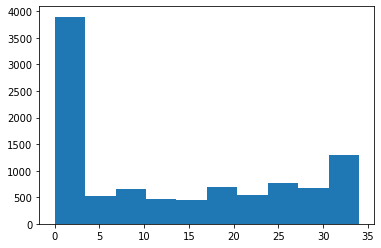

In [159]:
import matplotlib.pyplot as plt
plt.hist(pass_info)

(array([3971.,  528.,  651.,  468.,  458.,  698.,  555.,  767.,  670.,
        1306.]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <BarContainer object of 10 artists>)

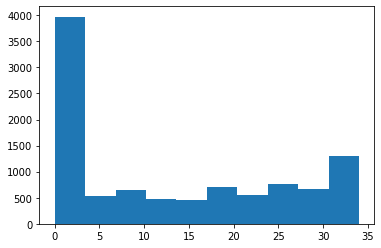

In [138]:
import matplotlib.pyplot as plt
plt.hist(pass_info)

In [151]:
df_preprocess_pass

caseids  NRS                              file_path  \
0      PACU1_1_190412_124642.csv  3.0   3.0,8544,PACU1_1_190412_124642.vital   
1      PACU1_6_201014_103929.csv  2.0   2.0,8005,PACU1_6_201014_103929.vital   
2      PACU1_6_190703_102403.csv  5.0   5.0,8734,PACU1_6_190703_102403.vital   
3      PACU1_1_200716_174742.csv  5.0   5.0,9924,PACU1_1_200716_174742.vital   
4      PACU1_2_200824_144409.csv  6.0   6.0,7215,PACU1_2_200824_144409.vital   
...                          ...  ...                                    ...   
6775  PACU1_10_201008_122558.csv  4.0  4.0,7900,PACU1_10_201008_122558.vital   
6776   PACU1_6_190712_083200.csv  5.0   5.0,1160,PACU1_6_190712_083200.vital   
6777   PACU1_5_200507_083239.csv  3.0   3.0,4961,PACU1_5_200507_083239.vital   
6778   PACU1_9_200811_141457.csv  4.0   4.0,6970,PACU1_9_200811_141457.vital   
6779   PACU1_6_190712_103917.csv  3.0   3.0,1167,PACU1_6_190712_103917.vital   

           opid age gender                                                  1  \
0     190412026  68      F  (False, [0.0, 0.0, 0.0], [0.0, 0.3076923076923...   
1     201014008  28      M  (False, [0.0, 0.0, 0.0], [0.2727272727272727, ...   
2     190703036  54      F  (True, [0.0, 0.0, 0.0], [0.09090909090909091, ...   
3     200716092  26      F             (False, [0.0, 0.0, 0.0], [0.5, 0.125])   
4     200824048  51      M               (True, [0.0, 0.0, 0.0], [0.04, 0.0])   
...         ...  ..    ...                                                ...   
6775  201008073  38      M  (False, [0.0, 0.0, 0.0], [0.08333333333333333,...   
6776  190712013  46      F                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
6777  200507095  80      M  (False, [0.0, 0.0, 0.0], [0.2608695652173913, ...   
6778  200811109  69      F               (True, [0.0, 0.0, 0.0], [0.0, 0.05])   
6779  190712039  61      F              (False, [0.0, 0.0, 0.0], [0.25, 0.0])   

                                                      2  \
0                 (False, [0.0, 0.0, 0.0], [0.0, 0.52])   
1     (False, [0.0, 0.0, 0.0], [0.30434782608695654,...   
2     (True, [0.0, 0.0, 0.0], [0.09523809523809523, ...   
3     (False, [0.0, 0.0, 0.0], [0.30434782608695654,...   
4                 (False, [0.0, 0.0, 0.0], [0.12, 0.0])   
...                                                 ...   
6775  (False, [0.0, 0.0, 0.0], [0.041666666666666664...   
6776                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
6777  (False, [0.0, 0.0, 0.0], [0.22727272727272727,...   
6778                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
6779  (False, [0.0, 0.0, 0.0], [0.6666666666666666, ...   

                                                      3  \
0                 (False, [0.0, 0.0, 0.0], [0.0, 0.56])   
1     (False, [0.0, 0.0, 0.0], [0.16666666666666666,...   
2     (True, [0.0, 0.0, 0.0], [0.09090909090909091, ...   
3     (False, [0.0, 0.0, 0.0], [0.13636363636363635,...   
4                 (False, [0.0, 0.0, 0.0], [0.12, 0.0])   
...                                                 ...   
6775  (False, [0.0, 0.0, 0.0], [0.0, 0.1739130434782...   
6776                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
6777  (False, [0.0, 0.0, 0.0], [0.13636363636363635,...   
6778                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
6779              (False, [0.0, 0.0, 0.0], [0.64, 0.0])   

                                                      4  ...  \
0                 (False, [0.0, 0.0, 0.0], [0.0, 0.56])  ...   
1     (False, [0.0, 0.0, 0.0], [0.08333333333333333,...  ...   
2                   (True, [0.0, 0.0, 0.0], [0.0, 0.0])  ...   
3     (True, [0.0, 0.0, 0.0], [0.09090909090909091, ...  ...   
4                 (False, [0.0, 0.0, 0.0], [0.12, 0.0])  ...   
...                                                 ...  ...   
6775  (False, [0.0, 0.0, 0.0], [0.0, 0.3043478260869...  ...   
6776                (True, [0.0, 0.0, 0.0], [0.0, 0.0])  ...   
6777  (False, [0.0, 0.0, 0.0], [0.13636363636363635,...  ...   
6778                (True, [0.0, 

In [160]:
df_preprocess = pickle.load(open('../DL_model/cache/preprocess5/df_preprocess_pacu_agender','rb'))
df_preprocess_pass = pickle.load(open('../DL_model/cache/preprocess5/df_preprocess_pacu_agender_pass','rb'))

print('전처리 성공한 caseid수: {} -> {}'.format(len(np.unique(df_preprocess['caseids'].tolist())), len(np.unique(df_preprocess_pass['caseids'].tolist()))))
print('전처리 성공한 opid수: {} -> {}'.format(len(np.unique(df_preprocess['opid'].tolist())), len(np.unique(df_preprocess_pass['opid'].tolist()))))          

전처리 성공한 caseid수: 5323 -> 4114
전처리 성공한 opid수: 5170 -> 4059


In [162]:
caseids = np.unique(pickle.load(open('../DL_model/cache/preprocess5/df_preprocess_pacu_agender_pass','rb'))['caseids'])
caseids_prev = np.concatenate([pickle.load(open('../DL_model/caseid_train_new','rb')), pickle.load(open('../DL_model/caseid_val_new','rb')), pickle.load(open('../DL_model/caseid_test_new','rb'))])

len(caseids_prev), len((caseids)), len(set(caseids_prev) - set(caseids)), len(set(caseids) - set(caseids_prev))

(3942, 4114, 553, 725)

In [88]:
caseids = np.unique(pickle.load(open('../DL_model/cache/preprocess5/df_preprocess_pacu_agender','rb'))['caseids'])
caseids_prev = np.concatenate([pickle.load(open('../DL_model/caseid_train_new','rb')), pickle.load(open('../DL_model/caseid_val_new','rb')), pickle.load(open('../DL_model/caseid_test_new','rb'))])

len(caseids_prev), len((caseids)), len(set(caseids_prev) - set(caseids)), len(set(caseids) - set(caseids_prev))

(3942, 4076, 591, 725)

In [163]:
list(set(caseids_prev) - set(caseids))

['PACU1_10_191017_131250.csv',
 'PACU1_1_191024_125724.csv',
 'PACU1_5_190823_162702.csv',
 'PACU1_6_200131_165108.csv',
 'PACU1_9_191127_173937.csv',
 'PACU1_6_190820_105347.csv',
 'PACU1_11_191017_140015.csv',
 'PACU1_2_190816_122022.csv',
 'PACU1_3_190820_162415.csv',
 'PACU1_1_190903_164651.csv',
 'PACU1_3_190410_004914.csv',
 'PACU1_8_190828_103715.csv',
 'PACU1_4_190904_213656.csv',
 'PACU1_3_190902_121654.csv',
 'PACU1_5_190909_153309.csv',
 'PACU1_3_190831_001123.csv',
 'PACU1_10_190820_141017.csv',
 'PACU1_4_190529_090231.csv',
 'PACU1_2_191023_161337.csv',
 'PACU1_2_190827_104029.csv',
 'PACU1_11_190827_131853.csv',
 'PACU1_3_190905_221107.csv',
 'PACU1_1_190828_090242.csv',
 'PACU1_6_190822_101803.csv',
 'PACU1_7_190828_163353.csv',
 'PACU1_3_191021_173645.csv',
 'PACU1_1_191021_084709.csv',
 'PACU1_5_190910_143402.csv',
 'PACU1_5_190905_093024.csv',
 'PACU1_5_200924_091559.csv',
 'PACU1_11_190905_133531.csv',
 'PACU1_5_190816_182521.csv',
 'PACU1_5_190827_110542.csv',
 'PAC

In [183]:
np.array(df_preprocess[df_preprocess['caseids']=='PACU1_10_191017_131250.csv'].iloc[1][[str(i) for i in range(24,58)]].tolist())[:,2]

array([list([0.0, 1.0]), list([0.0, 1.0]), list([0.0, 1.0]),
       list([0.0, 1.0]), list([0.0, 0.7142857142857143]),
       list([0.0, 0.5714285714285714]), list([0.0, 0.75]),
       list([0.0, 0.7333333333333333]), list([0.0, 1.0]),
       list([0.0, 1.0]), list([0.0, 1.0]), list([0.0, 1.0]),
       list([0.0, 1.0]), list([0.0, 1.0]), list([0.0, 1.0]),
       list([0.0, 1.0]), list([0.0, 1.0]), list([0.0, 1.0]),
       list([0.0, 1.0]), list([0.0, 1.0]), list([0.0, 1.0]),
       list([0.0, 1.0]), list([0.0, 1.0]), list([0.0, 1.0]),
       list([0.08333333333333333, 1.0]), list([0.08333333333333333, 1.0]),
       list([0.125, 1.0]), list([0.12, 1.0]),
       list([0.07692307692307693, 1.0]), list([0.08, 1.0]),
       list([0.038461538461538464, 1.0]),
       list([0.038461538461538464, 1.0]), list([0.0, 1.0]),
       list([0.0, 1.0])], dtype=object)

In [185]:
df_preproce ss[df_preprocess['caseids']=='PACU1_5_200618_113715.csv']

caseids  NRS                             file_path  \
807  PACU1_5_200618_113715.csv  5.0  5.0,5999,PACU1_5_200618_113715.vital   

          opid age gender                                    1  \
807  200618096  65      F  (True, [0.0, 0.0, 0.0], [0.0, 0.0])   

                                       2                                    3  \
807  (True, [0.0, 0.0, 0.0], [0.0, 0.0])  (True, [0.0, 0.0, 0.0], [0.0, 0.0])   

                                       4  ...  \
807  (True, [0.0, 0.0, 0.0], [0.0, 0.0])  ...   

                                       48                                  49  \
807  (False, [0.0, 0.0, 0.0], [0.0, 1.0])  (False, [0.0, 0.0, 0.0], [-2, -2])   

                                     50                                  51  \
807  (False, [0.0, 0.0, 0.0], [-2, -2])  (False, [0.0, 0.0, 0.0], [-2, -2])   

                                                    52  \
807  (False, [0.0, 0.0, 0.0], [0.1111111111111111, ...   

                                                    53  \
807  (False, [0.0, 0.0, 0.0], [0.3888888888888889, ...   

                                       54  \
807  (False, [0.0, 0.0, 0.0], [1.0, 1.0])   

                                       55  \
807  (False, [0.0, 0.0, 0.0], [1.0, 1.0])   

                                       56  \
807  (False, [0.0, 0.0, 0.0], [1.0, 1.0])   

                                       57  
807  (False, [0.0, 0.0, 0.0], [1.0, 1.0])  

[1 rows x 63 columns]

In [170]:
df_preprocess[df_preprocess['caseids']=='PACU1_10_191017_131250.csv']#[[str(i) for i in range(24,58)]]

caseids  NRS                              file_path  \
4634  PACU1_10_191017_131250.csv  5.0  5.0,2435,PACU1_10_191017_131250.vital   
7559  PACU1_10_191017_131250.csv  5.0  5.0,2434,PACU1_10_191017_131250.vital   

           opid age gender                                                  1  \
4634  191017089  53      F  (False, [0.0, 0.0, 0.0], [0.9565217391304348, ...   
7559  191017089  53      F               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   

                                         2  \
4634  (False, [0.0, 0.0, 0.0], [1.0, 1.0])   
7559  (False, [0.0, 0.0, 0.0], [0.0, 1.0])   

                                                      3  \
4634  (False, [0.0, 0.0, 0.0], [0.9523809523809523, ...   
7559               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   

                                                      4  ...  \
4634  (False, [0.0, 0.0, 0.0], [0.9523809523809523, ...  ...   
7559               (False, [0.0, 0.0, 0.0], [0.0, 1.0])  ...   

                                                     48  \
4634               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
7559  (False, [0.0, 0.0, 0.0], [0.08333333333333333,...   

                                                     49  \
4634               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
7559  (False, [0.0, 0.0, 0.0], [0.08333333333333333,...   

                                                     50  \
4634  (False, [0.0, 0.0, 0.0], [0.1111111111111111, ...   
7559             (False, [0.0, 0.0, 0.0], [0.125, 1.0])   

                                                     51  \
4634  (False, [0.0, 0.0, 0.0], [0.11538461538461539,...   
7559              (False, [0.0, 0.0, 0.0], [0.12, 1.0])   

                                                     52  \
4634  (False, [0.0, 0.0, 0.0], [0.11538461538461539,...   
7559  (False, [0.0, 0.0, 0.0], [0.07692307692307693,...   

                                                     53  \
4634  (False, [0.0, 0.0, 0.0], [0.07692307692307693,...   
7559              (False, [0.0, 0.0, 0.0], [0.08, 1.0])   

                                                     54  \
4634               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
7559  (False, [0.0, 0.0, 0.0], [0.038461538461538464...   

                                                     55  \
4634  (False, [0.0, 0.0, 0.0], [0.038461538461538464...   
7559  (False, [0.0, 0.0, 0.0], [0.038461538461538464...   

                                                     56  \
4634  (False, [0.0, 0.0, 0.0], [0.038461538461538464...   
7559               (False, [0.0, 0.0, 0.0], [0.0, 1.0])   

                                         57  
4634  (False, [0.0, 0.0, 0.0], [0.04, 1.0])  
7559   (False, [0.0, 0.0, 0.0], [0.0, 1.0])  

[2 rows x 63 columns]

In [172]:
df_demograph[df_demograph['opid']==191017089]

row       oID       hid gender            birthdate  \
2419  2434  25243507  28777199      F  1966-01-01 00:00:00   
2420  2435  25243507  28777199      F  1966-01-01 00:00:00   

                 NRS_time  Value  bed           opend_time       opid  \
2419  2019-10-17 13:20:00    5.0   10  2019-10-17 13:05:00  191017089   
2420  2019-10-17 13:45:00    5.0   10  2019-10-17 13:05:00  191017089   

                         caseids                opday  age  
2419  PACU1_10_191017_131250.csv  2019-10-17 00:00:00   53  
2420  PACU1_10_191017_131250.csv  2019-10-17 00:00:00   53

In [93]:
pickle.dump(list(set(caseids_prev) - set(caseids)), open('../DL_model/caseids_diff','wb'))

In [186]:
df_preprocess[df_preprocess['caseids']=='PACU1_2_190828_105401.csv']#[[str(i) for i in range(24,58)]]

caseids  NRS                             file_path  \
20    PACU1_2_190828_105401.csv  4.0  4.0,8963,PACU1_2_190828_105401.vital   
4774  PACU1_2_190828_105401.csv  7.0  7.0,1903,PACU1_2_190828_105401.vital   
6173  PACU1_2_190828_105401.csv  5.0  5.0,1902,PACU1_2_190828_105401.vital   

           opid age gender                                                  1  \
20    190828045  38      F  (False, [0.0, 0.0, 0.0], [0.3333333333333333, ...   
4774  190828045  38      F                 (False, [0.0, 0.0, 0.0], [-2, -2])   
6173  190828045  38      F                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                      2  \
20    (False, [0.0, 0.0, 0.0], [0.391304347826087, 1...   
4774                 (False, [0.0, 0.0, 0.0], [-2, -2])   
6173                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                      3  \
20    (False, [0.0, 0.0, 0.0], [0.21739130434782608,...   
4774                 (False, [0.0, 0.0, 0.0], [-2, -2])   
6173                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                      4  ...  \
20    (False, [0.0, 0.0, 0.0], [0.3333333333333333, ...  ...   
4774                 (False, [0.0, 0.0, 0.0], [-2, -2])  ...   
6173                 (False, [1.0, 1.0, 1.0], [-1, -1])  ...   

                                                     48  \
20    (False, [0.0, 0.0, 0.0], [0.2692307692307692, ...   
4774                 (False, [0.0, 0.0, 0.0], [-2, -2])   
6173                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                     49  \
20    (False, [0.0, 0.0, 0.0], [0.3076923076923077, ...   
4774                 (False, [0.0, 0.0, 0.0], [-2, -2])   
6173                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                     50  \
20    (False, [0.0, 0.0, 0.0], [0.34615384615384615,...   
4774                 (False, [0.0, 0.0, 0.0], [-2, -2])   
6173                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                     51  \
20    (False, [0.0, 0.0, 0.0], [0.34615384615384615,...   
4774                 (False, [0.0, 0.0, 0.0], [-2, -2])   
6173                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                     52  \
20    (False, [0.0, 0.0, 0.0], [0.2692307692307692, ...   
4774                 (False, [0.0, 0.0, 0.0], [-2, -2])   
6173                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                     53  \
20    (False, [0.0, 0.0, 0.0], [0.23076923076923078,...   
4774                 (False, [0.0, 0.0, 0.0], [-2, -2])   
6173                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                         54  \
20    (False, [0.0, 0.0, 0.0], [0.28, 1.0])   
4774     (False, [0.0, 0.0, 0.0], [-2, -2])   
6173     (False, [1.0, 1.0, 1.0], [-1, -1])   

                                         55  \
20    (False, [0.0, 0.0, 0.0], [0.28, 1.0])   
4774     (False, [0.0, 0.0, 0.0], [-2, -2])   
6173     (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                     56  \
20    (False, [0.0, 0.0, 0.0], [0.3333333333333333, ...   
4774               (False, [0.0, 0.0, 0.0], [1.0, 1.0])   
6173                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                     57  
20    (False, [0.0, 0.0, 0.0], [0.6363636363636364, ...  
4774                 (False, [0.0, 0.0, 0.0], [-2, -2])  
6173                 (False, [1.0, 1.0, 1.0], [-1, -1])  

[3 rows x 63 columns]

# preprocess 6(201227)
- preprocess 5에서 vitaldb로 ppg와 ecg가 이상하게 scaling되는 1898건을 해결함

## 합치기

In [187]:
import os, pickle
import pandas as pd

common_path = '../DL_model/cache/preprocess6/df_preprocess_pacu_'
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
f_vital_list = os.listdir(vital_path)


df_p1 = pickle.load(open(common_path+'0-2000','rb'))
for i in range(1,5):
    df_p1 = pd.concat([df_p1, pickle.load(open(common_path+str(i*2000)+'-'+str((i+1)*2000),'rb'))])
df_preprocess = df_p1


col_file_path = np.array(df_preprocess['file_path'].str.split(',').values.flatten())
df_preprocess.insert(0,'caseids',[col_file_path[i][2][:-5]+'csv' for i in range(len(col_file_path))])
df_preprocess.insert(1, 'NRS', [col_file_path[i][0] for i in range(len(col_file_path))])


# 중복된 행이 있는지 확인
print('초기 sample 수:', len(f_vital_list))
print('total df size:', len(df_preprocess))
print('after removing same files:', len(df_preprocess.drop_duplicates(['file_path'])))

df_preprocess.reset_index(drop=True, inplace=True)
print('dumping start')
pickle.dump(df_preprocess, open('../DL_model/cache/preprocess6/df_preprocess_pacu','wb'))
print('dumping success')

df_preprocess

초기 sample 수: 10075
total df size: 10072
after removing same files: 10072
dumping start
dumping success


caseids  NRS                             file_path  \
0      PACU1_1_190412_124642.csv  3.0  3.0,8544,PACU1_1_190412_124642.vital   
1      PACU1_1_200115_172636.csv  8.0  8.0,3040,PACU1_1_200115_172636.vital   
2      PACU1_6_200609_102625.csv  5.0  5.0,5738,PACU1_6_200609_102625.vital   
3      PACU1_6_201014_103929.csv  2.0  2.0,8005,PACU1_6_201014_103929.vital   
4      PACU1_6_190703_102403.csv  5.0  5.0,8734,PACU1_6_190703_102403.vital   
...                          ...  ...                                   ...   
10067  PACU1_5_200507_083239.csv  3.0  3.0,4961,PACU1_5_200507_083239.vital   
10068  PACU1_9_200811_141457.csv  4.0  4.0,6970,PACU1_9_200811_141457.vital   
10069  PACU1_8_190828_103715.csv  8.0  8.0,1901,PACU1_8_190828_103715.vital   
10070  PACU1_6_190712_103917.csv  3.0  3.0,1167,PACU1_6_190712_103917.vital   
10071  PACU1_3_190816_173927.csv  2.0  2.0,1543,PACU1_3_190816_173927.vital   

                                                       1  \
0      (False, [0.0, 0.0, 0.0], [0.0, 0.3076923076923...   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2      (True, [0.0, 0.0, 0.0], [0.09090909090909091, ...   
3      (False, [0.0, 0.0, 0.0], [0.2727272727272727, ...   
4      (True, [0.0, 0.0, 0.0], [0.09090909090909091, ...   
...                                                  ...   
10067  (False, [0.0, 0.0, 0.0], [0.2608695652173913, ...   
10068               (True, [0.0, 0.0, 0.0], [0.0, 0.05])   
10069  (False, [0.0, 0.0, 0.0], [0.0, 0.1034482758620...   
10070              (False, [0.0, 0.0, 0.0], [0.25, 0.0])   
10071                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   

                                                       2  \
0                  (False, [0.0, 0.0, 0.0], [0.0, 0.52])   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2                    (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
3      (False, [0.0, 0.0, 0.0], [0.30434782608695654,...   
4      (True, [0.0, 0.0, 0.0], [0.09523809523809523, ...   
...                                                  ...   
10067  (False, [0.0, 0.0, 0.0], [0.22727272727272727,...   
10068                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
10069  (True, [0.0, 0.0, 0.0], [0.0, 0.03333333333333...   
10070  (False, [0.0, 0.0, 0.0], [0.6666666666666666, ...   
10071                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   

                                                       3  \
0                  (False, [0.0, 0.0, 0.0], [0.0, 0.56])   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2                    (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
3      (False, [0.0, 0.0, 0.0], [0.16666666666666666,...   
4      (True, [0.0, 0.0, 0.0], [0.09090909090909091, ...   
...                                                  ...   
10067  (False, [0.0, 0.0, 0.0], [0.13636363636363635,...   
10068                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
10069                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
10070              (False, [0.0, 0.0, 0.0], [0.64, 0.0])   
10071                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   

                                                       4  \
0                  (False, [0.0, 0.0, 0.0], [0.0, 0.56])   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2      (True, [0.0, 0.0, 0.0], [0.0, 0.09090909090909...   
3      (False, [0.0, 0.0, 0.0], [0.08333333333333333,...   
4                    (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
...                                                  ...   
10067  (False, [0.0, 0.0, 0.0], [0.13636363636363635,...   
10068                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
10069  (True, [0.0, 0.0, 0.0], [0.0, 0.03571428571428...   
10070  (False, [0.0, 0.0, 0.0], [0.8260869565217391, ...   
10071                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   

                                                       5  \
0                  (False, [0.0, 0.0, 0.0], [0.0, 0.32])   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2           

## age 18세 미만 제거 + age, gender 정보 합치기

In [188]:
df_demograph = pickle.load(open('../DL_model/df_caseids+age+gender', 'rb'))
df_preprocess_pacu = pickle.load(open('../DL_model/cache/preprocess6/df_preprocess_pacu','rb'))


df_len = len(df_preprocess_pacu)
# age와 gender 열 추가
df_preprocess_pacu.loc[:,'age'] = np.nan
df_preprocess_pacu.loc[:,'gender'] = np.nan
df_preprocess_pacu.loc[:,'opid'] = 0


cnt = 0
for idx, row in df_preprocess_pacu.iterrows():     
    row_demo = df_demograph[df_demograph['caseids']==row['caseids']]
    if len(row_demo)==0:
        cnt += 1
        df_preprocess_pacu.drop([idx], inplace=True)
        continue


    df_preprocess_pacu.loc[idx, 'age'] = int(row_demo['age'].values[0])
    df_preprocess_pacu.loc[idx, 'gender'] = row_demo['gender'].values[0]
    df_preprocess_pacu.loc[idx, 'opid'] = row_demo['opid'].values[0]
    
    
print('caseids out of age: {} / {}'.format(cnt, df_len))    
df_preprocess_pacu.reset_index(drop=True, inplace=True)
print('dumping start')
pickle.dump(df_preprocess_pacu, open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender','wb'))
print('dumping success')   


df_preprocess_pacu

caseids out of age: 0 / 10072
dumping start
dumping success


caseids  NRS                             file_path  \
0      PACU1_1_190412_124642.csv  3.0  3.0,8544,PACU1_1_190412_124642.vital   
1      PACU1_1_200115_172636.csv  8.0  8.0,3040,PACU1_1_200115_172636.vital   
2      PACU1_6_200609_102625.csv  5.0  5.0,5738,PACU1_6_200609_102625.vital   
3      PACU1_6_201014_103929.csv  2.0  2.0,8005,PACU1_6_201014_103929.vital   
4      PACU1_6_190703_102403.csv  5.0  5.0,8734,PACU1_6_190703_102403.vital   
...                          ...  ...                                   ...   
10067  PACU1_5_200507_083239.csv  3.0  3.0,4961,PACU1_5_200507_083239.vital   
10068  PACU1_9_200811_141457.csv  4.0  4.0,6970,PACU1_9_200811_141457.vital   
10069  PACU1_8_190828_103715.csv  8.0  8.0,1901,PACU1_8_190828_103715.vital   
10070  PACU1_6_190712_103917.csv  3.0  3.0,1167,PACU1_6_190712_103917.vital   
10071  PACU1_3_190816_173927.csv  2.0  2.0,1543,PACU1_3_190816_173927.vital   

                                                       1  \
0      (False, [0.0, 0.0, 0.0], [0.0, 0.3076923076923...   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2      (True, [0.0, 0.0, 0.0], [0.09090909090909091, ...   
3      (False, [0.0, 0.0, 0.0], [0.2727272727272727, ...   
4      (True, [0.0, 0.0, 0.0], [0.09090909090909091, ...   
...                                                  ...   
10067  (False, [0.0, 0.0, 0.0], [0.2608695652173913, ...   
10068               (True, [0.0, 0.0, 0.0], [0.0, 0.05])   
10069  (False, [0.0, 0.0, 0.0], [0.0, 0.1034482758620...   
10070              (False, [0.0, 0.0, 0.0], [0.25, 0.0])   
10071                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   

                                                       2  \
0                  (False, [0.0, 0.0, 0.0], [0.0, 0.52])   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2                    (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
3      (False, [0.0, 0.0, 0.0], [0.30434782608695654,...   
4      (True, [0.0, 0.0, 0.0], [0.09523809523809523, ...   
...                                                  ...   
10067  (False, [0.0, 0.0, 0.0], [0.22727272727272727,...   
10068                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
10069  (True, [0.0, 0.0, 0.0], [0.0, 0.03333333333333...   
10070  (False, [0.0, 0.0, 0.0], [0.6666666666666666, ...   
10071                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   

                                                       3  \
0                  (False, [0.0, 0.0, 0.0], [0.0, 0.56])   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2                    (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
3      (False, [0.0, 0.0, 0.0], [0.16666666666666666,...   
4      (True, [0.0, 0.0, 0.0], [0.09090909090909091, ...   
...                                                  ...   
10067  (False, [0.0, 0.0, 0.0], [0.13636363636363635,...   
10068                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
10069                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
10070              (False, [0.0, 0.0, 0.0], [0.64, 0.0])   
10071                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   

                                                       4  \
0                  (False, [0.0, 0.0, 0.0], [0.0, 0.56])   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2      (True, [0.0, 0.0, 0.0], [0.0, 0.09090909090909...   
3      (False, [0.0, 0.0, 0.0], [0.08333333333333333,...   
4                    (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
...                                                  ...   
10067  (False, [0.0, 0.0, 0.0], [0.13636363636363635,...   
10068                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
10069  (True, [0.0, 0.0, 0.0], [0.0, 0.03571428571428...   
10070  (False, [0.0, 0.0, 0.0], [0.8260869565217391, ...   
10071                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   

                                                       5  \
0                  (False, [0.0, 0.0, 0.0], [0.0, 0.32])   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2           

## 환자 caseid, nrs 건수

In [191]:
import pandas as pd
import pickle, os

# 
df_preprocess = pickle.load(open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender','rb'))


# 회복실 입퇴실시간이 긴 경우, SUPREME의 오류로 NRS 측정시간이 다른 환자 케이스를 덮어버린 경우 (중복 케이스)
df_duplicate_list = pickle.load(open('../DL_model/duplicates_list', 'rb'))


print('매칭 중복 제거 전 df행 크기:', len(df_preprocess))
print('매칭 중복 제거 전 caseid수:', len(np.unique(df_preprocess['caseids'].tolist())))

duplicate_list = np.array(df_duplicate_list['caseid'].tolist())

for duplicate_file in duplicate_list:
    index_list = df_preprocess[df_preprocess['caseids']==duplicate_file].index
    df_preprocess.drop(index_list, inplace=True)
    
#df_preprocess.reset_index(drop=True, inplace=True)
#pickle.dump(df_preprocess, open('../DL_model/cache/preprocess5/df_preprocess_pacu_agender','wb'))


print('\n매칭 중복 제거 후 df행 크기:', len(df_preprocess))
print('매칭 중복 제거 후 caseid수:', len(np.unique(df_preprocess['caseids'].tolist())))


df_preprocess.reset_index(drop=True, inplace=True)
pickle.dump(df_preprocess, open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender','wb'))

매칭 중복 제거 전 df행 크기: 10072
매칭 중복 제거 전 caseid수: 5364

매칭 중복 제거 후 df행 크기: 9949
매칭 중복 제거 후 caseid수: 5323


## 전처리 결과 input이 없는 caseid 제거 (NRS 측정 전 3분만 고려)

In [193]:
file_name_test, file_name_train = [], []
case_name_test = []

false_row_list_pacu_3_2 = []
pass_info = []

df_preprocess = pickle.load(open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender','rb'))

# pacu의 vital_path
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min/'
# df의 모든 행을 돌며 train set, test set 구성
for row in range(len(df_preprocess)):
    print('loading data {}/{} ...'.format(row+1, len(df_preprocess)), end='')

    # vital data loading
    #df_vital = pickle.load(open(vital_path+df_preprocess.loc[row,'file_path'], 'rb')).reset_index()
    
    switch = 0
    # 한 NRS에 대해 51개의 input 확인
    for i in range(23,57):
        # input이 전처리 통과한 경우
        if df_preprocess.loc[row, str(i+1)][0]:
            switch += 1

                
    if switch == 0:
        false_row_list_pacu_3_2.append(df_preprocess.loc[row,'file_path'])
        df_preprocess.drop(row, inplace=True)
    pass_info.append(switch)
        
    print('completed')
    

df_preprocess.reset_index(drop=True, inplace=True)
pickle.dump(df_preprocess, open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender_pass','wb'))

loading data 1/9949 ...completed
loading data 2/9949 ...completed
loading data 3/9948 ...completed
loading data 4/9947 ...completed
loading data 5/9947 ...completed
loading data 6/9947 ...completed
loading data 7/9946 ...completed
loading data 8/9946 ...completed
loading data 9/9946 ...completed
loading data 10/9946 ...completed
loading data 11/9945 ...completed
loading data 12/9945 ...completed
loading data 13/9945 ...completed
loading data 14/9945 ...completed
loading data 15/9945 ...completed
loading data 16/9945 ...completed
loading data 17/9944 ...completed
loading data 18/9944 ...completed
loading data 19/9944 ...completed
loading data 20/9944 ...completed
loading data 21/9944 ...completed
loading data 22/9943 ...completed
loading data 23/9943 ...completed
loading data 24/9943 ...completed
loading data 25/9943 ...completed
loading data 26/9943 ...completed
loading data 27/9943 ...completed
loading data 28/9943 ...completed
loading data 29/9943 ...completed
loading data 30/9943 ..

loading data 288/9897 ...completed
loading data 289/9896 ...completed
loading data 290/9896 ...completed
loading data 291/9896 ...completed
loading data 292/9896 ...completed
loading data 293/9896 ...completed
loading data 294/9896 ...completed
loading data 295/9896 ...completed
loading data 296/9895 ...completed
loading data 297/9895 ...completed
loading data 298/9895 ...completed
loading data 299/9895 ...completed
loading data 300/9895 ...completed
loading data 301/9895 ...completed
loading data 302/9895 ...completed
loading data 303/9895 ...completed
loading data 304/9895 ...completed
loading data 305/9894 ...completed
loading data 306/9893 ...completed
loading data 307/9893 ...completed
loading data 308/9893 ...completed
loading data 309/9892 ...completed
loading data 310/9892 ...completed
loading data 311/9892 ...completed
loading data 312/9892 ...completed
loading data 313/9892 ...completed
loading data 314/9891 ...completed
loading data 315/9891 ...completed
loading data 316/989

loading data 527/9855 ...completed
loading data 528/9854 ...completed
loading data 529/9854 ...completed
loading data 530/9854 ...completed
loading data 531/9854 ...completed
loading data 532/9854 ...completed
loading data 533/9854 ...completed
loading data 534/9854 ...completed
loading data 535/9854 ...completed
loading data 536/9854 ...completed
loading data 537/9854 ...completed
loading data 538/9854 ...completed
loading data 539/9854 ...completed
loading data 540/9854 ...completed
loading data 541/9854 ...completed
loading data 542/9854 ...completed
loading data 543/9854 ...completed
loading data 544/9854 ...completed
loading data 545/9853 ...completed
loading data 546/9853 ...completed
loading data 547/9853 ...completed
loading data 548/9853 ...completed
loading data 549/9853 ...completed
loading data 550/9853 ...completed
loading data 551/9853 ...completed
loading data 552/9853 ...completed
loading data 553/9853 ...completed
loading data 554/9852 ...completed
loading data 555/985

loading data 807/9803 ...completed
loading data 808/9802 ...completed
loading data 809/9802 ...completed
loading data 810/9802 ...completed
loading data 811/9802 ...completed
loading data 812/9802 ...completed
loading data 813/9802 ...completed
loading data 814/9801 ...completed
loading data 815/9800 ...completed
loading data 816/9799 ...completed
loading data 817/9799 ...completed
loading data 818/9798 ...completed
loading data 819/9798 ...completed
loading data 820/9798 ...completed
loading data 821/9798 ...completed
loading data 822/9798 ...completed
loading data 823/9798 ...completed
loading data 824/9798 ...completed
loading data 825/9798 ...completed
loading data 826/9798 ...completed
loading data 827/9798 ...completed
loading data 828/9798 ...completed
loading data 829/9798 ...completed
loading data 830/9798 ...completed
loading data 831/9798 ...completed
loading data 832/9798 ...completed
loading data 833/9798 ...completed
loading data 834/9798 ...completed
loading data 835/979

loading data 1060/9760 ...completed
loading data 1061/9759 ...completed
loading data 1062/9759 ...completed
loading data 1063/9759 ...completed
loading data 1064/9759 ...completed
loading data 1065/9759 ...completed
loading data 1066/9758 ...completed
loading data 1067/9758 ...completed
loading data 1068/9758 ...completed
loading data 1069/9758 ...completed
loading data 1070/9757 ...completed
loading data 1071/9757 ...completed
loading data 1072/9757 ...completed
loading data 1073/9756 ...completed
loading data 1074/9756 ...completed
loading data 1075/9756 ...completed
loading data 1076/9756 ...completed
loading data 1077/9756 ...completed
loading data 1078/9756 ...completed
loading data 1079/9756 ...completed
loading data 1080/9756 ...completed
loading data 1081/9756 ...completed
loading data 1082/9756 ...completed
loading data 1083/9756 ...completed
loading data 1084/9756 ...completed
loading data 1085/9756 ...completed
loading data 1086/9756 ...completed
loading data 1087/9756 ...co

loading data 1332/9707 ...completed
loading data 1333/9707 ...completed
loading data 1334/9707 ...completed
loading data 1335/9707 ...completed
loading data 1336/9706 ...completed
loading data 1337/9706 ...completed
loading data 1338/9705 ...completed
loading data 1339/9705 ...completed
loading data 1340/9705 ...completed
loading data 1341/9704 ...completed
loading data 1342/9704 ...completed
loading data 1343/9703 ...completed
loading data 1344/9703 ...completed
loading data 1345/9703 ...completed
loading data 1346/9702 ...completed
loading data 1347/9702 ...completed
loading data 1348/9702 ...completed
loading data 1349/9702 ...completed
loading data 1350/9702 ...completed
loading data 1351/9701 ...completed
loading data 1352/9700 ...completed
loading data 1353/9699 ...completed
loading data 1354/9699 ...completed
loading data 1355/9698 ...completed
loading data 1356/9698 ...completed
loading data 1357/9697 ...completed
loading data 1358/9697 ...completed
loading data 1359/9697 ...co

loading data 1566/9653 ...completed
loading data 1567/9652 ...completed
loading data 1568/9651 ...completed
loading data 1569/9651 ...completed
loading data 1570/9651 ...completed
loading data 1571/9651 ...completed
loading data 1572/9651 ...completed
loading data 1573/9651 ...completed
loading data 1574/9651 ...completed
loading data 1575/9651 ...completed
loading data 1576/9651 ...completed
loading data 1577/9651 ...completed
loading data 1578/9651 ...completed
loading data 1579/9651 ...completed
loading data 1580/9650 ...completed
loading data 1581/9650 ...completed
loading data 1582/9650 ...completed
loading data 1583/9650 ...completed
loading data 1584/9650 ...completed
loading data 1585/9650 ...completed
loading data 1586/9650 ...completed
loading data 1587/9650 ...completed
loading data 1588/9650 ...completed
loading data 1589/9650 ...completed
loading data 1590/9650 ...completed
loading data 1591/9649 ...completed
loading data 1592/9648 ...completed
loading data 1593/9648 ...co

loading data 1794/9595 ...completed
loading data 1795/9594 ...completed
loading data 1796/9594 ...completed
loading data 1797/9594 ...completed
loading data 1798/9594 ...completed
loading data 1799/9594 ...completed
loading data 1800/9594 ...completed
loading data 1801/9594 ...completed
loading data 1802/9594 ...completed
loading data 1803/9593 ...completed
loading data 1804/9593 ...completed
loading data 1805/9593 ...completed
loading data 1806/9593 ...completed
loading data 1807/9593 ...completed
loading data 1808/9593 ...completed
loading data 1809/9593 ...completed
loading data 1810/9593 ...completed
loading data 1811/9593 ...completed
loading data 1812/9592 ...completed
loading data 1813/9592 ...completed
loading data 1814/9592 ...completed
loading data 1815/9592 ...completed
loading data 1816/9592 ...completed
loading data 1817/9592 ...completed
loading data 1818/9592 ...completed
loading data 1819/9592 ...completed
loading data 1820/9592 ...completed
loading data 1821/9592 ...co

loading data 2041/9555 ...completed
loading data 2042/9554 ...completed
loading data 2043/9554 ...completed
loading data 2044/9553 ...completed
loading data 2045/9553 ...completed
loading data 2046/9553 ...completed
loading data 2047/9553 ...completed
loading data 2048/9552 ...completed
loading data 2049/9552 ...completed
loading data 2050/9551 ...completed
loading data 2051/9551 ...completed
loading data 2052/9551 ...completed
loading data 2053/9551 ...completed
loading data 2054/9551 ...completed
loading data 2055/9551 ...completed
loading data 2056/9551 ...completed
loading data 2057/9551 ...completed
loading data 2058/9551 ...completed
loading data 2059/9551 ...completed
loading data 2060/9551 ...completed
loading data 2061/9550 ...completed
loading data 2062/9549 ...completed
loading data 2063/9549 ...completed
loading data 2064/9549 ...completed
loading data 2065/9548 ...completed
loading data 2066/9548 ...completed
loading data 2067/9547 ...completed
loading data 2068/9547 ...co

loading data 2327/9500 ...completed
loading data 2328/9499 ...completed
loading data 2329/9499 ...completed
loading data 2330/9498 ...completed
loading data 2331/9498 ...completed
loading data 2332/9498 ...completed
loading data 2333/9497 ...completed
loading data 2334/9497 ...completed
loading data 2335/9497 ...completed
loading data 2336/9497 ...completed
loading data 2337/9497 ...completed
loading data 2338/9497 ...completed
loading data 2339/9497 ...completed
loading data 2340/9497 ...completed
loading data 2341/9497 ...completed
loading data 2342/9497 ...completed
loading data 2343/9496 ...completed
loading data 2344/9495 ...completed
loading data 2345/9495 ...completed
loading data 2346/9494 ...completed
loading data 2347/9494 ...completed
loading data 2348/9494 ...completed
loading data 2349/9493 ...completed
loading data 2350/9493 ...completed
loading data 2351/9493 ...completed
loading data 2352/9493 ...completed
loading data 2353/9493 ...completed
loading data 2354/9493 ...co

loading data 2592/9457 ...completed
loading data 2593/9456 ...completed
loading data 2594/9455 ...completed
loading data 2595/9455 ...completed
loading data 2596/9454 ...completed
loading data 2597/9453 ...completed
loading data 2598/9453 ...completed
loading data 2599/9453 ...completed
loading data 2600/9453 ...completed
loading data 2601/9453 ...completed
loading data 2602/9452 ...completed
loading data 2603/9451 ...completed
loading data 2604/9451 ...completed
loading data 2605/9451 ...completed
loading data 2606/9451 ...completed
loading data 2607/9451 ...completed
loading data 2608/9451 ...completed
loading data 2609/9451 ...completed
loading data 2610/9451 ...completed
loading data 2611/9450 ...completed
loading data 2612/9450 ...completed
loading data 2613/9449 ...completed
loading data 2614/9449 ...completed
loading data 2615/9448 ...completed
loading data 2616/9447 ...completed
loading data 2617/9447 ...completed
loading data 2618/9447 ...completed
loading data 2619/9446 ...co

loading data 2836/9399 ...completed
loading data 2837/9398 ...completed
loading data 2838/9398 ...completed
loading data 2839/9398 ...completed
loading data 2840/9398 ...completed
loading data 2841/9398 ...completed
loading data 2842/9398 ...completed
loading data 2843/9397 ...completed
loading data 2844/9397 ...completed
loading data 2845/9397 ...completed
loading data 2846/9397 ...completed
loading data 2847/9397 ...completed
loading data 2848/9397 ...completed
loading data 2849/9397 ...completed
loading data 2850/9397 ...completed
loading data 2851/9397 ...completed
loading data 2852/9397 ...completed
loading data 2853/9397 ...completed
loading data 2854/9397 ...completed
loading data 2855/9396 ...completed
loading data 2856/9395 ...completed
loading data 2857/9395 ...completed
loading data 2858/9395 ...completed
loading data 2859/9394 ...completed
loading data 2860/9393 ...completed
loading data 2861/9392 ...completed
loading data 2862/9391 ...completed
loading data 2863/9391 ...co

loading data 3087/9354 ...completed
loading data 3088/9353 ...completed
loading data 3089/9353 ...completed
loading data 3090/9353 ...completed
loading data 3091/9352 ...completed
loading data 3092/9352 ...completed
loading data 3093/9352 ...completed
loading data 3094/9352 ...completed
loading data 3095/9351 ...completed
loading data 3096/9351 ...completed
loading data 3097/9351 ...completed
loading data 3098/9351 ...completed
loading data 3099/9351 ...completed
loading data 3100/9351 ...completed
loading data 3101/9351 ...completed
loading data 3102/9351 ...completed
loading data 3103/9351 ...completed
loading data 3104/9350 ...completed
loading data 3105/9349 ...completed
loading data 3106/9349 ...completed
loading data 3107/9349 ...completed
loading data 3108/9348 ...completed
loading data 3109/9348 ...completed
loading data 3110/9347 ...completed
loading data 3111/9347 ...completed
loading data 3112/9347 ...completed
loading data 3113/9347 ...completed
loading data 3114/9347 ...co

loading data 3358/9297 ...completed
loading data 3359/9296 ...completed
loading data 3360/9296 ...completed
loading data 3361/9296 ...completed
loading data 3362/9296 ...completed
loading data 3363/9296 ...completed
loading data 3364/9296 ...completed
loading data 3365/9296 ...completed
loading data 3366/9296 ...completed
loading data 3367/9296 ...completed
loading data 3368/9296 ...completed
loading data 3369/9295 ...completed
loading data 3370/9295 ...completed
loading data 3371/9294 ...completed
loading data 3372/9294 ...completed
loading data 3373/9294 ...completed
loading data 3374/9293 ...completed
loading data 3375/9292 ...completed
loading data 3376/9292 ...completed
loading data 3377/9291 ...completed
loading data 3378/9291 ...completed
loading data 3379/9291 ...completed
loading data 3380/9291 ...completed
loading data 3381/9291 ...completed
loading data 3382/9291 ...completed
loading data 3383/9291 ...completed
loading data 3384/9291 ...completed
loading data 3385/9290 ...co

loading data 3674/9240 ...completed
loading data 3675/9239 ...completed
loading data 3676/9238 ...completed
loading data 3677/9237 ...completed
loading data 3678/9237 ...completed
loading data 3679/9236 ...completed
loading data 3680/9236 ...completed
loading data 3681/9236 ...completed
loading data 3682/9235 ...completed
loading data 3683/9235 ...completed
loading data 3684/9235 ...completed
loading data 3685/9235 ...completed
loading data 3686/9235 ...completed
loading data 3687/9235 ...completed
loading data 3688/9234 ...completed
loading data 3689/9234 ...completed
loading data 3690/9234 ...completed
loading data 3691/9234 ...completed
loading data 3692/9234 ...completed
loading data 3693/9234 ...completed
loading data 3694/9234 ...completed
loading data 3695/9234 ...completed
loading data 3696/9234 ...completed
loading data 3697/9233 ...completed
loading data 3698/9233 ...completed
loading data 3699/9233 ...completed
loading data 3700/9232 ...completed
loading data 3701/9232 ...co

loading data 3911/9194 ...completed
loading data 3912/9194 ...completed
loading data 3913/9194 ...completed
loading data 3914/9194 ...completed
loading data 3915/9193 ...completed
loading data 3916/9193 ...completed
loading data 3917/9193 ...completed
loading data 3918/9193 ...completed
loading data 3919/9193 ...completed
loading data 3920/9193 ...completed
loading data 3921/9193 ...completed
loading data 3922/9192 ...completed
loading data 3923/9192 ...completed
loading data 3924/9192 ...completed
loading data 3925/9192 ...completed
loading data 3926/9192 ...completed
loading data 3927/9192 ...completed
loading data 3928/9192 ...completed
loading data 3929/9192 ...completed
loading data 3930/9192 ...completed
loading data 3931/9192 ...completed
loading data 3932/9191 ...completed
loading data 3933/9191 ...completed
loading data 3934/9191 ...completed
loading data 3935/9191 ...completed
loading data 3936/9191 ...completed
loading data 3937/9190 ...completed
loading data 3938/9190 ...co

loading data 4160/9150 ...completed
loading data 4161/9149 ...completed
loading data 4162/9149 ...completed
loading data 4163/9149 ...completed
loading data 4164/9149 ...completed
loading data 4165/9149 ...completed
loading data 4166/9148 ...completed
loading data 4167/9148 ...completed
loading data 4168/9148 ...completed
loading data 4169/9148 ...completed
loading data 4170/9148 ...completed
loading data 4171/9148 ...completed
loading data 4172/9148 ...completed
loading data 4173/9147 ...completed
loading data 4174/9146 ...completed
loading data 4175/9146 ...completed
loading data 4176/9146 ...completed
loading data 4177/9146 ...completed
loading data 4178/9146 ...completed
loading data 4179/9146 ...completed
loading data 4180/9145 ...completed
loading data 4181/9145 ...completed
loading data 4182/9144 ...completed
loading data 4183/9144 ...completed
loading data 4184/9143 ...completed
loading data 4185/9142 ...completed
loading data 4186/9142 ...completed
loading data 4187/9141 ...co

loading data 4422/9092 ...completed
loading data 4423/9091 ...completed
loading data 4424/9091 ...completed
loading data 4425/9091 ...completed
loading data 4426/9090 ...completed
loading data 4427/9090 ...completed
loading data 4428/9090 ...completed
loading data 4429/9090 ...completed
loading data 4430/9089 ...completed
loading data 4431/9089 ...completed
loading data 4432/9088 ...completed
loading data 4433/9088 ...completed
loading data 4434/9088 ...completed
loading data 4435/9088 ...completed
loading data 4436/9087 ...completed
loading data 4437/9087 ...completed
loading data 4438/9086 ...completed
loading data 4439/9086 ...completed
loading data 4440/9085 ...completed
loading data 4441/9085 ...completed
loading data 4442/9085 ...completed
loading data 4443/9085 ...completed
loading data 4444/9085 ...completed
loading data 4445/9085 ...completed
loading data 4446/9085 ...completed
loading data 4447/9085 ...completed
loading data 4448/9085 ...completed
loading data 4449/9085 ...co

loading data 4682/9047 ...completed
loading data 4683/9046 ...completed
loading data 4684/9046 ...completed
loading data 4685/9046 ...completed
loading data 4686/9045 ...completed
loading data 4687/9045 ...completed
loading data 4688/9045 ...completed
loading data 4689/9045 ...completed
loading data 4690/9045 ...completed
loading data 4691/9044 ...completed
loading data 4692/9044 ...completed
loading data 4693/9044 ...completed
loading data 4694/9044 ...completed
loading data 4695/9044 ...completed
loading data 4696/9044 ...completed
loading data 4697/9044 ...completed
loading data 4698/9043 ...completed
loading data 4699/9042 ...completed
loading data 4700/9042 ...completed
loading data 4701/9042 ...completed
loading data 4702/9042 ...completed
loading data 4703/9042 ...completed
loading data 4704/9041 ...completed
loading data 4705/9041 ...completed
loading data 4706/9041 ...completed
loading data 4707/9041 ...completed
loading data 4708/9041 ...completed
loading data 4709/9041 ...co

loading data 4947/8990 ...completed
loading data 4948/8989 ...completed
loading data 4949/8989 ...completed
loading data 4950/8989 ...completed
loading data 4951/8988 ...completed
loading data 4952/8988 ...completed
loading data 4953/8987 ...completed
loading data 4954/8987 ...completed
loading data 4955/8987 ...completed
loading data 4956/8986 ...completed
loading data 4957/8986 ...completed
loading data 4958/8986 ...completed
loading data 4959/8986 ...completed
loading data 4960/8986 ...completed
loading data 4961/8986 ...completed
loading data 4962/8986 ...completed
loading data 4963/8986 ...completed
loading data 4964/8986 ...completed
loading data 4965/8986 ...completed
loading data 4966/8985 ...completed
loading data 4967/8985 ...completed
loading data 4968/8985 ...completed
loading data 4969/8985 ...completed
loading data 4970/8985 ...completed
loading data 4971/8985 ...completed
loading data 4972/8984 ...completed
loading data 4973/8983 ...completed
loading data 4974/8983 ...co

loading data 5219/8934 ...completed
loading data 5220/8933 ...completed
loading data 5221/8933 ...completed
loading data 5222/8933 ...completed
loading data 5223/8933 ...completed
loading data 5224/8933 ...completed
loading data 5225/8933 ...completed
loading data 5226/8933 ...completed
loading data 5227/8933 ...completed
loading data 5228/8933 ...completed
loading data 5229/8932 ...completed
loading data 5230/8931 ...completed
loading data 5231/8931 ...completed
loading data 5232/8931 ...completed
loading data 5233/8930 ...completed
loading data 5234/8930 ...completed
loading data 5235/8930 ...completed
loading data 5236/8930 ...completed
loading data 5237/8929 ...completed
loading data 5238/8929 ...completed
loading data 5239/8929 ...completed
loading data 5240/8929 ...completed
loading data 5241/8929 ...completed
loading data 5242/8928 ...completed
loading data 5243/8928 ...completed
loading data 5244/8928 ...completed
loading data 5245/8927 ...completed
loading data 5246/8927 ...co

loading data 5454/8891 ...completed
loading data 5455/8890 ...completed
loading data 5456/8890 ...completed
loading data 5457/8890 ...completed
loading data 5458/8890 ...completed
loading data 5459/8890 ...completed
loading data 5460/8890 ...completed
loading data 5461/8889 ...completed
loading data 5462/8889 ...completed
loading data 5463/8889 ...completed
loading data 5464/8889 ...completed
loading data 5465/8888 ...completed
loading data 5466/8888 ...completed
loading data 5467/8888 ...completed
loading data 5468/8888 ...completed
loading data 5469/8888 ...completed
loading data 5470/8888 ...completed
loading data 5471/8887 ...completed
loading data 5472/8887 ...completed
loading data 5473/8887 ...completed
loading data 5474/8887 ...completed
loading data 5475/8887 ...completed
loading data 5476/8886 ...completed
loading data 5477/8885 ...completed
loading data 5478/8885 ...completed
loading data 5479/8885 ...completed
loading data 5480/8885 ...completed
loading data 5481/8885 ...co

loading data 5719/8834 ...completed
loading data 5720/8833 ...completed
loading data 5721/8832 ...completed
loading data 5722/8832 ...completed
loading data 5723/8832 ...completed
loading data 5724/8832 ...completed
loading data 5725/8832 ...completed
loading data 5726/8832 ...completed
loading data 5727/8832 ...completed
loading data 5728/8832 ...completed
loading data 5729/8832 ...completed
loading data 5730/8831 ...completed
loading data 5731/8830 ...completed
loading data 5732/8829 ...completed
loading data 5733/8828 ...completed
loading data 5734/8827 ...completed
loading data 5735/8827 ...completed
loading data 5736/8826 ...completed
loading data 5737/8826 ...completed
loading data 5738/8825 ...completed
loading data 5739/8824 ...completed
loading data 5740/8823 ...completed
loading data 5741/8823 ...completed
loading data 5742/8823 ...completed
loading data 5743/8823 ...completed
loading data 5744/8822 ...completed
loading data 5745/8822 ...completed
loading data 5746/8821 ...co

loading data 6002/8778 ...completed
loading data 6003/8777 ...completed
loading data 6004/8777 ...completed
loading data 6005/8777 ...completed
loading data 6006/8776 ...completed
loading data 6007/8776 ...completed
loading data 6008/8776 ...completed
loading data 6009/8776 ...completed
loading data 6010/8775 ...completed
loading data 6011/8774 ...completed
loading data 6012/8774 ...completed
loading data 6013/8774 ...completed
loading data 6014/8774 ...completed
loading data 6015/8773 ...completed
loading data 6016/8773 ...completed
loading data 6017/8773 ...completed
loading data 6018/8773 ...completed
loading data 6019/8773 ...completed
loading data 6020/8773 ...completed
loading data 6021/8773 ...completed
loading data 6022/8773 ...completed
loading data 6023/8773 ...completed
loading data 6024/8773 ...completed
loading data 6025/8773 ...completed
loading data 6026/8772 ...completed
loading data 6027/8771 ...completed
loading data 6028/8771 ...completed
loading data 6029/8771 ...co

loading data 6244/8717 ...completed
loading data 6245/8716 ...completed
loading data 6246/8716 ...completed
loading data 6247/8716 ...completed
loading data 6248/8716 ...completed
loading data 6249/8716 ...completed
loading data 6250/8716 ...completed
loading data 6251/8716 ...completed
loading data 6252/8716 ...completed
loading data 6253/8716 ...completed
loading data 6254/8715 ...completed
loading data 6255/8715 ...completed
loading data 6256/8715 ...completed
loading data 6257/8715 ...completed
loading data 6258/8714 ...completed
loading data 6259/8714 ...completed
loading data 6260/8714 ...completed
loading data 6261/8713 ...completed
loading data 6262/8713 ...completed
loading data 6263/8713 ...completed
loading data 6264/8713 ...completed
loading data 6265/8712 ...completed
loading data 6266/8711 ...completed
loading data 6267/8711 ...completed
loading data 6268/8711 ...completed
loading data 6269/8711 ...completed
loading data 6270/8711 ...completed
loading data 6271/8711 ...co

loading data 6479/8672 ...completed
loading data 6480/8672 ...completed
loading data 6481/8672 ...completed
loading data 6482/8672 ...completed
loading data 6483/8672 ...completed
loading data 6484/8672 ...completed
loading data 6485/8671 ...completed
loading data 6486/8671 ...completed
loading data 6487/8671 ...completed
loading data 6488/8671 ...completed
loading data 6489/8671 ...completed
loading data 6490/8671 ...completed
loading data 6491/8671 ...completed
loading data 6492/8670 ...completed
loading data 6493/8670 ...completed
loading data 6494/8670 ...completed
loading data 6495/8670 ...completed
loading data 6496/8670 ...completed
loading data 6497/8670 ...completed
loading data 6498/8670 ...completed
loading data 6499/8670 ...completed
loading data 6500/8670 ...completed
loading data 6501/8670 ...completed
loading data 6502/8670 ...completed
loading data 6503/8670 ...completed
loading data 6504/8670 ...completed
loading data 6505/8670 ...completed
loading data 6506/8670 ...co

loading data 6714/8627 ...completed
loading data 6715/8626 ...completed
loading data 6716/8626 ...completed
loading data 6717/8626 ...completed
loading data 6718/8625 ...completed
loading data 6719/8625 ...completed
loading data 6720/8625 ...completed
loading data 6721/8625 ...completed
loading data 6722/8625 ...completed
loading data 6723/8624 ...completed
loading data 6724/8624 ...completed
loading data 6725/8623 ...completed
loading data 6726/8623 ...completed
loading data 6727/8622 ...completed
loading data 6728/8622 ...completed
loading data 6729/8621 ...completed
loading data 6730/8621 ...completed
loading data 6731/8621 ...completed
loading data 6732/8621 ...completed
loading data 6733/8621 ...completed
loading data 6734/8621 ...completed
loading data 6735/8621 ...completed
loading data 6736/8621 ...completed
loading data 6737/8621 ...completed
loading data 6738/8620 ...completed
loading data 6739/8620 ...completed
loading data 6740/8620 ...completed
loading data 6741/8620 ...co

loading data 7204/8522 ...completed
loading data 7205/8521 ...completed
loading data 7206/8521 ...completed
loading data 7207/8521 ...completed
loading data 7208/8521 ...completed
loading data 7209/8521 ...completed
loading data 7210/8520 ...completed
loading data 7211/8520 ...completed
loading data 7212/8520 ...completed
loading data 7213/8519 ...completed
loading data 7214/8519 ...completed
loading data 7215/8519 ...completed
loading data 7216/8519 ...completed
loading data 7217/8519 ...completed
loading data 7218/8518 ...completed
loading data 7219/8518 ...completed
loading data 7220/8518 ...completed
loading data 7221/8518 ...completed
loading data 7222/8518 ...completed
loading data 7223/8518 ...completed
loading data 7224/8518 ...completed
loading data 7225/8518 ...completed
loading data 7226/8517 ...completed
loading data 7227/8516 ...completed
loading data 7228/8516 ...completed
loading data 7229/8516 ...completed
loading data 7230/8516 ...completed
loading data 7231/8516 ...co

loading data 7432/8477 ...completed
loading data 7433/8476 ...completed
loading data 7434/8476 ...completed
loading data 7435/8475 ...completed
loading data 7436/8475 ...completed
loading data 7437/8475 ...completed
loading data 7438/8475 ...completed
loading data 7439/8474 ...completed
loading data 7440/8474 ...completed
loading data 7441/8474 ...completed
loading data 7442/8474 ...completed
loading data 7443/8474 ...completed
loading data 7444/8474 ...completed
loading data 7445/8474 ...completed
loading data 7446/8474 ...completed
loading data 7447/8474 ...completed
loading data 7448/8474 ...completed
loading data 7449/8473 ...completed
loading data 7450/8473 ...completed
loading data 7451/8473 ...completed
loading data 7452/8473 ...completed
loading data 7453/8472 ...completed
loading data 7454/8471 ...completed
loading data 7455/8471 ...completed
loading data 7456/8471 ...completed
loading data 7457/8471 ...completed
loading data 7458/8471 ...completed
loading data 7459/8471 ...co

loading data 7664/8430 ...completed
loading data 7665/8429 ...completed
loading data 7666/8428 ...completed
loading data 7667/8428 ...completed
loading data 7668/8427 ...completed
loading data 7669/8426 ...completed
loading data 7670/8425 ...completed
loading data 7671/8424 ...completed
loading data 7672/8424 ...completed
loading data 7673/8424 ...completed
loading data 7674/8424 ...completed
loading data 7675/8424 ...completed
loading data 7676/8424 ...completed
loading data 7677/8424 ...completed
loading data 7678/8424 ...completed
loading data 7679/8423 ...completed
loading data 7680/8422 ...completed
loading data 7681/8421 ...completed
loading data 7682/8421 ...completed
loading data 7683/8421 ...completed
loading data 7684/8420 ...completed
loading data 7685/8420 ...completed
loading data 7686/8420 ...completed
loading data 7687/8420 ...completed
loading data 7688/8420 ...completed
loading data 7689/8420 ...completed
loading data 7690/8419 ...completed
loading data 7691/8419 ...co

loading data 7925/8369 ...completed
loading data 7926/8368 ...completed
loading data 7927/8368 ...completed
loading data 7928/8368 ...completed
loading data 7929/8368 ...completed
loading data 7930/8368 ...completed
loading data 7931/8368 ...completed
loading data 7932/8368 ...completed
loading data 7933/8368 ...completed
loading data 7934/8368 ...completed
loading data 7935/8368 ...completed
loading data 7936/8368 ...completed
loading data 7937/8368 ...completed
loading data 7938/8367 ...completed
loading data 7939/8367 ...completed
loading data 7940/8367 ...completed
loading data 7941/8366 ...completed
loading data 7942/8366 ...completed
loading data 7943/8366 ...completed
loading data 7944/8366 ...completed
loading data 7945/8366 ...completed
loading data 7946/8366 ...completed
loading data 7947/8366 ...completed
loading data 7948/8366 ...completed
loading data 7949/8366 ...completed
loading data 7950/8366 ...completed
loading data 7951/8366 ...completed
loading data 7952/8366 ...co

loading data 8155/8323 ...completed
loading data 8156/8322 ...completed
loading data 8157/8322 ...completed
loading data 8158/8322 ...completed
loading data 8159/8322 ...completed
loading data 8160/8322 ...completed
loading data 8161/8322 ...completed
loading data 8162/8322 ...completed
loading data 8163/8322 ...completed
loading data 8164/8322 ...completed
loading data 8165/8322 ...completed
loading data 8166/8322 ...completed
loading data 8167/8322 ...completed
loading data 8168/8322 ...completed
loading data 8169/8322 ...completed
loading data 8170/8322 ...completed
loading data 8171/8321 ...completed
loading data 8172/8321 ...completed
loading data 8173/8321 ...completed
loading data 8174/8321 ...completed
loading data 8175/8321 ...completed
loading data 8176/8320 ...completed
loading data 8177/8320 ...completed
loading data 8178/8319 ...completed
loading data 8179/8319 ...completed
loading data 8180/8319 ...completed
loading data 8181/8319 ...completed
loading data 8182/8319 ...co

loading data 8398/8278 ...completed
loading data 8399/8277 ...completed
loading data 8400/8277 ...completed
loading data 8401/8277 ...completed
loading data 8402/8276 ...completed
loading data 8403/8275 ...completed
loading data 8404/8275 ...completed
loading data 8405/8275 ...completed
loading data 8406/8275 ...completed
loading data 8407/8275 ...completed
loading data 8408/8275 ...completed
loading data 8409/8274 ...completed
loading data 8410/8274 ...completed
loading data 8411/8274 ...completed
loading data 8412/8274 ...completed
loading data 8413/8273 ...completed
loading data 8414/8273 ...completed
loading data 8415/8273 ...completed
loading data 8416/8273 ...completed
loading data 8417/8273 ...completed
loading data 8418/8273 ...completed
loading data 8419/8273 ...completed
loading data 8420/8272 ...completed
loading data 8421/8272 ...completed
loading data 8422/8271 ...completed
loading data 8423/8271 ...completed
loading data 8424/8271 ...completed
loading data 8425/8271 ...co

loading data 8669/8218 ...completed
loading data 8670/8218 ...completed
loading data 8671/8218 ...completed
loading data 8672/8217 ...completed
loading data 8673/8217 ...completed
loading data 8674/8216 ...completed
loading data 8675/8216 ...completed
loading data 8676/8216 ...completed
loading data 8677/8216 ...completed
loading data 8678/8216 ...completed
loading data 8679/8216 ...completed
loading data 8680/8216 ...completed
loading data 8681/8216 ...completed
loading data 8682/8216 ...completed
loading data 8683/8216 ...completed
loading data 8684/8215 ...completed
loading data 8685/8215 ...completed
loading data 8686/8215 ...completed
loading data 8687/8215 ...completed
loading data 8688/8215 ...completed
loading data 8689/8215 ...completed
loading data 8690/8214 ...completed
loading data 8691/8214 ...completed
loading data 8692/8213 ...completed
loading data 8693/8213 ...completed
loading data 8694/8213 ...completed
loading data 8695/8212 ...completed
loading data 8696/8212 ...co

loading data 8920/8172 ...completed
loading data 8921/8171 ...completed
loading data 8922/8171 ...completed
loading data 8923/8170 ...completed
loading data 8924/8170 ...completed
loading data 8925/8170 ...completed
loading data 8926/8170 ...completed
loading data 8927/8170 ...completed
loading data 8928/8170 ...completed
loading data 8929/8170 ...completed
loading data 8930/8170 ...completed
loading data 8931/8170 ...completed
loading data 8932/8170 ...completed
loading data 8933/8169 ...completed
loading data 8934/8169 ...completed
loading data 8935/8169 ...completed
loading data 8936/8168 ...completed
loading data 8937/8168 ...completed
loading data 8938/8168 ...completed
loading data 8939/8168 ...completed
loading data 8940/8168 ...completed
loading data 8941/8168 ...completed
loading data 8942/8168 ...completed
loading data 8943/8168 ...completed
loading data 8944/8168 ...completed
loading data 8945/8167 ...completed
loading data 8946/8167 ...completed
loading data 8947/8167 ...co

loading data 9202/8128 ...completed
loading data 9203/8127 ...completed
loading data 9204/8127 ...completed
loading data 9205/8127 ...completed
loading data 9206/8127 ...completed
loading data 9207/8126 ...completed
loading data 9208/8125 ...completed
loading data 9209/8125 ...completed
loading data 9210/8125 ...completed
loading data 9211/8125 ...completed
loading data 9212/8125 ...completed
loading data 9213/8124 ...completed
loading data 9214/8124 ...completed
loading data 9215/8124 ...completed
loading data 9216/8124 ...completed
loading data 9217/8124 ...completed
loading data 9218/8123 ...completed
loading data 9219/8123 ...completed
loading data 9220/8122 ...completed
loading data 9221/8122 ...completed
loading data 9222/8121 ...completed
loading data 9223/8121 ...completed
loading data 9224/8121 ...completed
loading data 9225/8121 ...completed
loading data 9226/8121 ...completed
loading data 9227/8121 ...completed
loading data 9228/8121 ...completed
loading data 9229/8121 ...co

loading data 9433/8080 ...completed
loading data 9434/8079 ...completed
loading data 9435/8079 ...completed
loading data 9436/8079 ...completed
loading data 9437/8079 ...completed
loading data 9438/8079 ...completed
loading data 9439/8079 ...completed
loading data 9440/8079 ...completed
loading data 9441/8079 ...completed
loading data 9442/8079 ...completed
loading data 9443/8079 ...completed
loading data 9444/8079 ...completed
loading data 9445/8078 ...completed
loading data 9446/8078 ...completed
loading data 9447/8078 ...completed
loading data 9448/8078 ...completed
loading data 9449/8078 ...completed
loading data 9450/8078 ...completed
loading data 9451/8078 ...completed
loading data 9452/8078 ...completed
loading data 9453/8077 ...completed
loading data 9454/8077 ...completed
loading data 9455/8077 ...completed
loading data 9456/8077 ...completed
loading data 9457/8077 ...completed
loading data 9458/8077 ...completed
loading data 9459/8077 ...completed
loading data 9460/8077 ...co

loading data 9716/8019 ...completed
loading data 9717/8018 ...completed
loading data 9718/8018 ...completed
loading data 9719/8018 ...completed
loading data 9720/8018 ...completed
loading data 9721/8018 ...completed
loading data 9722/8018 ...completed
loading data 9723/8017 ...completed
loading data 9724/8017 ...completed
loading data 9725/8016 ...completed
loading data 9726/8016 ...completed
loading data 9727/8015 ...completed
loading data 9728/8015 ...completed
loading data 9729/8015 ...completed
loading data 9730/8015 ...completed
loading data 9731/8014 ...completed
loading data 9732/8014 ...completed
loading data 9733/8014 ...completed
loading data 9734/8014 ...completed
loading data 9735/8014 ...completed
loading data 9736/8014 ...completed
loading data 9737/8014 ...completed
loading data 9738/8013 ...completed
loading data 9739/8013 ...completed
loading data 9740/8013 ...completed
loading data 9741/8012 ...completed
loading data 9742/8012 ...completed
loading data 9743/8012 ...co

(array([2797.,  636.,  765.,  550.,  550.,  779.,  653.,  876.,  797.,
        1546.]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <BarContainer object of 10 artists>)

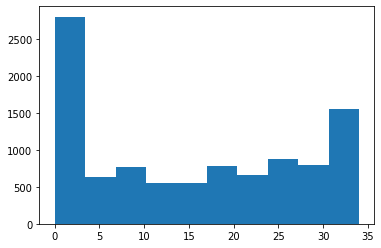

In [194]:
import matplotlib.pyplot as plt


plt.hist(pass_info)

## preprocessing info

In [197]:
df_preprocess = pickle.load(open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender','rb'))
df_preprocess_pass = pickle.load(open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender_pass','rb'))

print('전처리 성공한 caseid수: {} -> {}'.format(len(np.unique(df_preprocess['caseids'].tolist())), len(np.unique(df_preprocess_pass['caseids'].tolist()))))
print('전처리 성공한 opid수: {} -> {}'.format(len(np.unique(df_preprocess['opid'].tolist())), len(np.unique(df_preprocess_pass['opid'].tolist()))))          


caseids = np.unique(pickle.load(open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender_pass','rb'))['caseids'])
caseids_prev = np.concatenate([pickle.load(open('../DL_model/caseid_train_new','rb')), pickle.load(open('../DL_model/caseid_val_new','rb')), pickle.load(open('../DL_model/caseid_test_new','rb'))])

len(caseids_prev), len((caseids)), len(set(caseids_prev) - set(caseids)), len(set(caseids) - set(caseids_prev))

전처리 성공한 caseid수: 5323 -> 4741
전처리 성공한 opid수: 5170 -> 4670


(3942, 4741, 37, 836)

In [198]:
list(set(caseids_prev) - set(caseids))

['PACU1_5_190607_122953.csv',
 'PACU1_6_200225_140000.csv',
 'PACU1_3_190705_152519.csv',
 'PACU1_6_200131_165108.csv',
 'PACU1_8_190517_130825.csv',
 'PACU1_1_200601_131308.csv',
 'PACU1_4_190715_231003.csv',
 'PACU1_5_200303_124705.csv',
 'PACU1_9_200221_122214.csv',
 'PACU1_3_190410_004914.csv',
 'PACU1_5_190830_111107.csv',
 'PACU1_1_200803_213721.csv',
 'PACU1_3_200316_090636.csv',
 'PACU1_11_201008_153842.csv',
 'PACU1_9_190719_142338.csv',
 'PACU1_9_200603_101036.csv',
 'PACU1_8_200325_095202.csv',
 'PACU1_2_200527_215853.csv',
 'PACU1_3_200221_172941.csv',
 'PACU1_7_200312_115154.csv',
 'PACU1_5_190515_091941.csv',
 'PACU1_3_190723_135735.csv',
 'PACU1_2_200131_164827.csv',
 'PACU1_7_190709_180928.csv',
 'PACU1_4_200627_013103.csv',
 'PACU1_4_200319_193541.csv',
 'PACU1_5_200924_091559.csv',
 'PACU1_4_190828_165937.csv',
 'PACU1_8_190523_192327.csv',
 'PACU1_3_200129_152442.csv',
 'PACU1_1_200511_190645.csv',
 'PACU1_8_190904_162533.csv',
 'PACU1_9_200311_144517.csv',
 'PACU1_6

In [196]:
caseids = np.unique(pickle.load(open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender','rb'))['caseids'])
caseids_prev = np.concatenate([pickle.load(open('../DL_model/caseid_train_new','rb')), pickle.load(open('../DL_model/caseid_val_new','rb')), pickle.load(open('../DL_model/caseid_test_new','rb'))])

len(caseids_prev), len((caseids)), len(set(caseids_prev) - set(caseids)), len(set(caseids) - set(caseids_prev))

(3942, 5323, 7, 1388)

In [210]:
df_match = pd.read_csv('vital_to_pickle/ftn+_age_match_20201224-Copy1.csv',sep=',')


print(df_preprocess[df_preprocess['caseids']=='PACU1_5_190607_122953.csv']['57'].values)
df_match[df_match['path']=='PACU1_5_190607_122953.vital']

[(False, [0.0, 0.0, 0.0], [0.0, 0.35714285714285715])]


Unnamed: 0       oID       hid gender            birthdate  \
795         801  22930744  38594290      F  1943-03-04 00:00:00   

                NRS_time  Value  bed           opend_time       opid  \
795  2019-06-07 13:00:00    2.0    5  2019-06-07 12:14:00  190607057   

                            path                opday  age_year  
795  PACU1_5_190607_122953.vital  2019-06-07 00:00:00        76

# preprocess 6 (201228) ***
- preprocess 6(201228)에서 ecg 5분짜리 peak에 문제점이 생긴걸 발견해 각 segment 별로 피크 뽑아 다시 돌림

## 합치기

In [3]:
import os, pickle
import pandas as pd

common_path = '../DL_model/cache/preprocess6/df_preprocess_pacu_'
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
f_vital_list = os.listdir(vital_path)


process_dir = '../DL_model/cache/preprocess6/'
df_p1 = pickle.load(open(process_dir+'df_preprocess_pacu_0-100','rb'))

for file in os.listdir(process_dir):
    if file == 'df_preprocess_pacu_0-100':
        continue
        
    if 'df_preprocess' in file:
        df_p1 = pd.concat([df_p1, pickle.load(open(process_dir+file,'rb'))])

df_preprocess = df_p1


col_file_path = np.array(df_preprocess['file_path'].str.split(',').values.flatten())
df_preprocess.insert(0,'caseids',[col_file_path[i][2][:-5]+'csv' for i in range(len(col_file_path))])
df_preprocess.insert(1, 'NRS', [col_file_path[i][0] for i in range(len(col_file_path))])


# 중복된 행이 있는지 확인
print('초기 sample 수:', len(f_vital_list))
print('total df size:', len(df_preprocess))
print('after removing same files:', len(df_preprocess.drop_duplicates(['file_path'])))


df_preprocess.reset_index(drop=True, inplace=True)
print('dumping start')
pickle.dump(df_preprocess, open('../DL_model/cache/preprocess6/df_preprocess_pacu','wb'))
print('dumping success')

df_preprocess

초기 sample 수: 10075
total df size: 10075
after removing same files: 10075
dumping start
dumping success


caseids  NRS                              file_path  \
0       PACU1_1_190412_124642.csv  3.0   3.0,8544,PACU1_1_190412_124642.vital   
1       PACU1_1_200115_172636.csv  8.0   8.0,3040,PACU1_1_200115_172636.vital   
2       PACU1_6_200609_102625.csv  5.0   5.0,5738,PACU1_6_200609_102625.vital   
3       PACU1_6_201014_103929.csv  2.0   2.0,8005,PACU1_6_201014_103929.vital   
4       PACU1_6_190703_102403.csv  5.0   5.0,8734,PACU1_6_190703_102403.vital   
...                           ...  ...                                    ...   
10070  PACU1_11_200804_131019.csv  5.0  5.0,6855,PACU1_11_200804_131019.vital   
10071   PACU1_2_190828_121020.csv  4.0   4.0,1905,PACU1_2_190828_121020.vital   
10072   PACU1_2_200113_232003.csv  5.0   5.0,8448,PACU1_2_200113_232003.vital   
10073   PACU1_3_200918_194952.csv  4.0   4.0,7546,PACU1_3_200918_194952.vital   
10074   PACU1_1_200507_110101.csv  5.0   5.0,9628,PACU1_1_200507_110101.vital   

                                                       1  \
0      (False, [0.0, 0.0, 0.0], [0.0, 0.3076923076923...   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2      (True, [0.0, 0.0, 0.0], [0.09090909090909091, ...   
3      (False, [0.0, 0.0, 0.0], [0.2727272727272727, ...   
4      (True, [0.0, 0.0, 0.0], [0.09090909090909091, ...   
...                                                  ...   
10070             (True, [0.0, 0.0, 0.0], [0.0625, 0.0])   
10071  (False, [0.0, 0.0, 0.0], [0.6818181818181818, ...   
10072                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
10073                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
10074              (True, [0.0, 0.0, 0.0], [0.08, 0.04])   

                                                       2  \
0                  (False, [0.0, 0.0, 0.0], [0.0, 0.52])   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2                   (True, [0.0, 0.0, 0.0], [0.05, 0.0])   
3      (False, [0.0, 0.0, 0.0], [0.30434782608695654,...   
4      (True, [0.0, 0.0, 0.0], [0.09523809523809523, ...   
...                                                  ...   
10070                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
10071  (False, [0.0, 0.0, 0.0], [0.30434782608695654,...   
10072  (True, [0.0, 0.0, 0.0], [0.0, 0.04166666666666...   
10073  (True, [0.0, 0.0, 0.0], [0.047619047619047616,...   
10074               (True, [0.0, 0.0, 0.0], [0.0, 0.04])   

                                                       3  \
0                  (False, [0.0, 0.0, 0.0], [0.0, 0.56])   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2      (True, [0.0, 0.0, 0.0], [0.047619047619047616,...   
3      (False, [0.0, 0.0, 0.0], [0.16666666666666666,...   
4      (True, [0.0, 0.0, 0.0], [0.09523809523809523, ...   
...                                                  ...   
10070                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
10071                 (False, [0.0, 0.0, 0.0], [-2, -2])   
10072  (False, [0.0, 0.0, 0.0], [0.20833333333333334,...   
10073  (False, [0.0, 0.0, 0.0], [0.14285714285714285,...   
10074               (True, [0.0, 0.0, 0.0], [0.0, 0.04])   

                                                       4  \
0                  (False, [0.0, 0.0, 0.0], [0.0, 0.56])   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2      (True, [0.0, 0.0, 0.0], [0.05, 0.0909090909090...   
3      (False, [0.0, 0.0, 0.0], [0.08333333333333333,...   
4                    (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
...                                                  ...   
10070                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
10071                 (False, [0.0, 0.0, 0.0], [-2, -2])   
10072  (False, [0.0, 0.0, 0.0], [0.2608695652173913, ...   
10073              (False, [0.0, 0.0, 0.0], [0.1, 0.05])   
10074                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   

                                                       5  \
0                  (False, [0.0, 0.0, 0.0], [0.0, 0.32])   
1                     (False, [1.0, 1.0, 1.0], [-

## age 18세 미만 제거 + age, gender 정보 합치기

In [8]:
df_demograph = pickle.load(open('../DL_model/df_caseids+age+gender', 'rb'))
df_preprocess_pacu = pickle.load(open('../DL_model/cache/preprocess6/df_preprocess_pacu','rb'))


df_len = len(df_preprocess_pacu)
# age와 gender 열 추가
df_preprocess_pacu.loc[:,'age'] = np.nan
df_preprocess_pacu.loc[:,'gender'] = np.nan
df_preprocess_pacu.loc[:,'opid'] = 0


cnt = 0
for idx, row in df_preprocess_pacu.iterrows():     
    row_demo = df_demograph[df_demograph['caseids']==row['caseids']]
    if len(row_demo)==0:
        cnt += 1
        df_preprocess_pacu.drop([idx], inplace=True)
        continue


    df_preprocess_pacu.loc[idx, 'age'] = int(row_demo['age'].values[0])
    df_preprocess_pacu.loc[idx, 'gender'] = row_demo['gender'].values[0]
    df_preprocess_pacu.loc[idx, 'opid'] = row_demo['opid'].values[0]
    
    
print('caseids out of age: {} / {}'.format(cnt, df_len))    
df_preprocess_pacu.reset_index(drop=True, inplace=True)
print('dumping start')
pickle.dump(df_preprocess_pacu, open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender','wb'))
print('dumping success')   


df_preprocess_pacu

caseids out of age: 0 / 10075
dumping start
dumping success


caseids  NRS                              file_path  \
0       PACU1_1_190412_124642.csv  3.0   3.0,8544,PACU1_1_190412_124642.vital   
1       PACU1_1_200115_172636.csv  8.0   8.0,3040,PACU1_1_200115_172636.vital   
2       PACU1_6_200609_102625.csv  5.0   5.0,5738,PACU1_6_200609_102625.vital   
3       PACU1_6_201014_103929.csv  2.0   2.0,8005,PACU1_6_201014_103929.vital   
4       PACU1_6_190703_102403.csv  5.0   5.0,8734,PACU1_6_190703_102403.vital   
...                           ...  ...                                    ...   
10070  PACU1_11_200804_131019.csv  5.0  5.0,6855,PACU1_11_200804_131019.vital   
10071   PACU1_2_190828_121020.csv  4.0   4.0,1905,PACU1_2_190828_121020.vital   
10072   PACU1_2_200113_232003.csv  5.0   5.0,8448,PACU1_2_200113_232003.vital   
10073   PACU1_3_200918_194952.csv  4.0   4.0,7546,PACU1_3_200918_194952.vital   
10074   PACU1_1_200507_110101.csv  5.0   5.0,9628,PACU1_1_200507_110101.vital   

                                                       1  \
0      (False, [0.0, 0.0, 0.0], [0.0, 0.3076923076923...   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2      (True, [0.0, 0.0, 0.0], [0.09090909090909091, ...   
3      (False, [0.0, 0.0, 0.0], [0.2727272727272727, ...   
4      (True, [0.0, 0.0, 0.0], [0.09090909090909091, ...   
...                                                  ...   
10070             (True, [0.0, 0.0, 0.0], [0.0625, 0.0])   
10071  (False, [0.0, 0.0, 0.0], [0.6818181818181818, ...   
10072                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
10073                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
10074              (True, [0.0, 0.0, 0.0], [0.08, 0.04])   

                                                       2  \
0                  (False, [0.0, 0.0, 0.0], [0.0, 0.52])   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2                   (True, [0.0, 0.0, 0.0], [0.05, 0.0])   
3      (False, [0.0, 0.0, 0.0], [0.30434782608695654,...   
4      (True, [0.0, 0.0, 0.0], [0.09523809523809523, ...   
...                                                  ...   
10070                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
10071  (False, [0.0, 0.0, 0.0], [0.30434782608695654,...   
10072  (True, [0.0, 0.0, 0.0], [0.0, 0.04166666666666...   
10073  (True, [0.0, 0.0, 0.0], [0.047619047619047616,...   
10074               (True, [0.0, 0.0, 0.0], [0.0, 0.04])   

                                                       3  \
0                  (False, [0.0, 0.0, 0.0], [0.0, 0.56])   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2      (True, [0.0, 0.0, 0.0], [0.047619047619047616,...   
3      (False, [0.0, 0.0, 0.0], [0.16666666666666666,...   
4      (True, [0.0, 0.0, 0.0], [0.09523809523809523, ...   
...                                                  ...   
10070                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
10071                 (False, [0.0, 0.0, 0.0], [-2, -2])   
10072  (False, [0.0, 0.0, 0.0], [0.20833333333333334,...   
10073  (False, [0.0, 0.0, 0.0], [0.14285714285714285,...   
10074               (True, [0.0, 0.0, 0.0], [0.0, 0.04])   

                                                       4  \
0                  (False, [0.0, 0.0, 0.0], [0.0, 0.56])   
1                     (False, [1.0, 1.0, 1.0], [-1, -1])   
2      (True, [0.0, 0.0, 0.0], [0.05, 0.0909090909090...   
3      (False, [0.0, 0.0, 0.0], [0.08333333333333333,...   
4                    (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
...                                                  ...   
10070                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
10071                 (False, [0.0, 0.0, 0.0], [-2, -2])   
10072  (False, [0.0, 0.0, 0.0], [0.2608695652173913, ...   
10073              (False, [0.0, 0.0, 0.0], [0.1, 0.05])   
10074                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   

                                                       5  \
0                  (False, [0.0, 0.0, 0.0], [0.0, 0.32])   
1                     (False, [1.0, 1.0, 1.0], [-

In [21]:
len(np.unique(df_preprocess_pacu['opid'].tolist()))

5204

## 환자 caseid, nrs 건수

In [9]:
import pandas as pd
import pickle, os

# 
df_preprocess = pickle.load(open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender','rb'))


# 회복실 입퇴실시간이 긴 경우, SUPREME의 오류로 NRS 측정시간이 다른 환자 케이스를 덮어버린 경우 (중복 케이스)
df_duplicate_list = pickle.load(open('../DL_model/duplicates_list', 'rb'))


print('매칭 중복 제거 전 df행 크기:', len(df_preprocess))
print('매칭 중복 제거 전 caseid수:', len(np.unique(df_preprocess['caseids'].tolist())))

duplicate_list = np.array(df_duplicate_list['caseid'].tolist())

for duplicate_file in duplicate_list:
    index_list = df_preprocess[df_preprocess['caseids']==duplicate_file].index
    df_preprocess.drop(index_list, inplace=True)
    
#df_preprocess.reset_index(drop=True, inplace=True)
#pickle.dump(df_preprocess, open('../DL_model/cache/preprocess5/df_preprocess_pacu_agender','wb'))


print('\n매칭 중복 제거 후 df행 크기:', len(df_preprocess))
print('매칭 중복 제거 후 caseid수:', len(np.unique(df_preprocess['caseids'].tolist())))
print('매칭 중복 제거 후 opid수:', len(np.unique(df_preprocess['opid'].tolist())))


df_preprocess.reset_index(drop=True, inplace=True)
pickle.dump(df_preprocess, open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender','wb'))

매칭 중복 제거 전 df행 크기: 10075
매칭 중복 제거 전 caseid수: 5364

매칭 중복 제거 후 df행 크기: 9952
매칭 중복 제거 후 caseid수: 5323


In [22]:
df_preprocess = pickle.load(open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender','rb'))
print('매칭 중복 제거 후 opid수:', len(np.unique(df_preprocess['opid'].tolist())))

매칭 중복 제거 후 opid수: 5170


### NRS_time 삽입

In [46]:
df_match = pd.read_csv('vital_to_pickle/ftn+_age_match_20201224.csv')
df_preprocess_pacu = pickle.load(open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender','rb'))
#df_preprocess_pacu.loc[:,'NRS_time'] = 0


for idx, row in df_preprocess_pacu.iterrows(): 
    f_path = row['file_path'].split(',')
    
    row_match = df_match[df_match['path']==f_path[2]]
    df_preprocess_pacu.loc[idx,'NRS_time'] = row_match[row_match['Unnamed: 0']==int(f_path[1])]['NRS_time'].values

    
pickle.dump(df_preprocess_pacu, open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender','wb'))
df_preprocess_pacu

caseids  NRS                              file_path  \
0      PACU1_1_190412_124642.csv  3.0   3.0,8544,PACU1_1_190412_124642.vital   
1      PACU1_1_200115_172636.csv  8.0   8.0,3040,PACU1_1_200115_172636.vital   
2      PACU1_6_200609_102625.csv  5.0   5.0,5738,PACU1_6_200609_102625.vital   
3      PACU1_6_201014_103929.csv  2.0   2.0,8005,PACU1_6_201014_103929.vital   
4      PACU1_6_190703_102403.csv  5.0   5.0,8734,PACU1_6_190703_102403.vital   
...                          ...  ...                                    ...   
9947  PACU1_11_200804_131019.csv  5.0  5.0,6855,PACU1_11_200804_131019.vital   
9948   PACU1_2_190828_121020.csv  4.0   4.0,1905,PACU1_2_190828_121020.vital   
9949   PACU1_2_200113_232003.csv  5.0   5.0,8448,PACU1_2_200113_232003.vital   
9950   PACU1_3_200918_194952.csv  4.0   4.0,7546,PACU1_3_200918_194952.vital   
9951   PACU1_1_200507_110101.csv  5.0   5.0,9628,PACU1_1_200507_110101.vital   

                                                      1  \
0     (False, [0.0, 0.0, 0.0], [0.0, 0.3076923076923...   
1                    (False, [1.0, 1.0, 1.0], [-1, -1])   
2     (True, [0.0, 0.0, 0.0], [0.09090909090909091, ...   
3     (False, [0.0, 0.0, 0.0], [0.2727272727272727, ...   
4     (True, [0.0, 0.0, 0.0], [0.09090909090909091, ...   
...                                                 ...   
9947             (True, [0.0, 0.0, 0.0], [0.0625, 0.0])   
9948  (False, [0.0, 0.0, 0.0], [0.6818181818181818, ...   
9949                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
9950                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
9951              (True, [0.0, 0.0, 0.0], [0.08, 0.04])   

                                                      2  \
0                 (False, [0.0, 0.0, 0.0], [0.0, 0.52])   
1                    (False, [1.0, 1.0, 1.0], [-1, -1])   
2                  (True, [0.0, 0.0, 0.0], [0.05, 0.0])   
3     (False, [0.0, 0.0, 0.0], [0.30434782608695654,...   
4     (True, [0.0, 0.0, 0.0], [0.09523809523809523, ...   
...                                                 ...   
9947                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
9948  (False, [0.0, 0.0, 0.0], [0.30434782608695654,...   
9949  (True, [0.0, 0.0, 0.0], [0.0, 0.04166666666666...   
9950  (True, [0.0, 0.0, 0.0], [0.047619047619047616,...   
9951               (True, [0.0, 0.0, 0.0], [0.0, 0.04])   

                                                      3  \
0                 (False, [0.0, 0.0, 0.0], [0.0, 0.56])   
1                    (False, [1.0, 1.0, 1.0], [-1, -1])   
2     (True, [0.0, 0.0, 0.0], [0.047619047619047616,...   
3     (False, [0.0, 0.0, 0.0], [0.16666666666666666,...   
4     (True, [0.0, 0.0, 0.0], [0.09523809523809523, ...   
...                                                 ...   
9947                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
9948                 (False, [0.0, 0.0, 0.0], [-2, -2])   
9949  (False, [0.0, 0.0, 0.0], [0.20833333333333334,...   
9950  (False, [0.0, 0.0, 0.0], [0.14285714285714285,...   
9951               (True, [0.0, 0.0, 0.0], [0.0, 0.04])   

                                                      4  \
0                 (False, [0.0, 0.0, 0.0], [0.0, 0.56])   
1                    (False, [1.0, 1.0, 1.0], [-1, -1])   
2     (True, [0.0, 0.0, 0.0], [0.05, 0.0909090909090...   
3     (False, [0.0, 0.0, 0.0], [0.08333333333333333,...   
4                   (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
...                                                 ...   
9947                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
9948                 (False, [0.0, 0.0, 0.0], [-2, -2])   
9949  (False, [0.0, 0.0, 0.0], [0.2608695652173913, ...   
9950              (False, [0.0, 0.0, 0.0], [0.1, 0.05])   
9951                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   

                                                      5  \
0                 (False, [0.0, 0.0, 0.0], [0.0, 0.32])   
1                    (False, [1.0, 1.0, 1.0], [-1, -1])   
2                   (True, [0.0, 0.0, 0.0], [0.0, 0

## 전처리 결과 input이 없는 case 제거 (NRS 측정 3분전 고려) - df_preprocess_pass

In [47]:
file_name_test, file_name_train = [], []
case_name_test = []

false_row_list_pacu_3_2 = []
pass_info = []

df_preprocess = pickle.load(open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender','rb'))

# pacu의 vital_path
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min/'
# df의 모든 행을 돌며 train set, test set 구성
for row in range(len(df_preprocess)):
    print('loading data {}/{} ...'.format(row+1, len(df_preprocess)), end='')

    # vital data loading
    #df_vital = pickle.load(open(vital_path+df_preprocess.loc[row,'file_path'], 'rb')).reset_index()
    
    switch = 0
    # 한 NRS에 대해 51개의 input 확인
    for i in range(23,57):
        # input이 전처리 통과한 경우
        if df_preprocess.loc[row, str(i+1)][0]:
            switch += 1

                
    if switch == 0:
        false_row_list_pacu_3_2.append(df_preprocess.loc[row,'file_path'])
        df_preprocess.drop(row, inplace=True)
    pass_info.append(switch)
        
    print('completed')
    

df_preprocess.reset_index(drop=True, inplace=True)
pickle.dump(df_preprocess, open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender_pass','wb'))

loading data 1/9952 ...completed
loading data 2/9952 ...completed
loading data 3/9951 ...completed
loading data 4/9950 ...completed
loading data 5/9950 ...completed
loading data 6/9950 ...completed
loading data 7/9950 ...completed
loading data 8/9950 ...completed
loading data 9/9950 ...completed
loading data 10/9950 ...completed
loading data 11/9949 ...completed
loading data 12/9949 ...completed
loading data 13/9949 ...completed
loading data 14/9949 ...completed
loading data 15/9949 ...completed
loading data 16/9949 ...completed
loading data 17/9948 ...completed
loading data 18/9948 ...completed
loading data 19/9948 ...completed
loading data 20/9948 ...completed
loading data 21/9948 ...completed
loading data 22/9947 ...completed
loading data 23/9947 ...completed
loading data 24/9947 ...completed
loading data 25/9947 ...completed
loading data 26/9947 ...completed
loading data 27/9947 ...completed
loading data 28/9947 ...completed
loading data 29/9947 ...completed
loading data 30/9947 ..

loading data 275/9899 ...completed
loading data 276/9899 ...completed
loading data 277/9899 ...completed
loading data 278/9899 ...completed
loading data 279/9899 ...completed
loading data 280/9898 ...completed
loading data 281/9898 ...completed
loading data 282/9897 ...completed
loading data 283/9897 ...completed
loading data 284/9897 ...completed
loading data 285/9897 ...completed
loading data 286/9897 ...completed
loading data 287/9897 ...completed
loading data 288/9897 ...completed
loading data 289/9897 ...completed
loading data 290/9896 ...completed
loading data 291/9896 ...completed
loading data 292/9896 ...completed
loading data 293/9896 ...completed
loading data 294/9896 ...completed
loading data 295/9896 ...completed
loading data 296/9896 ...completed
loading data 297/9896 ...completed
loading data 298/9895 ...completed
loading data 299/9895 ...completed
loading data 300/9894 ...completed
loading data 301/9894 ...completed
loading data 302/9894 ...completed
loading data 303/989

loading data 522/9858 ...completed
loading data 523/9857 ...completed
loading data 524/9857 ...completed
loading data 525/9857 ...completed
loading data 526/9857 ...completed
loading data 527/9856 ...completed
loading data 528/9856 ...completed
loading data 529/9856 ...completed
loading data 530/9856 ...completed
loading data 531/9856 ...completed
loading data 532/9856 ...completed
loading data 533/9856 ...completed
loading data 534/9856 ...completed
loading data 535/9856 ...completed
loading data 536/9856 ...completed
loading data 537/9856 ...completed
loading data 538/9856 ...completed
loading data 539/9855 ...completed
loading data 540/9855 ...completed
loading data 541/9854 ...completed
loading data 542/9854 ...completed
loading data 543/9853 ...completed
loading data 544/9853 ...completed
loading data 545/9853 ...completed
loading data 546/9853 ...completed
loading data 547/9853 ...completed
loading data 548/9852 ...completed
loading data 549/9852 ...completed
loading data 550/985

loading data 781/9804 ...completed
loading data 782/9803 ...completed
loading data 783/9802 ...completed
loading data 784/9801 ...completed
loading data 785/9801 ...completed
loading data 786/9801 ...completed
loading data 787/9801 ...completed
loading data 788/9801 ...completed
loading data 789/9801 ...completed
loading data 790/9801 ...completed
loading data 791/9801 ...completed
loading data 792/9801 ...completed
loading data 793/9801 ...completed
loading data 794/9801 ...completed
loading data 795/9801 ...completed
loading data 796/9801 ...completed
loading data 797/9801 ...completed
loading data 798/9801 ...completed
loading data 799/9801 ...completed
loading data 800/9801 ...completed
loading data 801/9800 ...completed
loading data 802/9799 ...completed
loading data 803/9799 ...completed
loading data 804/9798 ...completed
loading data 805/9798 ...completed
loading data 806/9798 ...completed
loading data 807/9798 ...completed
loading data 808/9798 ...completed
loading data 809/979

loading data 1015/9762 ...completed
loading data 1016/9761 ...completed
loading data 1017/9761 ...completed
loading data 1018/9760 ...completed
loading data 1019/9760 ...completed
loading data 1020/9760 ...completed
loading data 1021/9760 ...completed
loading data 1022/9760 ...completed
loading data 1023/9760 ...completed
loading data 1024/9760 ...completed
loading data 1025/9760 ...completed
loading data 1026/9760 ...completed
loading data 1027/9760 ...completed
loading data 1028/9760 ...completed
loading data 1029/9760 ...completed
loading data 1030/9759 ...completed
loading data 1031/9759 ...completed
loading data 1032/9759 ...completed
loading data 1033/9759 ...completed
loading data 1034/9759 ...completed
loading data 1035/9758 ...completed
loading data 1036/9757 ...completed
loading data 1037/9757 ...completed
loading data 1038/9757 ...completed
loading data 1039/9757 ...completed
loading data 1040/9756 ...completed
loading data 1041/9755 ...completed
loading data 1042/9755 ...co

loading data 1310/9708 ...completed
loading data 1311/9707 ...completed
loading data 1312/9706 ...completed
loading data 1313/9706 ...completed
loading data 1314/9706 ...completed
loading data 1315/9706 ...completed
loading data 1316/9706 ...completed
loading data 1317/9706 ...completed
loading data 1318/9706 ...completed
loading data 1319/9706 ...completed
loading data 1320/9706 ...completed
loading data 1321/9706 ...completed
loading data 1322/9706 ...completed
loading data 1323/9706 ...completed
loading data 1324/9705 ...completed
loading data 1325/9705 ...completed
loading data 1326/9705 ...completed
loading data 1327/9705 ...completed
loading data 1328/9705 ...completed
loading data 1329/9705 ...completed
loading data 1330/9704 ...completed
loading data 1331/9704 ...completed
loading data 1332/9704 ...completed
loading data 1333/9704 ...completed
loading data 1334/9704 ...completed
loading data 1335/9704 ...completed
loading data 1336/9704 ...completed
loading data 1337/9704 ...co

loading data 1611/9654 ...completed
loading data 1612/9654 ...completed
loading data 1613/9654 ...completed
loading data 1614/9654 ...completed
loading data 1615/9654 ...completed
loading data 1616/9654 ...completed
loading data 1617/9654 ...completed
loading data 1618/9653 ...completed
loading data 1619/9652 ...completed
loading data 1620/9652 ...completed
loading data 1621/9651 ...completed
loading data 1622/9650 ...completed
loading data 1623/9649 ...completed
loading data 1624/9649 ...completed
loading data 1625/9648 ...completed
loading data 1626/9648 ...completed
loading data 1627/9648 ...completed
loading data 1628/9647 ...completed
loading data 1629/9647 ...completed
loading data 1630/9647 ...completed
loading data 1631/9647 ...completed
loading data 1632/9647 ...completed
loading data 1633/9647 ...completed
loading data 1634/9647 ...completed
loading data 1635/9647 ...completed
loading data 1636/9647 ...completed
loading data 1637/9647 ...completed
loading data 1638/9647 ...co

loading data 1864/9613 ...completed
loading data 1865/9612 ...completed
loading data 1866/9612 ...completed
loading data 1867/9612 ...completed
loading data 1868/9612 ...completed
loading data 1869/9611 ...completed
loading data 1870/9611 ...completed
loading data 1871/9610 ...completed
loading data 1872/9610 ...completed
loading data 1873/9610 ...completed
loading data 1874/9610 ...completed
loading data 1875/9609 ...completed
loading data 1876/9609 ...completed
loading data 1877/9609 ...completed
loading data 1878/9609 ...completed
loading data 1879/9609 ...completed
loading data 1880/9609 ...completed
loading data 1881/9609 ...completed
loading data 1882/9609 ...completed
loading data 1883/9609 ...completed
loading data 1884/9609 ...completed
loading data 1885/9609 ...completed
loading data 1886/9608 ...completed
loading data 1887/9608 ...completed
loading data 1888/9608 ...completed
loading data 1889/9608 ...completed
loading data 1890/9607 ...completed
loading data 1891/9607 ...co

loading data 2098/9570 ...completed
loading data 2099/9569 ...completed
loading data 2100/9568 ...completed
loading data 2101/9568 ...completed
loading data 2102/9568 ...completed
loading data 2103/9568 ...completed
loading data 2104/9568 ...completed
loading data 2105/9568 ...completed
loading data 2106/9568 ...completed
loading data 2107/9568 ...completed
loading data 2108/9568 ...completed
loading data 2109/9567 ...completed
loading data 2110/9567 ...completed
loading data 2111/9567 ...completed
loading data 2112/9567 ...completed
loading data 2113/9567 ...completed
loading data 2114/9567 ...completed
loading data 2115/9567 ...completed
loading data 2116/9567 ...completed
loading data 2117/9567 ...completed
loading data 2118/9567 ...completed
loading data 2119/9567 ...completed
loading data 2120/9567 ...completed
loading data 2121/9566 ...completed
loading data 2122/9566 ...completed
loading data 2123/9566 ...completed
loading data 2124/9566 ...completed
loading data 2125/9566 ...co

loading data 2355/9527 ...completed
loading data 2356/9526 ...completed
loading data 2357/9525 ...completed
loading data 2358/9525 ...completed
loading data 2359/9525 ...completed
loading data 2360/9525 ...completed
loading data 2361/9525 ...completed
loading data 2362/9525 ...completed
loading data 2363/9525 ...completed
loading data 2364/9525 ...completed
loading data 2365/9525 ...completed
loading data 2366/9525 ...completed
loading data 2367/9524 ...completed
loading data 2368/9523 ...completed
loading data 2369/9523 ...completed
loading data 2370/9523 ...completed
loading data 2371/9523 ...completed
loading data 2372/9523 ...completed
loading data 2373/9522 ...completed
loading data 2374/9522 ...completed
loading data 2375/9522 ...completed
loading data 2376/9522 ...completed
loading data 2377/9522 ...completed
loading data 2378/9522 ...completed
loading data 2379/9522 ...completed
loading data 2380/9522 ...completed
loading data 2381/9522 ...completed
loading data 2382/9522 ...co

loading data 2612/9483 ...completed
loading data 2613/9483 ...completed
loading data 2614/9482 ...completed
loading data 2615/9482 ...completed
loading data 2616/9482 ...completed
loading data 2617/9482 ...completed
loading data 2618/9482 ...completed
loading data 2619/9481 ...completed
loading data 2620/9481 ...completed
loading data 2621/9481 ...completed
loading data 2622/9481 ...completed
loading data 2623/9481 ...completed
loading data 2624/9481 ...completed
loading data 2625/9480 ...completed
loading data 2626/9480 ...completed
loading data 2627/9480 ...completed
loading data 2628/9480 ...completed
loading data 2629/9479 ...completed
loading data 2630/9478 ...completed
loading data 2631/9478 ...completed
loading data 2632/9478 ...completed
loading data 2633/9478 ...completed
loading data 2634/9478 ...completed
loading data 2635/9478 ...completed
loading data 2636/9478 ...completed
loading data 2637/9478 ...completed
loading data 2638/9478 ...completed
loading data 2639/9478 ...co

loading data 2844/9440 ...completed
loading data 2845/9439 ...completed
loading data 2846/9439 ...completed
loading data 2847/9438 ...completed
loading data 2848/9438 ...completed
loading data 2849/9438 ...completed
loading data 2850/9438 ...completed
loading data 2851/9438 ...completed
loading data 2852/9438 ...completed
loading data 2853/9438 ...completed
loading data 2854/9437 ...completed
loading data 2855/9437 ...completed
loading data 2856/9437 ...completed
loading data 2857/9437 ...completed
loading data 2858/9437 ...completed
loading data 2859/9437 ...completed
loading data 2860/9437 ...completed
loading data 2861/9437 ...completed
loading data 2862/9437 ...completed
loading data 2863/9437 ...completed
loading data 2864/9437 ...completed
loading data 2865/9437 ...completed
loading data 2866/9436 ...completed
loading data 2867/9436 ...completed
loading data 2868/9436 ...completed
loading data 2869/9436 ...completed
loading data 2870/9436 ...completed
loading data 2871/9436 ...co

loading data 3084/9396 ...completed
loading data 3085/9396 ...completed
loading data 3086/9395 ...completed
loading data 3087/9395 ...completed
loading data 3088/9395 ...completed
loading data 3089/9395 ...completed
loading data 3090/9395 ...completed
loading data 3091/9395 ...completed
loading data 3092/9395 ...completed
loading data 3093/9394 ...completed
loading data 3094/9393 ...completed
loading data 3095/9393 ...completed
loading data 3096/9393 ...completed
loading data 3097/9392 ...completed
loading data 3098/9392 ...completed
loading data 3099/9392 ...completed
loading data 3100/9392 ...completed
loading data 3101/9392 ...completed
loading data 3102/9392 ...completed
loading data 3103/9392 ...completed
loading data 3104/9392 ...completed
loading data 3105/9392 ...completed
loading data 3106/9392 ...completed
loading data 3107/9391 ...completed
loading data 3108/9390 ...completed
loading data 3109/9390 ...completed
loading data 3110/9390 ...completed
loading data 3111/9390 ...co

loading data 3311/9350 ...completed
loading data 3312/9349 ...completed
loading data 3313/9349 ...completed
loading data 3314/9349 ...completed
loading data 3315/9349 ...completed
loading data 3316/9349 ...completed
loading data 3317/9349 ...completed
loading data 3318/9349 ...completed
loading data 3319/9349 ...completed
loading data 3320/9349 ...completed
loading data 3321/9349 ...completed
loading data 3322/9349 ...completed
loading data 3323/9348 ...completed
loading data 3324/9348 ...completed
loading data 3325/9348 ...completed
loading data 3326/9348 ...completed
loading data 3327/9348 ...completed
loading data 3328/9348 ...completed
loading data 3329/9348 ...completed
loading data 3330/9347 ...completed
loading data 3331/9347 ...completed
loading data 3332/9347 ...completed
loading data 3333/9347 ...completed
loading data 3334/9347 ...completed
loading data 3335/9347 ...completed
loading data 3336/9347 ...completed
loading data 3337/9347 ...completed
loading data 3338/9347 ...co

loading data 3545/9304 ...completed
loading data 3546/9304 ...completed
loading data 3547/9303 ...completed
loading data 3548/9303 ...completed
loading data 3549/9303 ...completed
loading data 3550/9303 ...completed
loading data 3551/9303 ...completed
loading data 3552/9303 ...completed
loading data 3553/9303 ...completed
loading data 3554/9303 ...completed
loading data 3555/9302 ...completed
loading data 3556/9302 ...completed
loading data 3557/9302 ...completed
loading data 3558/9301 ...completed
loading data 3559/9301 ...completed
loading data 3560/9300 ...completed
loading data 3561/9300 ...completed
loading data 3562/9300 ...completed
loading data 3563/9300 ...completed
loading data 3564/9300 ...completed
loading data 3565/9300 ...completed
loading data 3566/9300 ...completed
loading data 3567/9300 ...completed
loading data 3568/9300 ...completed
loading data 3569/9300 ...completed
loading data 3570/9300 ...completed
loading data 3571/9300 ...completed
loading data 3572/9299 ...co

loading data 3790/9261 ...completed
loading data 3791/9260 ...completed
loading data 3792/9260 ...completed
loading data 3793/9259 ...completed
loading data 3794/9259 ...completed
loading data 3795/9259 ...completed
loading data 3796/9259 ...completed
loading data 3797/9259 ...completed
loading data 3798/9259 ...completed
loading data 3799/9259 ...completed
loading data 3800/9259 ...completed
loading data 3801/9259 ...completed
loading data 3802/9259 ...completed
loading data 3803/9259 ...completed
loading data 3804/9259 ...completed
loading data 3805/9259 ...completed
loading data 3806/9259 ...completed
loading data 3807/9259 ...completed
loading data 3808/9259 ...completed
loading data 3809/9259 ...completed
loading data 3810/9259 ...completed
loading data 3811/9259 ...completed
loading data 3812/9259 ...completed
loading data 3813/9259 ...completed
loading data 3814/9259 ...completed
loading data 3815/9259 ...completed
loading data 3816/9259 ...completed
loading data 3817/9259 ...co

loading data 4043/9219 ...completed
loading data 4044/9218 ...completed
loading data 4045/9218 ...completed
loading data 4046/9218 ...completed
loading data 4047/9218 ...completed
loading data 4048/9218 ...completed
loading data 4049/9218 ...completed
loading data 4050/9218 ...completed
loading data 4051/9218 ...completed
loading data 4052/9218 ...completed
loading data 4053/9217 ...completed
loading data 4054/9217 ...completed
loading data 4055/9217 ...completed
loading data 4056/9217 ...completed
loading data 4057/9216 ...completed
loading data 4058/9216 ...completed
loading data 4059/9216 ...completed
loading data 4060/9215 ...completed
loading data 4061/9215 ...completed
loading data 4062/9215 ...completed
loading data 4063/9215 ...completed
loading data 4064/9214 ...completed
loading data 4065/9214 ...completed
loading data 4066/9214 ...completed
loading data 4067/9214 ...completed
loading data 4068/9214 ...completed
loading data 4069/9214 ...completed
loading data 4070/9214 ...co

loading data 4271/9173 ...completed
loading data 4272/9172 ...completed
loading data 4273/9172 ...completed
loading data 4274/9172 ...completed
loading data 4275/9171 ...completed
loading data 4276/9171 ...completed
loading data 4277/9171 ...completed
loading data 4278/9171 ...completed
loading data 4279/9171 ...completed
loading data 4280/9171 ...completed
loading data 4281/9171 ...completed
loading data 4282/9171 ...completed
loading data 4283/9171 ...completed
loading data 4284/9171 ...completed
loading data 4285/9171 ...completed
loading data 4286/9171 ...completed
loading data 4287/9171 ...completed
loading data 4288/9171 ...completed
loading data 4289/9171 ...completed
loading data 4290/9170 ...completed
loading data 4291/9170 ...completed
loading data 4292/9170 ...completed
loading data 4293/9170 ...completed
loading data 4294/9170 ...completed
loading data 4295/9170 ...completed
loading data 4296/9170 ...completed
loading data 4297/9169 ...completed
loading data 4298/9168 ...co

loading data 4501/9127 ...completed
loading data 4502/9126 ...completed
loading data 4503/9125 ...completed
loading data 4504/9125 ...completed
loading data 4505/9125 ...completed
loading data 4506/9125 ...completed
loading data 4507/9125 ...completed
loading data 4508/9125 ...completed
loading data 4509/9124 ...completed
loading data 4510/9124 ...completed
loading data 4511/9124 ...completed
loading data 4512/9124 ...completed
loading data 4513/9124 ...completed
loading data 4514/9123 ...completed
loading data 4515/9122 ...completed
loading data 4516/9122 ...completed
loading data 4517/9122 ...completed
loading data 4518/9122 ...completed
loading data 4519/9122 ...completed
loading data 4520/9122 ...completed
loading data 4521/9122 ...completed
loading data 4522/9122 ...completed
loading data 4523/9122 ...completed
loading data 4524/9121 ...completed
loading data 4525/9120 ...completed
loading data 4526/9119 ...completed
loading data 4527/9118 ...completed
loading data 4528/9117 ...co

loading data 4759/9067 ...completed
loading data 4760/9066 ...completed
loading data 4761/9066 ...completed
loading data 4762/9066 ...completed
loading data 4763/9066 ...completed
loading data 4764/9066 ...completed
loading data 4765/9066 ...completed
loading data 4766/9066 ...completed
loading data 4767/9066 ...completed
loading data 4768/9066 ...completed
loading data 4769/9066 ...completed
loading data 4770/9066 ...completed
loading data 4771/9066 ...completed
loading data 4772/9066 ...completed
loading data 4773/9066 ...completed
loading data 4774/9066 ...completed
loading data 4775/9065 ...completed
loading data 4776/9065 ...completed
loading data 4777/9065 ...completed
loading data 4778/9065 ...completed
loading data 4779/9065 ...completed
loading data 4780/9065 ...completed
loading data 4781/9064 ...completed
loading data 4782/9064 ...completed
loading data 4783/9064 ...completed
loading data 4784/9064 ...completed
loading data 4785/9064 ...completed
loading data 4786/9064 ...co

loading data 5043/9008 ...completed
loading data 5044/9008 ...completed
loading data 5045/9008 ...completed
loading data 5046/9008 ...completed
loading data 5047/9007 ...completed
loading data 5048/9007 ...completed
loading data 5049/9007 ...completed
loading data 5050/9007 ...completed
loading data 5051/9007 ...completed
loading data 5052/9007 ...completed
loading data 5053/9007 ...completed
loading data 5054/9007 ...completed
loading data 5055/9007 ...completed
loading data 5056/9007 ...completed
loading data 5057/9006 ...completed
loading data 5058/9006 ...completed
loading data 5059/9006 ...completed
loading data 5060/9005 ...completed
loading data 5061/9005 ...completed
loading data 5062/9004 ...completed
loading data 5063/9004 ...completed
loading data 5064/9004 ...completed
loading data 5065/9004 ...completed
loading data 5066/9004 ...completed
loading data 5067/9004 ...completed
loading data 5068/9004 ...completed
loading data 5069/9004 ...completed
loading data 5070/9004 ...co

loading data 5286/8964 ...completed
loading data 5287/8963 ...completed
loading data 5288/8963 ...completed
loading data 5289/8963 ...completed
loading data 5290/8963 ...completed
loading data 5291/8963 ...completed
loading data 5292/8962 ...completed
loading data 5293/8962 ...completed
loading data 5294/8962 ...completed
loading data 5295/8962 ...completed
loading data 5296/8961 ...completed
loading data 5297/8961 ...completed
loading data 5298/8961 ...completed
loading data 5299/8961 ...completed
loading data 5300/8961 ...completed
loading data 5301/8960 ...completed
loading data 5302/8960 ...completed
loading data 5303/8959 ...completed
loading data 5304/8959 ...completed
loading data 5305/8959 ...completed
loading data 5306/8959 ...completed
loading data 5307/8959 ...completed
loading data 5308/8959 ...completed
loading data 5309/8958 ...completed
loading data 5310/8958 ...completed
loading data 5311/8958 ...completed
loading data 5312/8958 ...completed
loading data 5313/8958 ...co

loading data 5522/8921 ...completed
loading data 5523/8921 ...completed
loading data 5524/8920 ...completed
loading data 5525/8920 ...completed
loading data 5526/8919 ...completed
loading data 5527/8919 ...completed
loading data 5528/8919 ...completed
loading data 5529/8919 ...completed
loading data 5530/8919 ...completed
loading data 5531/8918 ...completed
loading data 5532/8918 ...completed
loading data 5533/8918 ...completed
loading data 5534/8918 ...completed
loading data 5535/8918 ...completed
loading data 5536/8918 ...completed
loading data 5537/8918 ...completed
loading data 5538/8918 ...completed
loading data 5539/8918 ...completed
loading data 5540/8917 ...completed
loading data 5541/8917 ...completed
loading data 5542/8917 ...completed
loading data 5543/8917 ...completed
loading data 5544/8917 ...completed
loading data 5545/8917 ...completed
loading data 5546/8917 ...completed
loading data 5547/8916 ...completed
loading data 5548/8916 ...completed
loading data 5549/8916 ...co

loading data 5770/8879 ...completed
loading data 5771/8878 ...completed
loading data 5772/8878 ...completed
loading data 5773/8878 ...completed
loading data 5774/8877 ...completed
loading data 5775/8877 ...completed
loading data 5776/8877 ...completed
loading data 5777/8876 ...completed
loading data 5778/8876 ...completed
loading data 5779/8875 ...completed
loading data 5780/8875 ...completed
loading data 5781/8875 ...completed
loading data 5782/8875 ...completed
loading data 5783/8875 ...completed
loading data 5784/8875 ...completed
loading data 5785/8875 ...completed
loading data 5786/8874 ...completed
loading data 5787/8874 ...completed
loading data 5788/8874 ...completed
loading data 5789/8873 ...completed
loading data 5790/8873 ...completed
loading data 5791/8873 ...completed
loading data 5792/8873 ...completed
loading data 5793/8873 ...completed
loading data 5794/8873 ...completed
loading data 5795/8872 ...completed
loading data 5796/8872 ...completed
loading data 5797/8872 ...co

loading data 6047/8822 ...completed
loading data 6048/8821 ...completed
loading data 6049/8821 ...completed
loading data 6050/8821 ...completed
loading data 6051/8821 ...completed
loading data 6052/8821 ...completed
loading data 6053/8821 ...completed
loading data 6054/8821 ...completed
loading data 6055/8820 ...completed
loading data 6056/8820 ...completed
loading data 6057/8820 ...completed
loading data 6058/8819 ...completed
loading data 6059/8819 ...completed
loading data 6060/8819 ...completed
loading data 6061/8819 ...completed
loading data 6062/8819 ...completed
loading data 6063/8819 ...completed
loading data 6064/8818 ...completed
loading data 6065/8818 ...completed
loading data 6066/8817 ...completed
loading data 6067/8817 ...completed
loading data 6068/8816 ...completed
loading data 6069/8815 ...completed
loading data 6070/8815 ...completed
loading data 6071/8815 ...completed
loading data 6072/8815 ...completed
loading data 6073/8815 ...completed
loading data 6074/8815 ...co

loading data 6304/8778 ...completed
loading data 6305/8777 ...completed
loading data 6306/8777 ...completed
loading data 6307/8776 ...completed
loading data 6308/8776 ...completed
loading data 6309/8775 ...completed
loading data 6310/8775 ...completed
loading data 6311/8775 ...completed
loading data 6312/8775 ...completed
loading data 6313/8775 ...completed
loading data 6314/8775 ...completed
loading data 6315/8775 ...completed
loading data 6316/8775 ...completed
loading data 6317/8775 ...completed
loading data 6318/8775 ...completed
loading data 6319/8775 ...completed
loading data 6320/8775 ...completed
loading data 6321/8775 ...completed
loading data 6322/8775 ...completed
loading data 6323/8775 ...completed
loading data 6324/8775 ...completed
loading data 6325/8774 ...completed
loading data 6326/8774 ...completed
loading data 6327/8774 ...completed
loading data 6328/8774 ...completed
loading data 6329/8774 ...completed
loading data 6330/8774 ...completed
loading data 6331/8774 ...co

loading data 6550/8734 ...completed
loading data 6551/8733 ...completed
loading data 6552/8732 ...completed
loading data 6553/8732 ...completed
loading data 6554/8732 ...completed
loading data 6555/8732 ...completed
loading data 6556/8732 ...completed
loading data 6557/8731 ...completed
loading data 6558/8731 ...completed
loading data 6559/8731 ...completed
loading data 6560/8731 ...completed
loading data 6561/8731 ...completed
loading data 6562/8730 ...completed
loading data 6563/8730 ...completed
loading data 6564/8730 ...completed
loading data 6565/8730 ...completed
loading data 6566/8730 ...completed
loading data 6567/8730 ...completed
loading data 6568/8730 ...completed
loading data 6569/8730 ...completed
loading data 6570/8729 ...completed
loading data 6571/8728 ...completed
loading data 6572/8728 ...completed
loading data 6573/8728 ...completed
loading data 6574/8728 ...completed
loading data 6575/8728 ...completed
loading data 6576/8728 ...completed
loading data 6577/8728 ...co

loading data 6787/8690 ...completed
loading data 6788/8689 ...completed
loading data 6789/8689 ...completed
loading data 6790/8689 ...completed
loading data 6791/8689 ...completed
loading data 6792/8689 ...completed
loading data 6793/8689 ...completed
loading data 6794/8688 ...completed
loading data 6795/8687 ...completed
loading data 6796/8687 ...completed
loading data 6797/8686 ...completed
loading data 6798/8686 ...completed
loading data 6799/8686 ...completed
loading data 6800/8686 ...completed
loading data 6801/8685 ...completed
loading data 6802/8685 ...completed
loading data 6803/8685 ...completed
loading data 6804/8685 ...completed
loading data 6805/8685 ...completed
loading data 6806/8685 ...completed
loading data 6807/8685 ...completed
loading data 6808/8685 ...completed
loading data 6809/8685 ...completed
loading data 6810/8685 ...completed
loading data 6811/8685 ...completed
loading data 6812/8684 ...completed
loading data 6813/8684 ...completed
loading data 6814/8684 ...co

loading data 7015/8644 ...completed
loading data 7016/8643 ...completed
loading data 7017/8643 ...completed
loading data 7018/8642 ...completed
loading data 7019/8641 ...completed
loading data 7020/8641 ...completed
loading data 7021/8641 ...completed
loading data 7022/8641 ...completed
loading data 7023/8640 ...completed
loading data 7024/8640 ...completed
loading data 7025/8640 ...completed
loading data 7026/8640 ...completed
loading data 7027/8640 ...completed
loading data 7028/8640 ...completed
loading data 7029/8640 ...completed
loading data 7030/8640 ...completed
loading data 7031/8640 ...completed
loading data 7032/8640 ...completed
loading data 7033/8640 ...completed
loading data 7034/8640 ...completed
loading data 7035/8640 ...completed
loading data 7036/8640 ...completed
loading data 7037/8640 ...completed
loading data 7038/8640 ...completed
loading data 7039/8640 ...completed
loading data 7040/8640 ...completed
loading data 7041/8640 ...completed
loading data 7042/8640 ...co

loading data 7306/8601 ...completed
loading data 7307/8600 ...completed
loading data 7308/8600 ...completed
loading data 7309/8600 ...completed
loading data 7310/8600 ...completed
loading data 7311/8600 ...completed
loading data 7312/8600 ...completed
loading data 7313/8600 ...completed
loading data 7314/8600 ...completed
loading data 7315/8600 ...completed
loading data 7316/8600 ...completed
loading data 7317/8600 ...completed
loading data 7318/8600 ...completed
loading data 7319/8600 ...completed
loading data 7320/8600 ...completed
loading data 7321/8600 ...completed
loading data 7322/8599 ...completed
loading data 7323/8599 ...completed
loading data 7324/8598 ...completed
loading data 7325/8597 ...completed
loading data 7326/8597 ...completed
loading data 7327/8597 ...completed
loading data 7328/8597 ...completed
loading data 7329/8596 ...completed
loading data 7330/8595 ...completed
loading data 7331/8595 ...completed
loading data 7332/8595 ...completed
loading data 7333/8595 ...co

loading data 7554/8556 ...completed
loading data 7555/8556 ...completed
loading data 7556/8556 ...completed
loading data 7557/8556 ...completed
loading data 7558/8555 ...completed
loading data 7559/8555 ...completed
loading data 7560/8555 ...completed
loading data 7561/8554 ...completed
loading data 7562/8554 ...completed
loading data 7563/8553 ...completed
loading data 7564/8553 ...completed
loading data 7565/8553 ...completed
loading data 7566/8553 ...completed
loading data 7567/8552 ...completed
loading data 7568/8552 ...completed
loading data 7569/8552 ...completed
loading data 7570/8551 ...completed
loading data 7571/8551 ...completed
loading data 7572/8550 ...completed
loading data 7573/8549 ...completed
loading data 7574/8549 ...completed
loading data 7575/8548 ...completed
loading data 7576/8548 ...completed
loading data 7577/8548 ...completed
loading data 7578/8548 ...completed
loading data 7579/8548 ...completed
loading data 7580/8547 ...completed
loading data 7581/8547 ...co

loading data 7815/8513 ...completed
loading data 7816/8512 ...completed
loading data 7817/8511 ...completed
loading data 7818/8511 ...completed
loading data 7819/8511 ...completed
loading data 7820/8511 ...completed
loading data 7821/8511 ...completed
loading data 7822/8510 ...completed
loading data 7823/8509 ...completed
loading data 7824/8509 ...completed
loading data 7825/8509 ...completed
loading data 7826/8509 ...completed
loading data 7827/8509 ...completed
loading data 7828/8509 ...completed
loading data 7829/8509 ...completed
loading data 7830/8509 ...completed
loading data 7831/8508 ...completed
loading data 7832/8508 ...completed
loading data 7833/8507 ...completed
loading data 7834/8507 ...completed
loading data 7835/8506 ...completed
loading data 7836/8505 ...completed
loading data 7837/8505 ...completed
loading data 7838/8505 ...completed
loading data 7839/8504 ...completed
loading data 7840/8504 ...completed
loading data 7841/8504 ...completed
loading data 7842/8503 ...co

loading data 8082/8453 ...completed
loading data 8083/8452 ...completed
loading data 8084/8452 ...completed
loading data 8085/8451 ...completed
loading data 8086/8451 ...completed
loading data 8087/8450 ...completed
loading data 8088/8449 ...completed
loading data 8089/8449 ...completed
loading data 8090/8449 ...completed
loading data 8091/8449 ...completed
loading data 8092/8449 ...completed
loading data 8093/8449 ...completed
loading data 8094/8449 ...completed
loading data 8095/8449 ...completed
loading data 8096/8449 ...completed
loading data 8097/8449 ...completed
loading data 8098/8448 ...completed
loading data 8099/8448 ...completed
loading data 8100/8448 ...completed
loading data 8101/8448 ...completed
loading data 8102/8448 ...completed
loading data 8103/8448 ...completed
loading data 8104/8448 ...completed
loading data 8105/8448 ...completed
loading data 8106/8448 ...completed
loading data 8107/8448 ...completed
loading data 8108/8448 ...completed
loading data 8109/8448 ...co

loading data 8325/8406 ...completed
loading data 8326/8405 ...completed
loading data 8327/8405 ...completed
loading data 8328/8405 ...completed
loading data 8329/8405 ...completed
loading data 8330/8405 ...completed
loading data 8331/8405 ...completed
loading data 8332/8405 ...completed
loading data 8333/8405 ...completed
loading data 8334/8405 ...completed
loading data 8335/8405 ...completed
loading data 8336/8405 ...completed
loading data 8337/8405 ...completed
loading data 8338/8405 ...completed
loading data 8339/8405 ...completed
loading data 8340/8405 ...completed
loading data 8341/8405 ...completed
loading data 8342/8405 ...completed
loading data 8343/8405 ...completed
loading data 8344/8405 ...completed
loading data 8345/8405 ...completed
loading data 8346/8405 ...completed
loading data 8347/8405 ...completed
loading data 8348/8405 ...completed
loading data 8349/8405 ...completed
loading data 8350/8405 ...completed
loading data 8351/8404 ...completed
loading data 8352/8404 ...co

loading data 8582/8358 ...completed
loading data 8583/8357 ...completed
loading data 8584/8357 ...completed
loading data 8585/8357 ...completed
loading data 8586/8357 ...completed
loading data 8587/8357 ...completed
loading data 8588/8357 ...completed
loading data 8589/8357 ...completed
loading data 8590/8356 ...completed
loading data 8591/8356 ...completed
loading data 8592/8356 ...completed
loading data 8593/8356 ...completed
loading data 8594/8356 ...completed
loading data 8595/8355 ...completed
loading data 8596/8355 ...completed
loading data 8597/8355 ...completed
loading data 8598/8354 ...completed
loading data 8599/8354 ...completed
loading data 8600/8353 ...completed
loading data 8601/8352 ...completed
loading data 8602/8352 ...completed
loading data 8603/8352 ...completed
loading data 8604/8352 ...completed
loading data 8605/8352 ...completed
loading data 8606/8352 ...completed
loading data 8607/8352 ...completed
loading data 8608/8352 ...completed
loading data 8609/8352 ...co

loading data 8851/8313 ...completed
loading data 8852/8313 ...completed
loading data 8853/8313 ...completed
loading data 8854/8312 ...completed
loading data 8855/8311 ...completed
loading data 8856/8311 ...completed
loading data 8857/8310 ...completed
loading data 8858/8309 ...completed
loading data 8859/8309 ...completed
loading data 8860/8309 ...completed
loading data 8861/8309 ...completed
loading data 8862/8309 ...completed
loading data 8863/8309 ...completed
loading data 8864/8308 ...completed
loading data 8865/8308 ...completed
loading data 8866/8308 ...completed
loading data 8867/8308 ...completed
loading data 8868/8308 ...completed
loading data 8869/8308 ...completed
loading data 8870/8308 ...completed
loading data 8871/8308 ...completed
loading data 8872/8308 ...completed
loading data 8873/8308 ...completed
loading data 8874/8308 ...completed
loading data 8875/8308 ...completed
loading data 8876/8308 ...completed
loading data 8877/8307 ...completed
loading data 8878/8307 ...co

loading data 9132/8255 ...completed
loading data 9133/8254 ...completed
loading data 9134/8254 ...completed
loading data 9135/8253 ...completed
loading data 9136/8253 ...completed
loading data 9137/8253 ...completed
loading data 9138/8253 ...completed
loading data 9139/8253 ...completed
loading data 9140/8253 ...completed
loading data 9141/8253 ...completed
loading data 9142/8253 ...completed
loading data 9143/8253 ...completed
loading data 9144/8253 ...completed
loading data 9145/8253 ...completed
loading data 9146/8253 ...completed
loading data 9147/8253 ...completed
loading data 9148/8253 ...completed
loading data 9149/8253 ...completed
loading data 9150/8253 ...completed
loading data 9151/8253 ...completed
loading data 9152/8253 ...completed
loading data 9153/8253 ...completed
loading data 9154/8253 ...completed
loading data 9155/8252 ...completed
loading data 9156/8252 ...completed
loading data 9157/8251 ...completed
loading data 9158/8251 ...completed
loading data 9159/8251 ...co

loading data 9389/8208 ...completed
loading data 9390/8207 ...completed
loading data 9391/8207 ...completed
loading data 9392/8207 ...completed
loading data 9393/8207 ...completed
loading data 9394/8207 ...completed
loading data 9395/8207 ...completed
loading data 9396/8207 ...completed
loading data 9397/8207 ...completed
loading data 9398/8206 ...completed
loading data 9399/8206 ...completed
loading data 9400/8206 ...completed
loading data 9401/8206 ...completed
loading data 9402/8206 ...completed
loading data 9403/8206 ...completed
loading data 9404/8205 ...completed
loading data 9405/8205 ...completed
loading data 9406/8205 ...completed
loading data 9407/8205 ...completed
loading data 9408/8205 ...completed
loading data 9409/8204 ...completed
loading data 9410/8204 ...completed
loading data 9411/8204 ...completed
loading data 9412/8204 ...completed
loading data 9413/8204 ...completed
loading data 9414/8203 ...completed
loading data 9415/8203 ...completed
loading data 9416/8203 ...co

loading data 9667/8147 ...completed
loading data 9668/8146 ...completed
loading data 9669/8146 ...completed
loading data 9670/8145 ...completed
loading data 9671/8144 ...completed
loading data 9672/8144 ...completed
loading data 9673/8144 ...completed
loading data 9674/8144 ...completed
loading data 9675/8144 ...completed
loading data 9676/8143 ...completed
loading data 9677/8143 ...completed
loading data 9678/8143 ...completed
loading data 9679/8143 ...completed
loading data 9680/8143 ...completed
loading data 9681/8143 ...completed
loading data 9682/8143 ...completed
loading data 9683/8143 ...completed
loading data 9684/8143 ...completed
loading data 9685/8143 ...completed
loading data 9686/8142 ...completed
loading data 9687/8142 ...completed
loading data 9688/8142 ...completed
loading data 9689/8141 ...completed
loading data 9690/8141 ...completed
loading data 9691/8141 ...completed
loading data 9692/8141 ...completed
loading data 9693/8141 ...completed
loading data 9694/8141 ...co

## preprocessing info

In [49]:
df_preprocess_pass

caseids  NRS                              file_path  \
0      PACU1_1_190412_124642.csv  3.0   3.0,8544,PACU1_1_190412_124642.vital   
1      PACU1_6_201014_103929.csv  2.0   2.0,8005,PACU1_6_201014_103929.vital   
2      PACU1_6_190703_102403.csv  5.0   5.0,8734,PACU1_6_190703_102403.vital   
3     PACU1_11_201008_153842.csv  4.0  4.0,7915,PACU1_11_201008_153842.vital   
4      PACU1_1_200716_174742.csv  5.0   5.0,9924,PACU1_1_200716_174742.vital   
...                          ...  ...                                    ...   
8085  PACU1_11_200804_131019.csv  5.0  5.0,6855,PACU1_11_200804_131019.vital   
8086   PACU1_2_190828_121020.csv  4.0   4.0,1905,PACU1_2_190828_121020.vital   
8087   PACU1_2_200113_232003.csv  5.0   5.0,8448,PACU1_2_200113_232003.vital   
8088   PACU1_3_200918_194952.csv  4.0   4.0,7546,PACU1_3_200918_194952.vital   
8089   PACU1_1_200507_110101.csv  5.0   5.0,9628,PACU1_1_200507_110101.vital   

                                                      1  \
0     (False, [0.0, 0.0, 0.0], [0.0, 0.3076923076923...   
1     (False, [0.0, 0.0, 0.0], [0.2727272727272727, ...   
2     (True, [0.0, 0.0, 0.0], [0.09090909090909091, ...   
3     (False, [0.0, 0.0, 0.0], [0.0, 0.6923076923076...   
4     (False, [0.0, 0.0, 0.0], [0.47619047619047616,...   
...                                                 ...   
8085             (True, [0.0, 0.0, 0.0], [0.0625, 0.0])   
8086  (False, [0.0, 0.0, 0.0], [0.6818181818181818, ...   
8087                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
8088                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
8089              (True, [0.0, 0.0, 0.0], [0.08, 0.04])   

                                                      2  \
0                 (False, [0.0, 0.0, 0.0], [0.0, 0.52])   
1     (False, [0.0, 0.0, 0.0], [0.30434782608695654,...   
2     (True, [0.0, 0.0, 0.0], [0.09523809523809523, ...   
3                  (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
4     (False, [0.0, 0.0, 0.0], [0.30434782608695654,...   
...                                                 ...   
8085                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
8086  (False, [0.0, 0.0, 0.0], [0.30434782608695654,...   
8087  (True, [0.0, 0.0, 0.0], [0.0, 0.04166666666666...   
8088  (True, [0.0, 0.0, 0.0], [0.047619047619047616,...   
8089               (True, [0.0, 0.0, 0.0], [0.0, 0.04])   

                                                      3  \
0                 (False, [0.0, 0.0, 0.0], [0.0, 0.56])   
1     (False, [0.0, 0.0, 0.0], [0.16666666666666666,...   
2     (True, [0.0, 0.0, 0.0], [0.09523809523809523, ...   
3     (False, [0.0, 0.0, 0.0], [0.03225806451612903,...   
4     (False, [0.0, 0.0, 0.0], [0.13636363636363635,...   
...                                                 ...   
8085                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
8086                 (False, [0.0, 0.0, 0.0], [-2, -2])   
8087  (False, [0.0, 0.0, 0.0], [0.20833333333333334,...   
8088  (False, [0.0, 0.0, 0.0], [0.14285714285714285,...   
8089               (True, [0.0, 0.0, 0.0], [0.0, 0.04])   

                                                      4  \
0                 (False, [0.0, 0.0, 0.0], [0.0, 0.56])   
1     (False, [0.0, 0.0, 0.0], [0.08333333333333333,...   
2                   (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
3     (False, [0.0, 0.0, 0.0], [0.03225806451612903,...   
4     (True, [0.0, 0.0, 0.0], [0.09090909090909091, ...   
...                                                 ...   
8085                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
8086                 (False, [0.0, 0.0, 0.0], [-2, -2])   
8087  (False, [0.0, 0.0, 0.0], [0.2608695652173913, ...   
8088              (False, [0.0, 0.0, 0.0], [0.1, 0.05])   
8089                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   

                                                      5  \
0                 (False, [0.0, 0.0, 0.0], [0.0, 0.32])   
1     (False, [0.0, 0.0, 0.0], [0.08, 0.130434782608...   
2                   (True, [0.0, 0.0, 0.0], [0.0, 0

(array([2716.,  630.,  801.,  550.,  560.,  780.,  676.,  887.,  795.,
        1557.]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <BarContainer object of 10 artists>)

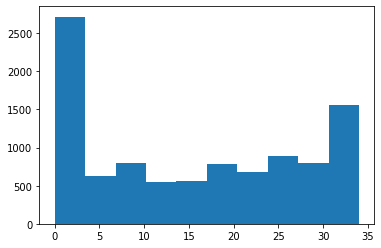

In [11]:
import matplotlib.pyplot as plt

plt.hist(pass_info)

In [14]:
df_preprocess = pickle.load(open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender','rb'))
df_preprocess_pass = pickle.load(open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender_pass','rb'))

print('전처리 성공한 caseid수: {} -> {}'.format(len(np.unique(df_preprocess['caseids'].tolist())), len(np.unique(df_preprocess_pass['caseids'].tolist()))))
print('전처리 성공한 opid수: {} -> {}'.format(len(np.unique(df_preprocess['opid'].tolist())), len(np.unique(df_preprocess_pass['opid'].tolist()))))          


caseids = np.unique(pickle.load(open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender_pass','rb'))['caseids'])
caseids_prev = np.concatenate([pickle.load(open('../DL_model/caseid_train_new','rb')), pickle.load(open('../DL_model/caseid_val_new','rb')), pickle.load(open('../DL_model/caseid_test_new','rb'))])

len(caseids_prev), len((caseids)), len(set(caseids_prev) - set(caseids)), len(set(caseids) - set(caseids_prev))

전처리 성공한 caseid수: 5323 -> 4795
전처리 성공한 opid수: 5170 -> 4714


(3942, 4795, 28, 881)

In [23]:
caseids = np.unique(pickle.load(open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender_pass','rb'))['caseids'])
caseids_prev = np.concatenate([pickle.load(open('../DL_model/caseid_train_new','rb')), pickle.load(open('../DL_model/caseid_val_new','rb')), pickle.load(open('../DL_model/caseid_test_new','rb'))])

list(set(caseids_prev) - set(caseids))

['PACU1_4_200319_193541.csv',
 'PACU1_6_200131_165108.csv',
 'PACU1_5_190830_111107.csv',
 'PACU1_1_200601_131308.csv',
 'PACU1_1_200511_190645.csv',
 'PACU1_7_190709_180928.csv',
 'PACU1_9_200603_101036.csv',
 'PACU1_6_200207_102203.csv',
 'PACU1_7_200312_115154.csv',
 'PACU1_3_200316_090636.csv',
 'PACU1_1_200717_094040.csv',
 'PACU1_3_200718_022020.csv',
 'PACU1_8_200325_095202.csv',
 'PACU1_6_190503_100242.csv',
 'PACU1_3_200221_172941.csv',
 'PACU1_9_200221_122214.csv',
 'PACU1_6_200616_143649.csv',
 'PACU1_8_190517_130825.csv',
 'PACU1_8_190904_162533.csv',
 'PACU1_6_200225_140000.csv',
 'PACU1_4_200627_013103.csv',
 'PACU1_4_190828_165937.csv',
 'PACU1_9_190719_142338.csv',
 'PACU1_9_200708_130730.csv',
 'PACU1_1_200525_135901.csv',
 'PACU1_3_200129_152442.csv',
 'PACU1_1_200803_213721.csv',
 'PACU1_2_200131_164827.csv']

## opid 단위로 train, test set 나누기

In [50]:
from sklearn.utils import shuffle


#ids = np.arange(x_train.shape[0])
#np.random.shuffle(ids)
df_preprocess_pass = pickle.load(open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender_pass','rb'))
opids = np.unique(df_preprocess_pass['opid'].tolist())


opid_test = shuffle(opids, n_samples = int(len(opids) * 0.1))
opid_train = np.setdiff1d(opids, opid_test)

opid_val = shuffle(opid_train, n_samples = int(len(opid_train) * 0.1))
opid_train = np.setdiff1d(opid_train, opid_val)


print('전체 opid 수: {}'.format(len(opids)))
print('train opid 수: {}, val opid 수: {}, test opid 수: {}'.format(len(opid_train), len(opid_val), len(opid_test)))


pickle.dump(opid_train, open('../DL_model/opid_train','wb'))
pickle.dump(opid_val, open('../DL_model/opid_val','wb'))
pickle.dump(opid_test, open('../DL_model/opid_test','wb'))

전체 opid 수: 4714
train opid 수: 3819, val opid 수: 424, test opid 수: 471


## 한 환자에서 시간에 따른 NRS

In [61]:
from collections import Counter


NRS_list = np.array(df_preprocess['NRS'].tolist(), np.float32)
dict_nrs = Counter(NRS_list)
dict_nrs

Counter({3.0: 1374,
         8.0: 1005,
         5.0: 2814,
         2.0: 501,
         4.0: 1495,
         6.0: 1426,
         7.0: 1091,
         9.0: 190,
         10.0: 49,
         1.0: 5,
         7.5: 2})

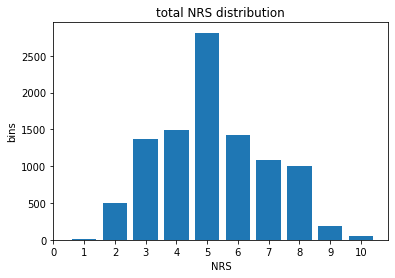

In [63]:
plt.bar(dict_nrs.keys(), dict_nrs.values())
plt.xticks(np.arange(11))
plt.xlabel('NRS')
plt.ylabel('bins')
plt.title('total NRS distribution')
plt.show()

In [102]:
#df_preprocess = pickle.load(open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender','rb'))
opids = np.unique(df_preprocess['opid'].tolist())


opid_nrs = []
for idx, opid in enumerate(opids[:]):
    rows = df_preprocess[df_preprocess['opid']==opid]
    opid_nrs.append(np.array(np.sort(rows[['NRS', 'NRS_time']], axis=0)[:,0], np.float32).tolist())

    
print('opid {}개 -> NRS {}개'.format(len(opid_nrs), len(df_preprocess)))

opid 5170개 -> NRS 9952개


In [142]:
opid_nrs

[[6.0, 6.0],
 [5.0, 7.0],
 [4.0],
 [4.0, 6.0],
 [8.0],
 [5.0, 6.0],
 [2.0, 4.0, 7.0],
 [7.0, 9.0],
 [8.0],
 [3.0, 3.0],
 [5.0, 7.0],
 [5.0, 7.0],
 [5.0, 5.0],
 [5.0, 5.0],
 [10.0, 6.0],
 [5.0, 7.0],
 [5.0, 7.0],
 [5.0, 7.0],
 [3.0],
 [6.0, 8.0],
 [5.0, 6.0],
 [4.0, 7.0],
 [3.0, 4.0, 6.0],
 [6.0, 8.0],
 [5.0],
 [5.0],
 [5.0],
 [3.0, 4.0, 7.0],
 [7.0],
 [2.0],
 [4.0],
 [5.0, 5.0, 7.0],
 [5.0, 5.0],
 [4.0, 5.0],
 [5.0, 6.0, 6.0],
 [2.0, 2.0],
 [4.0, 6.0],
 [2.0],
 [5.0],
 [5.0, 7.0, 7.0],
 [5.0, 6.0],
 [7.0],
 [6.0, 7.0],
 [5.0, 5.0],
 [4.0],
 [9.0],
 [5.0, 5.0],
 [4.0, 4.0],
 [2.0],
 [5.0, 7.0],
 [2.0, 3.0],
 [5.0],
 [6.0, 6.0],
 [6.0],
 [4.0],
 [5.0, 8.0, 8.0],
 [6.0, 7.0],
 [5.0],
 [4.0],
 [3.0],
 [8.0],
 [5.0],
 [5.0, 7.0],
 [5.0, 5.0],
 [5.0, 5.0],
 [8.0],
 [6.0],
 [7.0, 8.0],
 [3.0, 5.0],
 [6.0],
 [4.0, 4.0],
 [9.0],
 [4.0, 6.0],
 [5.0, 7.0],
 [4.0, 4.0],
 [5.0, 8.0],
 [8.0],
 [3.0, 4.0],
 [5.0],
 [4.0],
 [8.0],
 [5.0, 5.0],
 [4.0],
 [4.0, 5.0],
 [3.0, 5.0, 7.0],
 [4.0, 6.0, 9.0],
 

In [130]:
list_nrs = [[], [], [], [],[],[],[]]
for report in opid_nrs:
    list_nrs[len(report)-1].append(report)
    
list_nrs = np.array(list_nrs)

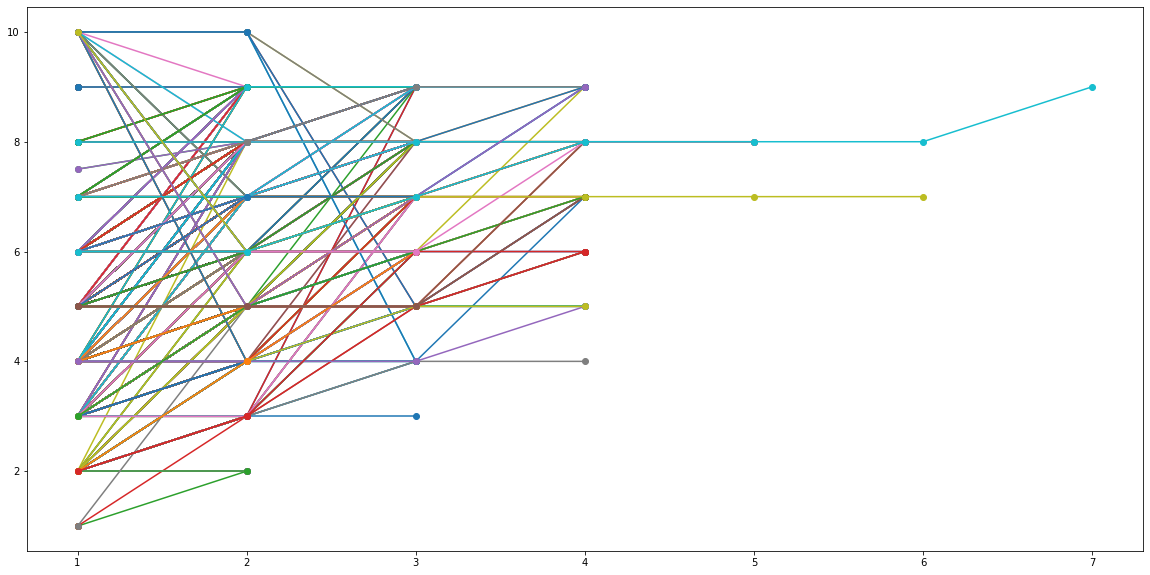

In [135]:
plt.figure(figsize=(20,10))
#np.sum([len(list_nrs(i)) for i in range(len(list_nrs))])

for i in range(len(list_nrs)):
    for j in range(len(list_nrs[i])):
        plt.plot(np.arange(i+1)+1, list_nrs[i][j], marker='o')


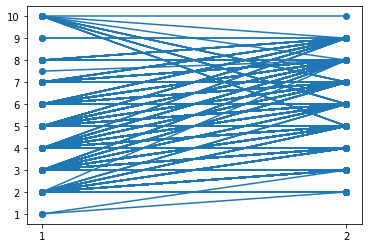

In [143]:
i = 1
plt.yticks(np.arange(11))
plt.xticks(np.arange(2)+1)
for j in range(len(list_nrs[i])):
    for k in range(len(list_nrs[i][j])):
        label = math.pow(10,k)*list_nrs[i][j][k]    
    
    plt.plot(np.arange(i+1)+1, list_nrs[i][j], color='C0', marker='o')

In [168]:
import math


def count_bins(list1):
    counter = {}
    for ele in list1:
        label = 0
        for i in range(len(ele)):
            label += math.pow(11,i)*ele[i]
        
        if label not in counter:
            counter[label] = 0
        counter[label] += 1
        
    return counter

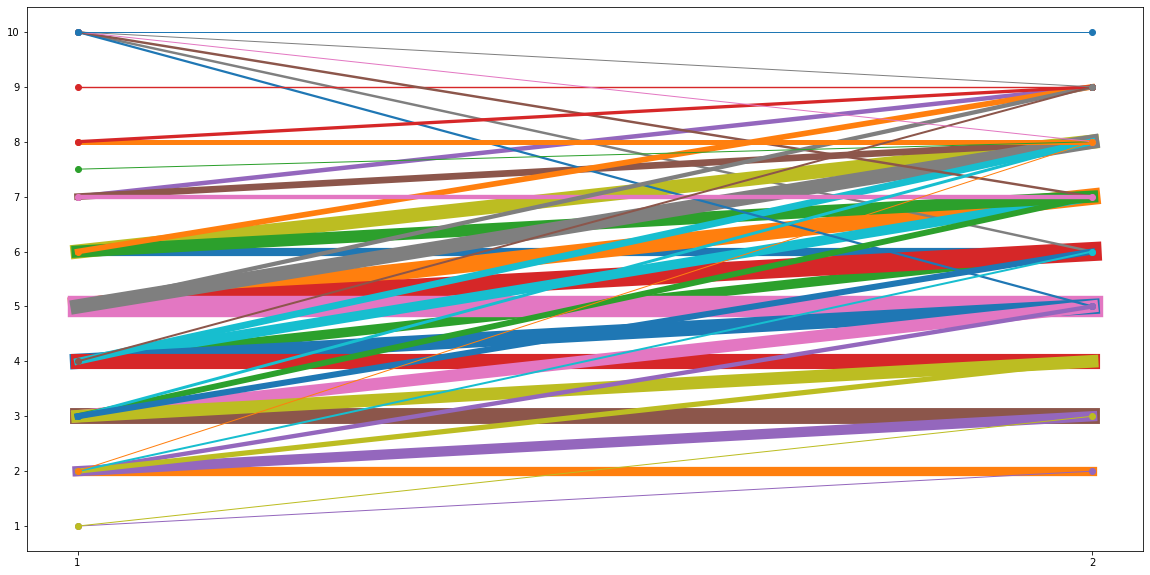

In [171]:
plt.figure(figsize=(20,10))
plt.yticks(np.arange(11))
plt.xticks(np.arange(2)+1)


lenn = 2
hist_nrs = count_bins(list_nrs[lenn-1])

for key, value in hist_nrs.items():
    #print(key, value)
    
    n_list = []
    while key//11 != 0:
        n_list.append(key%11)
        key = key//11
    n_list.append(key)
        
    plt.plot(np.arange(lenn)+1, n_list, linewidth = np.sqrt(value), marker='o')

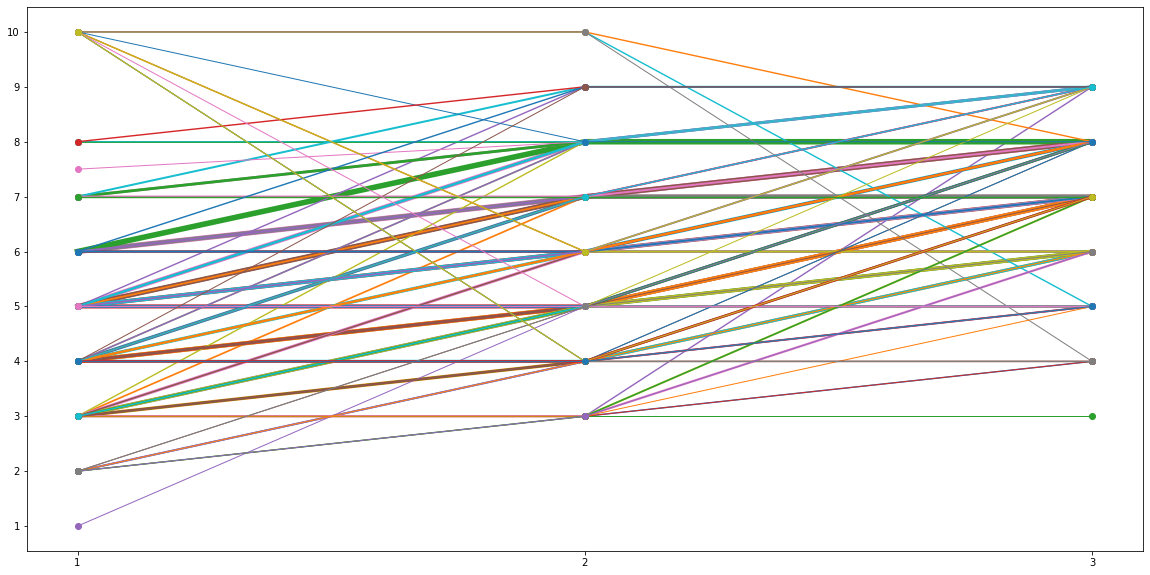

In [182]:
lenn = 3
hist_nrs = count_bins(list_nrs[lenn-1])

plt.figure(figsize=(20,10))
plt.yticks(np.arange(11))
plt.xticks(np.arange(lenn)+1)


for key, value in hist_nrs.items():
    #print(key, value, end=' ')
    
     
    n_list = []
    while key//11 != 0:
        n_list.append(key%11)
        key = key//11
    n_list.append(key)
     
    
    plt.plot(np.arange(lenn)+1, n_list, linewidth = np.sqrt(value), marker='o')

In [ ]:
list_nrs_all = np.full(np.nan, (4))
list_nrs

In [ ]:
plt.figure(figsize=(20,10))
plt.yticks(np.arange(11))
plt.xticks(np.arange(2)+1)


lenn = 2
list_nrs_all = 
hist_nrs = count_bins(list_nrs[lenn-1])

for key, value in hist_nrs.items():
    #print(key, value)
    
    n_list = []
    while key//11 != 0:
        n_list.append(key%11)
        key = key//11
    n_list.append(key)
        
    plt.plot(np.arange(lenn)+1, n_list, linewidth = np.sqrt(value), marker='o')

In [146]:
count_bins[list_nrs[1]]

TypeError: 'function' object is not subscriptable

In [117]:
#841 2898 3225 3234 4815
rows = df_preprocess[df_preprocess['opid']==opids[2898]]
rows

caseids  NRS                             file_path  \
915   PACU1_3_200319_184726.csv  6.0  6.0,9557,PACU1_3_200319_184726.vital   
1599  PACU1_3_200319_184726.csv  8.0  8.0,9556,PACU1_3_200319_184726.vital   
7009  PACU1_3_200319_184726.csv  6.0  6.0,9558,PACU1_3_200319_184726.vital   
7754  PACU1_3_200319_184726.csv  8.0  8.0,9553,PACU1_3_200319_184726.vital   
7765  PACU1_3_200319_184726.csv  7.0  7.0,9554,PACU1_3_200319_184726.vital   
8235  PACU1_3_200319_184726.csv  8.0  8.0,9555,PACU1_3_200319_184726.vital   
8295  PACU1_3_200319_184726.csv  9.0  9.0,4676,PACU1_3_200319_184726.vital   

                                                      1  \
915                 (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
1599  (False, [0.0, 0.0, 0.0], [0.1111111111111111, ...   
7009                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
7754  (False, [0.0, 0.0, 0.0], [0.10526315789473684,...   
7765               (False, [0.0, 0.0, 0.0], [0.1, 0.0])   
8235  (False, [0.0, 0.0, 0.0], [0.4444444444444444, ...   
8295                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                      2  \
915                 (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
1599  (False, [0.0, 0.0, 0.0], [0.1111111111111111, ...   
7009                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
7754  (True, [0.0, 0.0, 0.0], [0.05555555555555555, ...   
7765                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
8235  (False, [0.0, 0.0, 0.0], [0.5882352941176471, ...   
8295                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                      3  \
915                 (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
1599  (True, [0.0, 0.0, 0.0], [0.05263157894736842, ...   
7009                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
7754  (False, [0.0, 0.0, 0.0], [0.21052631578947367,...   
7765  (False, [0.0, 0.0, 0.0], [0.1111111111111111, ...   
8235  (False, [0.0, 0.0, 0.0], [0.5, 0.0526315789473...   
8295                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                      4  \
915                 (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
1599  (False, [0.0, 0.0, 0.0], [0.10526315789473684,...   
7009                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
7754  (False, [0.0, 0.0, 0.0], [0.15789473684210525,...   
7765  (False, [0.0, 0.0, 0.0], [0.3333333333333333, ...   
8235  (False, [0.0, 0.0, 0.0], [0.3888888888888889, ...   
8295                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                      5  \
915                 (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
1599  (False, [0.0, 0.0, 0.0], [0.2777777777777778, ...   
7009                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
7754  (False, [0.0, 0.0, 0.0], [0.21052631578947367,...   
7765  (False, [0.0, 0.0, 0.0], [0.2777777777777778, ...   
8235  (False, [0.0, 0.0, 0.0], [0.2631578947368421, ...   
8295                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                      6  \
915                 (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
1599  (False, [0.0, 0.0, 0.0], [0.3157894736842105, ...   
7009                (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
7754  (False, [0.0, 0.0, 0.0], [0.2222222222222222, ...   
7765  (False, [0.0, 0.0, 0.0], [0.3333333333333333, ...   
8235  (False, [0.0, 0.0, 0.0], [0.2631578947368421, ...   
8295                 (False, [1.0, 1.0, 1.0], [-1, -1])   

                                                      7  ...  \
915                 (True, [0.0, 0.0, 0.0], [0.0, 0.0])  ...   
1599              (False, [0.0, 0.0, 0.0], [0.25, 0.0])  ...   
7009                (True, [0.0, 0.0, 0.0], [0.0, 0.0])  ...   
7754  (True, [0.0, 0.0, 0.0], [0.05263157894736842, ...  ...   
7765  (False, [0.0, 0.0, 0.0], [0.15789473684210525,...  ...   
8235  (False, [0.0, 0.0, 0.0], [0.21052631578947367,...  ...   
8295                 (False, [1.0, 1.0, 1.0], [-1, -1])  ...   

                                                

In [114]:
np.sort(rows[['NRS', 'NRS_time']], axis=0)

array([['6.0', '2020-05-15 12:30:00'],
       ['6.0', '2020-05-15 12:40:00'],
       ['6.0', '2020-05-15 12:50:00'],
       ['8.0', '2020-05-15 13:00:00'],
       ['8.0', '2020-05-15 13:10:00']], dtype=object)

# 각각에 대해 input이 있는 caseid 비교

In [50]:
set_1_1 = set(caseids_1_1)
set_3_1 = set(caseids_3_1)
set_3_2 = set(caseids_3_2)

print('size of caseid_1_1:', len(set_1_1))
print('size of caseid_3_1:', len(set_3_1))
print('size of caseid_3_2:', len(set_3_2))

print('caseid_3_1 in caseid_1_1:', set_3_1.issubset(set_1_1))
print('caseid_3_2 in caseid_1_1:', set_3_2.issubset(set_1_1))

size of caseid_1_1: 4851
size of caseid_3_1: 4727
size of caseid_3_2: 4519
caseid_3_1 in caseid_1_1: False
caseid_3_2 in caseid_1_1: True


In [51]:
print(len(set_3_1), len(set_1_1.intersection(set_3_1)))

4727 4726


# caseid_train 뽑기

In [22]:
import pandas as pd
import pickle, os

# 
df_preprocess = pickle.load(open('cache/preprocess1/input1/df_preprocess_pacu_final','rb'))


# 회복실 입퇴실시간이 긴 경우, SUPREME의 오류로 NRS 측정시간이 다른 환자 케이스를 덮어버린 경우 (중복 케이스)
df_duplicate_list = pd.read_csv('duplicates_list.csv')

print('매칭 중복 제거 전 df행 크기:', len(df_preprocess))
print('매칭 중복 제거 전 caseid수:', len(np.unique(df_preprocess['caseids'].tolist())))

duplicate_list = np.array(df_duplicate_list['path'].str.split('.').tolist())[:,0]

for duplicate_file in duplicate_list:
    duplicate_file = duplicate_file + '.csv'
    index_list = df_preprocess[duplicate_file == df_preprocess['caseids']].index
    df_preprocess.drop(index_list, inplace=True)
    
df_preprocess.reset_index(drop=True, inplace=True)
    
print('\n매칭 중복 제거 후 df행 크기:', len(df_preprocess))
print('매칭 중복 제거 후 caseid수:', len(np.unique(df_preprocess['caseids'].tolist())))    

매칭 중복 제거 전 df행 크기: 7939
매칭 중복 제거 전 caseid수: 5010

매칭 중복 제거 후 df행 크기: 7939
매칭 중복 제거 후 caseid수: 5010


In [25]:
filepath_test = pickle.load(open('filepath_test', 'rb'))
caseid_test = np.unique(np.array(pd.Series(filepath_test).str.split(',').tolist())[:,2])
caseid_train = np.setdiff1d(np.unique(df_preprocess['caseids'].tolist()), caseid_test)
print('caseid_test: {},  caseid_train: {},  total: {}'.format(len(caseid_test), len(caseid_train), len(np.unique(df_preprocess['caseids']))))

caseid_test: 501,  caseid_train: 4509,  total: 5010


In [26]:
pickle.dump(caseid_test, open('caseid_test','wb'))
pickle.dump(caseid_train, open('caseid_train','wb'))

In [29]:
from sklearn.utils import shuffle

caseid_test = pickle.load(open('caseid_test', 'rb'))
caseid_train = pickle.load(open('caseid_train', 'rb'))

caseid_val = shuffle(caseid_train, n_samples = int(len(caseid_train) * 0.1))
pickle.dump(caseid_val, open('caseid_val','wb'))
print('caseid_val: {}'.format(len(caseid_val)))

caseid_val: 450
